#Quality Education
####by Bhavika B. Chavda, Hilary R. Olesen, Sharon A. Anaba, Akshay Ladha
DATA 601

Order of Counties Studied:
1.   Los Angeles
2.   San Francisco
3.   Lake
4.   Santa Clara



#Los Angeles

In [ ]:
!pip install geopandas

In [ ]:
#import required libraries
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

from shapely.geometry import Point 
from geopandas.tools import geocode 
from geopandas.tools import reverse_geocode 

%matplotlib inline

In [ ]:
#the link to the dataset used for the analysis
URL = "http://dq.cde.ca.gov/dataquest/dlfile/dlfile.aspx?cLevel=All&cYear=2016-17&cCat=Graduates&cPage=filesgrads"

In [ ]:
#read the cvs file and print the first 5 records
ogdf = pd.read_csv(URL, sep="\t")
ogdf.head()

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,1100170112607,1,M,1,1,1617
1,1100170112607,6,F,13,13,1617
2,1100170112607,6,M,11,11,1617
3,1100170112607,7,F,1,1,1617
4,1100170112607,7,M,4,4,1617


In [ ]:
#read and print the last 5 records
ogdf.tail()

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
21602,58727695838305,0,F,2,1,1617
21603,58727695838305,0,M,1,1,1617
21604,58727695838305,5,F,20,15,1617
21605,58727695838305,5,M,29,17,1617
21606,58727695838305,7,M,38,14,1617


In [ ]:
#Print records from one school
ogdf.loc[ogdf['CDS_CODE'] == 19645191937481]

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
4825,19645191937481,5,F,72,28,1617
4826,19645191937481,2,M,99,69,1617
4827,19645191937481,5,M,75,24,1617
4828,19645191937481,4,F,1,0,1617
4829,19645191937481,4,M,2,0,1617
4830,19645191937481,7,M,3,1,1617
4831,19645191937481,6,M,3,1,1617
4832,19645191937481,9,F,2,0,1617
4833,19645191937481,9,M,1,1,1617
4834,19645191937481,7,F,5,1,1617


In [ ]:
#Make a dataframe with only Los Angeles County schools (L.A.'s county code is 19; the first two digits of the CDS Code)
df=ogdf.loc[ogdf['CDS_CODE'] >= 19000000000000]
df=df.loc[df['CDS_CODE'] < 20000000000000]

In [ ]:
print(df)

            CDS_CODE  ETHNIC GENDER  GRADS  UC_GRADS  YEAR
3895  19101990109942       7      F      1         1  1617
3896  19101990109942       4      M      1         1  1617
3897  19101990109942       5      F     26        26  1617
3898  19101990109942       5      M     24        24  1617
3899  19101990112128       5      F     50        50  1617
...              ...     ...    ...    ...       ...   ...
8246  19768850132928       5      F     13        10  1617
8247  19768850132928       5      M     11         9  1617
8248  19769680109926       5      F     33        27  1617
8249  19769680109926       5      M     34        21  1617
8250  19769680109926       0      F      1         0  1617

[4356 rows x 6 columns]


In [ ]:
#print the last 30 records
df.tail(30)

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
8221,19768690119016,5,F,33,33,1617
8222,19768690119016,5,M,25,24,1617
8223,19768690119016,7,M,9,8,1617
8224,19768690119016,0,F,3,2,1617
8225,19768690119016,6,M,4,3,1617
8226,19768690119016,7,F,10,10,1617
8227,19768690119636,2,M,1,1,1617
8228,19768690119636,4,F,1,1,1617
8229,19768690119636,5,F,31,31,1617
8230,19768690119636,6,M,7,6,1617


In [ ]:
#make a list of schools and lists of the percentage of students who graduated UC-eligible
sch=df['CDS_CODE'][3895]
code=[]
rate=[]
rate1=[]
grad=0
ucgrad=0
for i in range(3895,8251):
  if df['CDS_CODE'][i]==sch:
    grad+=df['GRADS'][i]
    ucgrad+=df['UC_GRADS'][i]
  else:
    code.append(sch)
    if grad==0:
      rate.append(0)
      rate1.append(0)
    else:
      rate.append(100*ucgrad/grad)
      rate1.append(100*ucgrad/grad)
    sch=df['CDS_CODE'][i]
    grad=df['GRADS'][i]
    ucgrad=df['UC_GRADS'][i]
  if i==8250:
    code.append(sch)
    rate.append(100*ucgrad/grad)
    rate1.append(100*ucgrad/grad)

In [ ]:
#cds codes for each high school in Los Angeles
print(code)

[19101990109942, 19101990112128, 19101990121822, 19101990121871, 19101990121897, 19101990121905, 19101990121921, 19101990121939, 19101990121970, 19101990121988, 19101990121996, 19101990122010, 19101990122028, 19101990122036, 19101990122044, 19101990122051, 19101990122077, 19101990123604, 19101990123612, 19101990127274, 19101990127522, 19101991933399, 19101991995232, 19101991995869, 19101991996008, 19101991996172, 19101991996214, 19642120000000, 19642120000001, 19642121930056, 19642121930361, 19642121931641, 19642121931880, 19642121933159, 19642121995596, 19642460100081, 19642460108407, 19642460111872, 19642460115337, 19642460126003, 19642461930213, 19642461931732, 19642461936624, 19642461937051, 19642461995398, 19642461995406, 19642461995844, 19642461995968, 19642461996537, 19642461996644, 19642610000001, 19642611930288, 19642611995299, 19642791930528, 19642791931765, 19642791933449, 19642870000001, 19642870114397, 19642871930601, 19642871936384, 19642871938166, 19642871996479, 1964295

In [ ]:
#percent of UC-eligible graduates
print(rate)

[100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 64.58333333333333, 0.0, 37.878787878787875, 1.1904761904761905, 0.0, 0.0, 16.666666666666668, 0.0, 71.08910891089108, 51.64473684210526, 0.8771929824561403, 99.37888198757764, 49.46695095948827, 0.0, 41.515151515151516, 40.368852459016395, 91.01123595505618, 11.11111111111111, 70.0, 38.69346733668342, 87.2, 27.671755725190838, 41.1144578313253, 30.134932533733135, 29.51388888888889, 28.571428571428573, 0.0, 0.28328611898017, 1.0, 0.0, 67.14285714285714, 0.0, 44.28044280442804, 0.0, 35.14644351464435, 0.0, 18.28358208955224, 33.7962962962963, 0.0, 43.333333333333336, 44.05594405594405, 40.0, 4.166666666666667, 32.773109243697476, 51.06837606837607, 0.0, 0.0, 64.52513966480447, 0.0, 0.0, 66.4543524416136, 0.0, 51.05740181268882, 0.0, 0.0, 51.014040561622465, 53.21739130434783, 0.0, 0.0, 10.714285714285714, 0.0, 0.0, 0.0, 98.75, 100.0, 0.0, 27.671232876712327, 46.05263157894737, 4

In [ ]:
#UC-eligible grad percentage for example school
rate[code.index(19645191937481)]

56.232686980609415

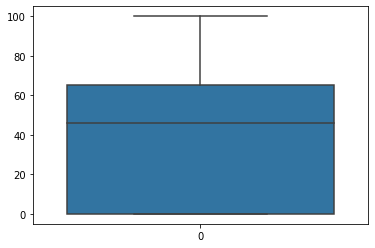

In [ ]:
#boxplot of the UC-eligible gradute rate
sns.boxplot(data=rate)

In [ ]:
#statistics

print("Mean: "+str(statistics.mean(rate)))
print("Median: "+str(statistics.median(rate)))
print("Mode: "+str(statistics.mode(rate)))
print("Min: "+str(min(rate)))
print("Max: "+str(max(rate)))

Mean: 41.63184343195862
Median: 45.8737363317516
Mode: 0.0
Min: 0.0
Max: 100.0


In [ ]:
binrate1=[]
rate1.sort()
for i in rate1:
  if i<=20:
    binrate1.append("0-20%")
  elif i<=40:
    binrate1.append("21-40%")
  elif i<=60:
    binrate1.append("41-60%")
  elif i<=80:
    binrate1.append("61-80%")
  else:
    binrate1.append("81-100%")
print(binrate1)

['0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', 

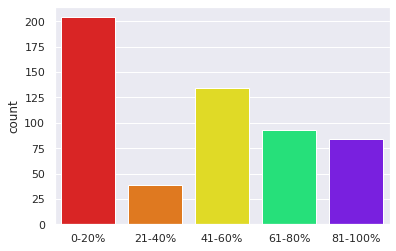

In [ ]:
#number of schools that fall into each percent range of UC-eligible graduates
import seaborn as sns

sns.set_theme(style="darkgrid")

gradecolor=['#F70707','#FF7700','#FFF707','#07FF77','#7700FF']

ax = sns.countplot(x=binrate1, palette=gradecolor)

In [ ]:
binrate=[]
for i in rate:
  if i<=20:
    binrate.append("0-20%")
  elif i<=40:
    binrate.append("21-40%")
  elif i<=60:
    binrate.append("41-60%")
  elif i<=80:
    binrate.append("61-80%")
  else:
    binrate.append("81-100%")
print(binrate)

['81-100%', '81-100%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '61-80%', '0-20%', '21-40%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '61-80%', '41-60%', '0-20%', '81-100%', '41-60%', '0-20%', '41-60%', '41-60%', '81-100%', '0-20%', '61-80%', '21-40%', '81-100%', '21-40%', '41-60%', '21-40%', '21-40%', '21-40%', '0-20%', '0-20%', '0-20%', '0-20%', '61-80%', '0-20%', '41-60%', '0-20%', '21-40%', '0-20%', '0-20%', '21-40%', '0-20%', '41-60%', '41-60%', '21-40%', '0-20%', '21-40%', '41-60%', '0-20%', '0-20%', '61-80%', '0-20%', '0-20%', '61-80%', '0-20%', '41-60%', '0-20%', '0-20%', '41-60%', '41-60%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '81-100%', '81-100%', '0-20%', '21-40%', '41-60%', '41-60%', '0-20%', '0-20%', '41-60%', '0-20%', '0-20%', '61-80%', '0-20%', '61-80%', '61-80%', '61-80%', '0-20%', '0-20%', '61-80%', '0-20%', '0-20%', '0-

In [ ]:
#load data from California school directory
URLm="https://www.cde.ca.gov/schooldirectory/report?rid=dl1&tp=txt"
dfm = pd.read_csv(URLm, sep="\t")
dfm.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate
0,1100170000000,0691051,No Data,Active,Alameda,Alameda County Office of Education,No Data,313 West Winton Avenue,313 West Winton Ave.,Hayward,94544-1136,CA,313 West Winton Avenue,313 West Winton Ave.,Hayward,94544-1136,CA,(510) 887-0152,No Data,No Data,No Data,www.acoe.org,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,37.658212,-122.09713,L Karen,Monroe,lkmonroe@acoe.org,08/15/2020
1,1100170109835,0691051,10546,Closed,Alameda,Alameda County Office of Education,FAME Public Charter,"39899 Balentine Drive, Suite 335","39899 Balentine Dr., Ste. 335",Newark,94560-5359,CA,"39899 Balentine Drive, Suite 335","39899 Balentine Dr., Ste. 335",Newark,94560-5359,CA,No Data,No Data,No Data,malik@famecharter.org,No Data,08/29/2005,07/31/2015,Y,0728,Directly funded,0,County Office of Education (COE),65,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,K-12,K-12,P,N,N,No Data,37.521436,-121.99391,No Data,No Data,No Data,09/01/2015
2,1100170112607,0691051,10947,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,1515 Webster St.,Oakland,94612-3355,CA,1515 Webster Street,1515 Webster St.,Oakland,94612,CA,(510) 596-8901,No Data,(510) 596-8905,info@envisionacademy.org,www.envisionacademy.org/,08/28/2006,No Data,Y,0811,Directly funded,0,County Office of Education (COE),66,High Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,6-12,6-12,N,N,N,0601614,37.804520,-122.26815,Manuschka,Michaud,mmichaud@envisionacademy.org,08/13/2020
3,1100170118489,0691051,12283,Closed,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,2125 Jefferson Avenue,2125 Jefferson Ave.,Berkeley,94703-1414,CA,"1001 22nd Avenue, Suite 100","1001 22nd Ave., Ste. 100",Oakland,94606,CA,No Data,No Data,No Data,data-contact@aspirepublicschools.org,Information Not Available,08/21/2008,06/30/2015,Y,1049,Directly funded,0,County Office of Education (COE),66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,N,N,N,No Data,37.868991,-122.27844,No Data,No Data,No Data,07/01/2015
4,1100170123968,0691051,12844,Active,Alameda,Alameda County Office of Education,Community School for Creative Education,2111 International Boulevard,2111 International Blvd.,Oakland,94606-4903,CA,2111 International Boulevard,2111 International Blvd.,Oakland,94606-4903,CA,(510) 686-4131,No Data,No Data,info@communityschoolforcreativeeducation.org,www.communityschoolforcreativeeducation.org,08/22/2011,No Data,Y,1284,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-8,K-8,N,N,N,0601691,37.784648,-122.23863,Ida,Oberman,ida@communityschoolforcreativeeducation.org,10/08/2020


In [ ]:
#Make sure to only include schools that are active and have geographic coordinates
dfma=dfm[dfm.StatusType == 'Active']
dfma19=dfma[dfma.County=='Los Angeles']
dfma19 = dfma19.loc[(dfma19['Latitude'].notnull()) & dfma19['Longitude'].notnull()]

dfma19.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate
3580,19101990000000,0691078,No Data,Active,Los Angeles,Los Angeles County Office of Education,No Data,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242-2890,CA,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242-2890,CA,(562) 922-6111,No Data,(562) 922-6768,No Data,www.lacoe.edu,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,33.916978,-118.12860,Debra,Duardo,duardo_debra@lacoe.edu,04/02/2019
3581,19101990100776,0691078,11339,Active,Los Angeles,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,91352,CA,"8309 Laurel Canyon Boulevard, #295","8309 Laurel Canyon Blvd., #295",Sun Valley,91352,CA,(818) 368-1557,No Data,(818) 368-1935,info@novamil.org,http://novamil.org,09/02/2003,No Data,Y,0540,Directly funded,0,County Office of Education (COE),65,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,6-12,6-12,C,N,N,0601564,34.234622,-118.39656,Mark,Ryan,mryan@novamil.org,08/13/2020
3583,19101990106880,0691078,10853,Active,Los Angeles,Los Angeles County Office of Education,Jardin de la Infancia,307 East Seventh Street,307 East Seventh St.,Los Angeles,90014-2209,CA,307 East Seventh Street,307 East Seventh St.,Los Angeles,90014-2209,CA,(213) 614-1745,No Data,(213) 614-2046,No Data,No Data,09/01/2004,No Data,Y,0663,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-1,K-1,N,N,N,0602019,34.042460,-118.24912,Zuzy,Chavez,jardindelainfancia@me.com,08/13/2020


In [ ]:
#Make sure the longitude and latitude are float types
dfma19=dfma19.loc[dfma19['Longitude']!="No Data"]
dfma19["Longitude"] = pd.to_numeric(dfma19["Longitude"], downcast="float")
dfma19["Latitude"] = pd.to_numeric(dfma19["Latitude"], downcast="float")

In [ ]:
#Create a new column combining longitude and latitude to make it geo-conversion friendly
dfma19['coordinates'] = list(dfma19[['Longitude', 'Latitude']].values)
dfma19.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates
3580,19101990000000,0691078,No Data,Active,Los Angeles,Los Angeles County Office of Education,No Data,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242-2890,CA,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242-2890,CA,(562) 922-6111,No Data,(562) 922-6768,No Data,www.lacoe.edu,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,33.916977,-118.128601,Debra,Duardo,duardo_debra@lacoe.edu,04/02/2019,"[-118.1286, 33.916977]"
3581,19101990100776,0691078,11339,Active,Los Angeles,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,91352,CA,"8309 Laurel Canyon Boulevard, #295","8309 Laurel Canyon Blvd., #295",Sun Valley,91352,CA,(818) 368-1557,No Data,(818) 368-1935,info@novamil.org,http://novamil.org,09/02/2003,No Data,Y,0540,Directly funded,0,County Office of Education (COE),65,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,6-12,6-12,C,N,N,0601564,34.234623,-118.396561,Mark,Ryan,mryan@novamil.org,08/13/2020,"[-118.39656, 34.234623]"
3583,19101990106880,0691078,10853,Active,Los Angeles,Los Angeles County Office of Education,Jardin de la Infancia,307 East Seventh Street,307 East Seventh St.,Los Angeles,90014-2209,CA,307 East Seventh Street,307 East Seventh St.,Los Angeles,90014-2209,CA,(213) 614-1745,No Data,(213) 614-2046,No Data,No Data,09/01/2004,No Data,Y,0663,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-1,K-1,N,N,N,0602019,34.042461,-118.249123,Zuzy,Chavez,jardindelainfancia@me.com,08/13/2020,"[-118.24912, 34.04246]"


In [ ]:
#Making coordinates into geo-readable points
dfma19['coordinates'] = dfma19['coordinates'].apply(Point)

In [ ]:
dfma19.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates
3580,19101990000000,0691078,No Data,Active,Los Angeles,Los Angeles County Office of Education,No Data,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242-2890,CA,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242-2890,CA,(562) 922-6111,No Data,(562) 922-6768,No Data,www.lacoe.edu,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,33.916977,-118.128601,Debra,Duardo,duardo_debra@lacoe.edu,04/02/2019,POINT (-118.1286010742188 33.91697692871094)
3581,19101990100776,0691078,11339,Active,Los Angeles,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,91352,CA,"8309 Laurel Canyon Boulevard, #295","8309 Laurel Canyon Blvd., #295",Sun Valley,91352,CA,(818) 368-1557,No Data,(818) 368-1935,info@novamil.org,http://novamil.org,09/02/2003,No Data,Y,0540,Directly funded,0,County Office of Education (COE),65,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,6-12,6-12,C,N,N,0601564,34.234623,-118.396561,Mark,Ryan,mryan@novamil.org,08/13/2020,POINT (-118.3965606689453 34.23462295532227)
3583,19101990106880,0691078,10853,Active,Los Angeles,Los Angeles County Office of Education,Jardin de la Infancia,307 East Seventh Street,307 East Seventh St.,Los Angeles,90014-2209,CA,307 East Seventh Street,307 East Seventh St.,Los Angeles,90014-2209,CA,(213) 614-1745,No Data,(213) 614-2046,No Data,No Data,09/01/2004,No Data,Y,0663,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-1,K-1,N,N,N,0602019,34.042461,-118.249123,Zuzy,Chavez,jardindelainfancia@me.com,08/13/2020,POINT (-118.2491226196289 34.04246139526367)


In [ ]:
#Form a list that lines up the percentage of UC-eligible graduates with the correct CDS Code in the dataframe
pointer=[]
nonbin=[]
for k in dfma19['CDSCode']:
  if k in code:
    i=code.index(k)
    pointer.append(binrate[i])
    nonbin.append(rate[i])
  else:
    pointer.append(None)
    nonbin.append(None)
print(pointer)
print(nonbin)

[None, None, None, None, '81-100%', None, None, None, '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', None, None, None, None, None, None, None, None, None, None, None, None, None, None, '61-80%', '21-40%', '0-20%', None, None, '0-20%', '61-80%', None, '41-60%', '0-20%', '81-100%', '41-60%', '0-20%', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, '41-60%', '41-60%', '81-100%', '61-80%', None, '21-40%', '81-100%', '21-40%', '41-60%', '21-40%', '21-40%', '21-40%', '0-20%', '0-20%', '0-20%', None, '61-80%', '0-20%', None, None, None, None, None, None, None, None, None, None, None, None, '41-60%', '0-20%', '21-40%', None, None, None, None, None, None, None, None, None, None, None, None, None, None, '21-40%', '0-20%', '41-60%', '41-60%', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, '21-40%', '0-20%', None, None, None, None, N

In [ ]:
#Create a new column with the list of lined up UC-eligible graduate percentages
dfma19['binner']=pointer
dfma19['UC-EligiblePercent']=nonbin
dfma19.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates,binner,UC-EligiblePercent
3580,19101990000000,0691078,No Data,Active,Los Angeles,Los Angeles County Office of Education,No Data,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242-2890,CA,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242-2890,CA,(562) 922-6111,No Data,(562) 922-6768,No Data,www.lacoe.edu,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,33.916977,-118.128601,Debra,Duardo,duardo_debra@lacoe.edu,04/02/2019,POINT (-118.1286010742188 33.91697692871094),None,NaN
3581,19101990100776,0691078,11339,Active,Los Angeles,Los Angeles County Office of Education,North Valley Military Institute College Prepar...,12105 Allegheny Street,12105 Allegheny St.,Sun Valley,91352,CA,"8309 Laurel Canyon Boulevard, #295","8309 Laurel Canyon Blvd., #295",Sun Valley,91352,CA,(818) 368-1557,No Data,(818) 368-1935,info@novamil.org,http://novamil.org,09/02/2003,No Data,Y,0540,Directly funded,0,County Office of Education (COE),65,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,6-12,6-12,C,N,N,0601564,34.234623,-118.396561,Mark,Ryan,mryan@novamil.org,08/13/2020,POINT (-118.3965606689453 34.23462295532227),None,NaN
3583,19101990106880,0691078,10853,Active,Los Angeles,Los Angeles County Office of Education,Jardin de la Infancia,307 East Seventh Street,307 East Seventh St.,Los Angeles,90014-2209,CA,307 East Seventh Street,307 East Seventh St.,Los Angeles,90014-2209,CA,(213) 614-1745,No Data,(213) 614-2046,No Data,No Data,09/01/2004,No Data,Y,0663,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-1,K-1,N,N,N,0602019,34.042461,-118.249123,Zuzy,Chavez,jardindelainfancia@me.com,08/13/2020,POINT (-118.2491226196289 34.04246139526367),None,NaN
3584,19101990109660,0691078,10891,Active,Los Angeles,Los Angeles County Office of Education,Aspire Antonio Maria Lugo Academy,6100 Carmelita Avenue,6100 Carmelita Ave.,Huntington Park,90255-4138,CA,"1001 22nd Avenue, Suite 100","1001 22nd Ave., Ste. 100",Oakland,94606,CA,(323) 585-1153,No Data,(323) 585-1283,data-contact@aspirepublicschools.org,www.aspirepublicschools.org,09/06/2005,No Data,Y,0694,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-6,K-5,N,N,N,0601821,33.984203,-118.196587,Lilian,Garcia,data-contact@aspirepublicschools.org,08/13/2020,POINT (-118.1965866088867 33.98420333862305),None,NaN
3586,19101990112128,0691078,11655,Active,Los Angeles,Los Angeles County Office of Education,Aspire Ollin University Preparatory Academy,2540 East 58th Street,2540 East 58th St.,Huntington Park,90255-2659,CA,2540 East 58th Street,2540 East 58th St.,Huntington Park,90255-2659,CA,(323) 277-2901,No Data,(323) 587-3978,data-contact@aspirepublicschools.org,www.aspirepublicschools.org,09/11/2006,No Data,Y,0693,Directly funded,0,County Office of Education (COE),65,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,6-12,6-12,N,N,N,0601857,33.990154,-118.226532,Joel,Ramirez,data-contact@aspirepublicschools.org,08/13/2020,POINT (-118.2265319824219 33.99015426635742),81-100%,100.0


In [ ]:
#Remove rows with null values in the UC-eligible percentage column from dataframe (gets rid of elementary and middle schools)
dfma19 = dfma19[dfma19['binner'].notna()]
dfma19.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates,binner,UC-EligiblePercent
3586,19101990112128,0691078,11655,Active,Los Angeles,Los Angeles County Office of Education,Aspire Ollin University Preparatory Academy,2540 East 58th Street,2540 East 58th St.,Huntington Park,90255-2659,CA,2540 East 58th Street,2540 East 58th St.,Huntington Park,90255-2659,CA,(323) 277-2901,No Data,(323) 587-3978,data-contact@aspirepublicschools.org,www.aspirepublicschools.org,09/11/2006,No Data,Y,0693,Directly funded,0,County Office of Education (COE),65,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,6-12,6-12,N,N,N,0601857,33.990154,-118.226532,Joel,Ramirez,data-contact@aspirepublicschools.org,08/13/2020,POINT (-118.2265319824219 33.99015426635742),81-100%,100.0
3591,19101990121822,0691078,12665,Active,Los Angeles,Los Angeles County Office of Education,"Nidorf, Barry J.",16350 Filbert Street,16350 Filbert St.,Sylmar,91342,CA,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242,CA,(818) 367-5942,No Data,(818) 362-8948,No Data,No Data,07/01/2010,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,ELEMHIGH,Elementary-High Combination,6-12,6-12,N,N,Y,No Data,34.314484,-118.484123,Harry,Obiako,obiako_harry@lacoe.edu,08/13/2020,POINT (-118.4841232299805 34.31448364257812),0-20%,0.0
3593,19101990121897,0691078,12696,Active,Los Angeles,Los Angeles County Office of Education,Central Juvenile Hall,1605 Eastlake Avenue,1605 Eastlake Ave.,Los Angeles,90033,CA,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242,CA,(323) 225-4362,No Data,(323) 225-3274,No Data,No Data,07/01/2010,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,6-12,8-12,N,N,N,No Data,34.063496,-118.205872,Michael,Massa,massa_michael@lacoe.edu,08/13/2020,POINT (-118.2058715820312 34.06349563598633),0-20%,0.0
3594,19101990121905,0691078,12777,Active,Los Angeles,Los Angeles County Office of Education,"Kirby, Dorothy Camp",1500 South McDonnell Avenue,1500 South McDonnell Ave.,City Of Commerce,90040,CA,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242,CA,(323) 263-5106,No Data,(323) 263-0675,No Data,No Data,07/01/2010,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,7-12,9-12,N,N,N,No Data,34.011982,-118.170189,Ruben,Carranza,carranza_ruben@lacoe.edu,08/13/2020,POINT (-118.1701889038086 34.01198196411133),0-20%,0.0
3595,19101990121921,0691078,12710,Active,Los Angeles,Los Angeles County Office of Education,Afflerbaugh-Paige Camp,6621 North Stephens Ranch Road,6621 North Stephens Ranch Rd.,La Verne,91750,CA,9300 Imperial Highway,9300 Imperial Hwy.,Downey,90242,CA,(909) 593-4926,No Data,(909) 596-2974,No Data,No Data,07/01/2010,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,7-12,9-12,N,N,N,No Data,34.152077,-117.742432,John,Cotton,cotton_john@lacoe.edu,08/13/2020,POINT (-117.742431640625 34.15207672119141),0-20%,0.0


In [ ]:
#Taken from https://github.com/johan/world.geo.json/blob/master/countries/USA/CA/Los%20Angeles.geo.json
map_df = gpd.read_file("https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/CA/Los%20Angeles.geo.json")
map_df.head()

,kind,name,state,geometry
0,county,Los Angeles,CA,"MULTIPOLYGON (((-117.66870 34.82040, -117.6468..."


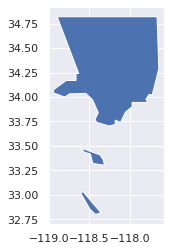

In [ ]:
map_df.plot()

In [ ]:
#Form smaller dataframe with more relevant information
lageo=dfma19[['CDSCode','School', 'coordinates', 'binner','UC-EligiblePercent']]
lageo.head()

,CDSCode,School,coordinates,binner,UC-EligiblePercent
3586,19101990112128,Aspire Ollin University Preparatory Academy,POINT (-118.2265319824219 33.99015426635742),81-100%,100.0
3591,19101990121822,"Nidorf, Barry J.",POINT (-118.4841232299805 34.31448364257812),0-20%,0.0
3593,19101990121897,Central Juvenile Hall,POINT (-118.2058715820312 34.06349563598633),0-20%,0.0
3594,19101990121905,"Kirby, Dorothy Camp",POINT (-118.1701889038086 34.01198196411133),0-20%,0.0
3595,19101990121921,Afflerbaugh-Paige Camp,POINT (-117.742431640625 34.15207672119141),0-20%,0.0


In [ ]:
type(lageo['coordinates'])

pandas.core.series.Series

In [ ]:
#Split dataframe into smaller dataframes according to percentages
lageo20=lageo.loc[lageo['binner'] == '0-20%']
lageo40=lageo.loc[lageo['binner'] == '21-40%']
lageo60=lageo.loc[lageo['binner'] == '41-60%']
lageo80=lageo.loc[lageo['binner'] == '61-80%']
lageo100=lageo.loc[lageo['binner'] == '81-100%']

In [ ]:
#Make mapable
geola20df = gpd.GeoDataFrame(lageo20, geometry='coordinates')
geola40df = gpd.GeoDataFrame(lageo40, geometry='coordinates')
geola60df = gpd.GeoDataFrame(lageo60, geometry='coordinates')
geola80df = gpd.GeoDataFrame(lageo80, geometry='coordinates')
geola100df = gpd.GeoDataFrame(lageo100, geometry='coordinates')

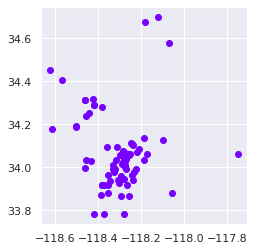

In [ ]:
#Rank 1 schools
geola100df.plot(color='#7700FF')

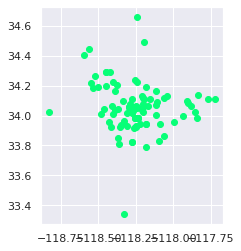

In [ ]:
#Rank 2 schools
geola80df.plot(color='#07FF77')

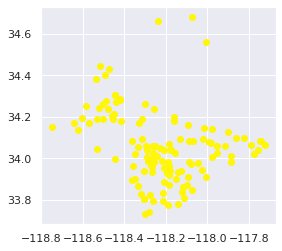

In [ ]:
#Rank 3 schools
geola60df.plot(color='#FFF707')

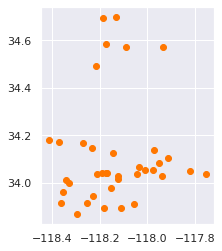

In [ ]:
#Rank 4 schools
geola40df.plot(color='#FF7700')

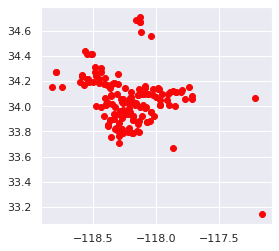

In [ ]:
#Rank 5 schools
geola20df.plot(color='#F70707')

Text(0.5, 1.0, 'Los Angeles Schools by UC-Eligible Grads')

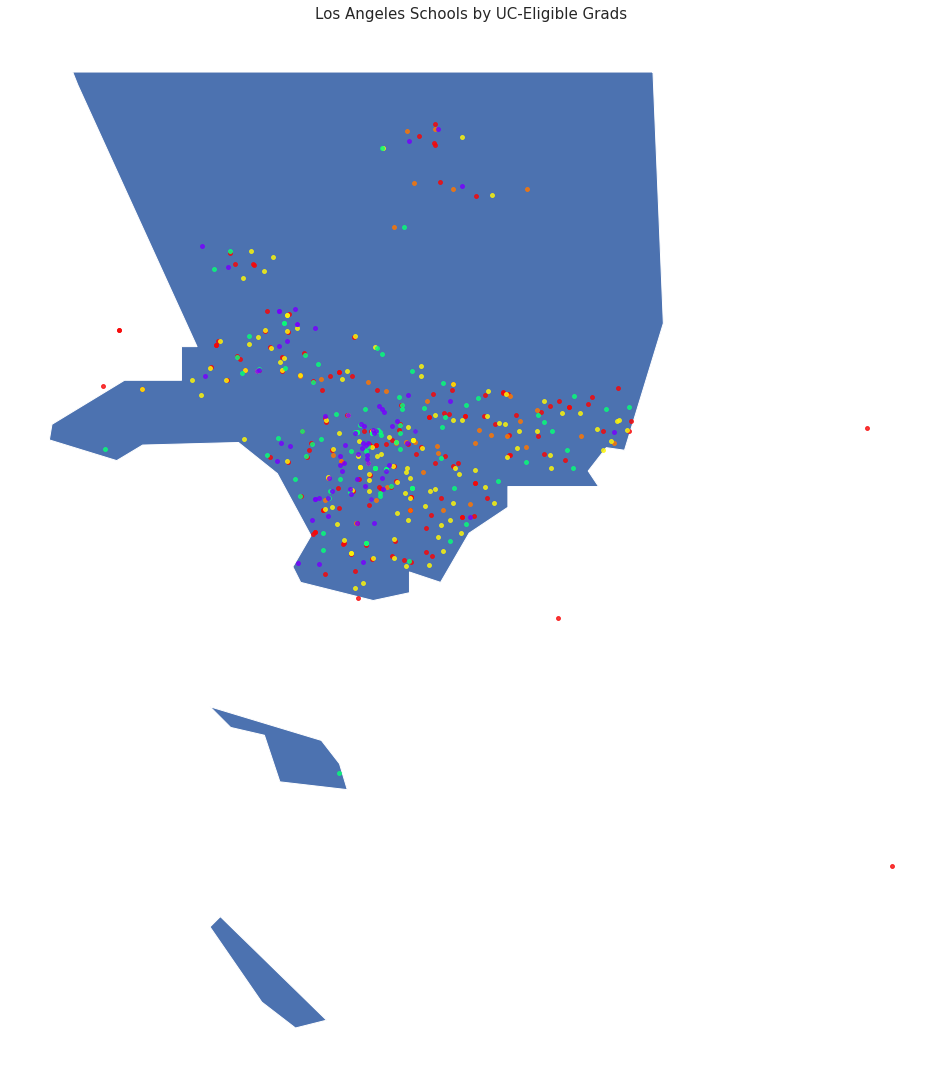

In [ ]:
#Plot schools over map of L.A. County color-coded by percentage of UC-eligible students
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geola20df.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geola40df.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geola60df.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geola80df.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geola100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Los Angeles Schools by UC-Eligible Grads", fontsize=15, fontweight=3)

**MONEY DATA ANALYSIS**

In [ ]:
#from https://www.cde.ca.gov/ds/fd/ec/currentexpense.asp Current Expense per Average Daily Attendance

mURL="https://www.cde.ca.gov/ds/fd/ec/documents/currentexpense1617.xlsx"
moneydf = pd.read_excel(mURL,skiprows=[0,1,2,3,4,5,6,7]) #first few rows contained description of data, not data itself
moneydf.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type
0,1,61119,Alameda Unified,1.048464e+08,9061.77,11570.193309,Unified
1,1,61127,Albany City Unified,4.381278e+07,3601.47,12165.247807,Unified
2,1,61143,Berkeley Unified,1.421931e+08,9171.43,15503.921472,Unified
3,1,61150,Castro Valley Unified,9.131184e+07,9022.97,10119.931991,Unified
4,1,61168,Emery Unified,1.102028e+07,644.25,17105.601024,Unified


In [ ]:
#Make dataframe of only L.A. County school districts
lamoneydf=moneydf.loc[moneydf['CO'] == 19]
lamoneydf.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type
245,19,64212,ABC Unified,2.086270e+08,20041.91,10409.536830,Unified
246,19,64246,Antelope Valley Union High,2.380238e+08,19881.81,11971.935759,High
247,19,64261,Arcadia Unified,9.599930e+07,9315.96,10304.820542,Unified
248,19,64279,Azusa Unified,1.081292e+08,8358.01,12937.189278,Unified
249,19,64287,Baldwin Park Unified,1.554206e+08,13107.37,11857.493834,Unified


In [ ]:
lamoneydf.loc[lamoneydf['CDS'] == 64519]

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type
266,19,64519,El Monte Union High,1.112083e+08,8522.02,13049.521714,High


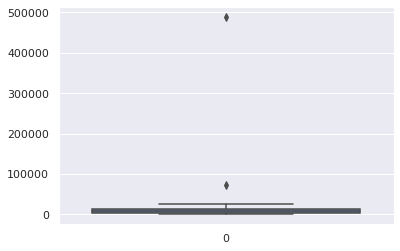

In [ ]:
#Boxplot of Current Expense ADA in LA
temp=[]
for i in lamoneydf['Current Expense ADA']:
  temp.append(i)
sns.boxplot(data=temp)

In [ ]:
#Statistics
print("Mean: "+str(statistics.mean(temp)))
print("Median: "+str(statistics.median(temp)))
#print("Mode: "+str(statistics.mode(temp))) No mode
print("Min: "+str(min(temp)))
print("Max: "+str(max(temp)))

Mean: 15963.519
Median: 8319.6
Min: 84.29
Max: 489198.82


In [ ]:
#Identify outliers
temp.sort()
print(temp[-1])
print(temp[-2])

489198.82
72563.98


Scaling (Min-Max)

In [ ]:
minmoney=min(lamoneydf['Current Expense ADA'])
maxmoney=max(lamoneydf['Current Expense ADA'])

In [ ]:
minmaxmoney=[]
for value in lamoneydf['Current Expense ADA']:
  mmm=(value-minmoney)/(maxmoney-minmoney)
  minmaxmoney.append(mmm*100)
print(minmaxmoney)

[4.080357212041932, 4.04762459213796, 1.8874250167951456, 1.6915710927663505, 2.6625829332855844, 0.6988813029128371, 2.426090265607116, 0.7741622396701239, 1.9985830312585475, 2.983031397574715, 0.4264584002442127, 1.2147073201853154, 0.953868616415873, 1.373414525223775, 2.3499404117068448, 1.3273721392001991, 4.363176452762505, 0.6544990597600934, 0.6475661232145362, 1.7197526313520066, 1.6984058927875234, 1.7251031164418686, 1.675865159843033, 0.667115736676234, 0.9380400128370752, 5.120798599052046, 1.4750267181798913, 0.0, 1.5528101363089746, 0.25409590673987953, 0.02138967329390112, 1.888136506596931, 0.500203909297072, 0.8081685898801656, 2.7133869852527175, 2.2401256409209513, 1.0659507498172258, 1.0609273864753106, 0.8576539323008866, 14.818551802171978, 100.0, 0.3117797379685286, 0.6076838486069919, 2.790689943314503, 1.0792237147401857, 5.262796016303175, 1.3612721748421581, 1.310770710491876, 3.5696915403433214, 3.698000956953783, 2.2454638589452656, 3.0040019461290584, 3.

In [ ]:
lamoneydf['scaled_CurrentExpenseAda']=minmaxmoney

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
money_bins=[]
for i in minmaxmoney:
  if i<=20:
    money_bins.append("0-20%")
  elif i<=40:
    money_bins.append("21-40%")
  elif i<=60:
    money_bins.append("41-60%")
  elif i<=80:
    money_bins.append("61-80%")
  else:
    money_bins.append("81-100%")
print(money_bins)

['0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '81-100%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%']


In [ ]:
lamoneydf['scaled_bins_CurrentExpenseAda'] = money_bins

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
lamoneydf.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,scaled_CurrentExpenseAda,scaled_bins_CurrentExpenseAda
245,19,64212,ABC Unified,2.086270e+08,20041.91,10409.536830,Unified,4.080357,0-20%
246,19,64246,Antelope Valley Union High,2.380238e+08,19881.81,11971.935759,High,4.047625,0-20%
247,19,64261,Arcadia Unified,9.599930e+07,9315.96,10304.820542,Unified,1.887425,0-20%
248,19,64279,Azusa Unified,1.081292e+08,8358.01,12937.189278,Unified,1.691571,0-20%
249,19,64287,Baldwin Park Unified,1.554206e+08,13107.37,11857.493834,Unified,2.662583,0-20%


In [ ]:
lamoneydf.loc[lamoneydf['CDS'] == 64519]

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,scaled_CurrentExpenseAda,scaled_bins_CurrentExpenseAda
266,19,64519,El Monte Union High,1.112083e+08,8522.02,13049.521714,High,1.725103,0-20%


In [ ]:
#Form a list that lines up the money rate with the correct CDS Code in the dataframe
cashbin=[]
cashnobin=[]
for k in lageo['CDSCode']:
  g=int(str(k)[2:7])
  t=0
  for h in lamoneydf['CDS']:
    if g==h:
      i=lamoneydf[lamoneydf['CDS']==h].index.item()
      cashbin.append(lamoneydf['scaled_bins_CurrentExpenseAda'][i])
      cashnobin.append(lamoneydf['scaled_CurrentExpenseAda'][i])
      t=1
  if t==0:
    cashbin.append(None)
    cashnobin.append(None)
print(cashbin)
print(cashnobin)

[None, None, None, None, None, None, None, None, None, '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', 

In [ ]:
#Add money rates as new columns in map dataframe
lageo['CashBin']=cashbin
lageo['CashPercent']=cashnobin
lageo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
3586,19101990112128,Aspire Ollin University Preparatory Academy,POINT (-118.2265319824219 33.99015426635742),81-100%,100.000000,None,NaN
3591,19101990121822,"Nidorf, Barry J.",POINT (-118.4841232299805 34.31448364257812),0-20%,0.000000,None,NaN
3593,19101990121897,Central Juvenile Hall,POINT (-118.2058715820312 34.06349563598633),0-20%,0.000000,None,NaN
3594,19101990121905,"Kirby, Dorothy Camp",POINT (-118.1701889038086 34.01198196411133),0-20%,0.000000,None,NaN
3595,19101990121921,Afflerbaugh-Paige Camp,POINT (-117.742431640625 34.15207672119141),0-20%,0.000000,None,NaN
...,...,...,...,...,...,...,...
7246,19757131995430,Independence High (Alternative),POINT (-118.1419372558594 34.09123611450195),0-20%,5.555556,0-20%,3.381229
7272,19768690119016,Da Vinci Science,POINT (-118.3840789794922 33.91790771484375),81-100%,94.871795,0-20%,0.484725
7273,19768690119636,Da Vinci Design,POINT (-118.374382019043 33.91906356811523),81-100%,97.297297,0-20%,0.484725
7275,19768690131128,Da Vinci Communications,POINT (-118.3839797973633 33.91777420043945),81-100%,100.000000,0-20%,0.484725


In [ ]:
#remove null values
ultrageo = lageo[lageo['CashBin'].notna()]
ultrageo

,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
4023,19642120000000,No Data,POINT (-118.0725479125977 33.87898635864258),0-20%,16.666667,0-20%,4.080357
4024,19642121930056,Cerritos High,POINT (-118.0647888183594 33.86546325683594),61-80%,71.089109,0-20%,4.080357
4026,19642121930361,Artesia High,POINT (-118.0744018554688 33.84596252441406),41-60%,51.644737,0-20%,4.080357
4027,19642121931641,Tracy (Wilbur) High (Continuation),POINT (-118.0719909667969 33.87896728515625),0-20%,0.877193,0-20%,4.080357
4028,19642121931880,Whitney (Gretchen) High,POINT (-118.0551071166992 33.87899780273438),81-100%,99.378882,0-20%,4.080357
...,...,...,...,...,...,...,...
7245,19757131937697,San Gabriel High,POINT (-118.1080169677734 34.09192276000977),61-80%,63.940520,0-20%,3.381229
7246,19757131995430,Independence High (Alternative),POINT (-118.1419372558594 34.09123611450195),0-20%,5.555556,0-20%,3.381229
7272,19768690119016,Da Vinci Science,POINT (-118.3840789794922 33.91790771484375),81-100%,94.871795,0-20%,0.484725
7273,19768690119636,Da Vinci Design,POINT (-118.374382019043 33.91906356811523),81-100%,97.297297,0-20%,0.484725


In [ ]:
#Set each category to its own dataframe by percentage of uc-eligible grads/funding
geouc20=ultrageo.loc[ultrageo['binner'] == '0-20%']
geouc40=ultrageo.loc[ultrageo['binner'] == '21-40%']
geouc60=ultrageo.loc[ultrageo['binner'] == '41-60%']
geouc80=ultrageo.loc[ultrageo['binner'] == '61-80%']
geouc100=ultrageo.loc[ultrageo['binner'] == '81-100%']
geocash20=ultrageo.loc[ultrageo['CashBin'] == '0-20%']
geocash40=ultrageo.loc[ultrageo['CashBin'] == '21-40%']
geocash60=ultrageo.loc[ultrageo['CashBin'] == '41-60%']
geocash80=ultrageo.loc[ultrageo['CashBin'] == '61-80%']
geocash100=ultrageo.loc[ultrageo['CashBin'] == '81-100%']

In [ ]:
#Make previous dataframes mapable
geouc20df = gpd.GeoDataFrame(geouc20, geometry='coordinates')
geouc40df = gpd.GeoDataFrame(geouc40, geometry='coordinates')
geouc60df = gpd.GeoDataFrame(geouc60, geometry='coordinates')
geouc80df = gpd.GeoDataFrame(geouc80, geometry='coordinates')
geouc100df = gpd.GeoDataFrame(geouc100, geometry='coordinates')
geocash20df = gpd.GeoDataFrame(geocash20, geometry='coordinates')
geocash40df = gpd.GeoDataFrame(geocash40, geometry='coordinates')
geocash60df = gpd.GeoDataFrame(geocash60, geometry='coordinates')
geocash80df = gpd.GeoDataFrame(geocash80, geometry='coordinates')
geocash100df = gpd.GeoDataFrame(geocash100, geometry='coordinates')

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


Text(0.5, 1.0, 'Los Angeles Schools by UC-Eligible Grads Over Funding')

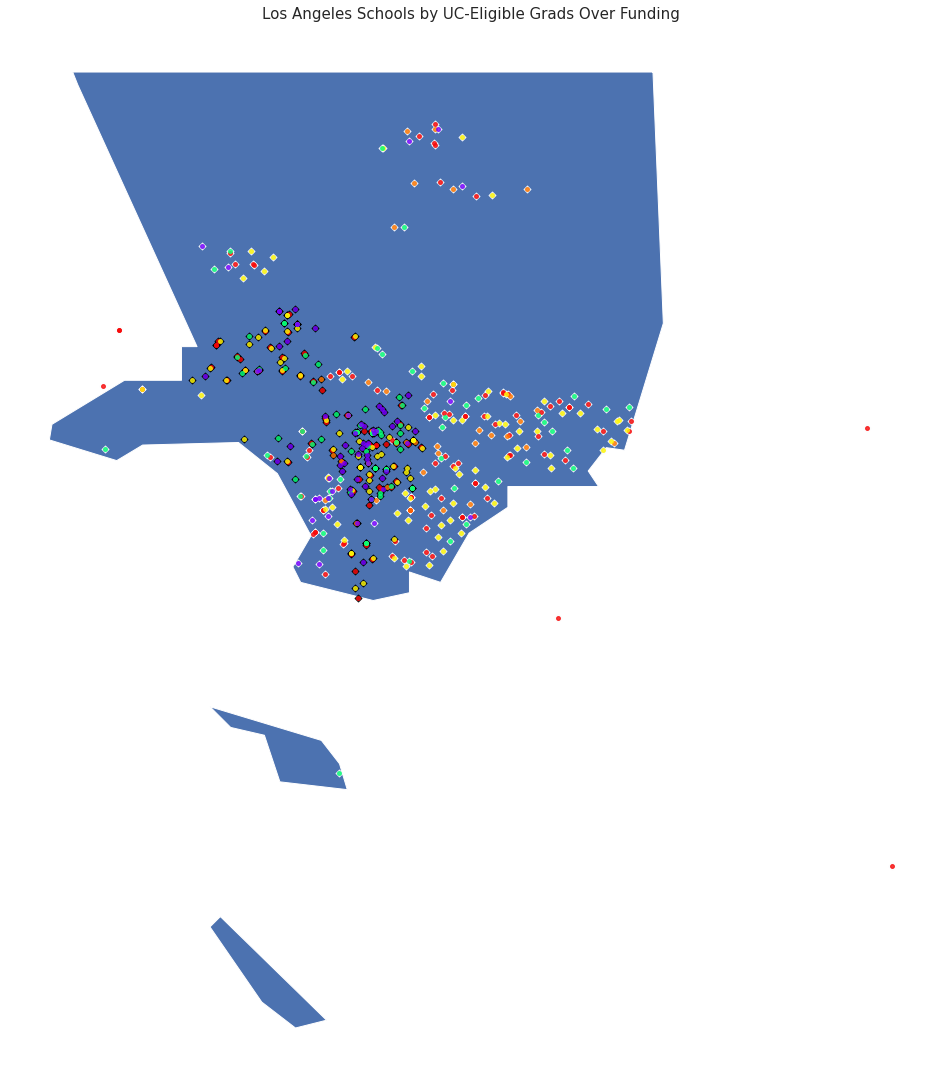

In [ ]:
#Map everything
#red-purple is lowest-highest performing schools
#white-black is lowest-highest funded schools
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geocash20df.plot(ax=basemap, color='#FCFCFC', marker="D", markersize=25,alpha=0.8)
geocash40df.plot(ax=basemap, color='#BDBDBD', marker="D", markersize=25,alpha=0.8)
geocash60df.plot(ax=basemap, color='#7E7E7E', marker="D", markersize=25,alpha=0.8)
geocash80df.plot(ax=basemap, color='#3F3F3F', marker="D", markersize=25,alpha=0.8)
geocash100df.plot(ax=basemap, color='#000000', marker="D", markersize=25,alpha=0.8)
geouc20df.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geouc40df.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geouc60df.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geouc80df.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geouc100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Los Angeles Schools by UC-Eligible Grads Over Funding", fontsize=15, fontweight=3)

(-119.0097, -117.5819, 32.69835, 34.92145)

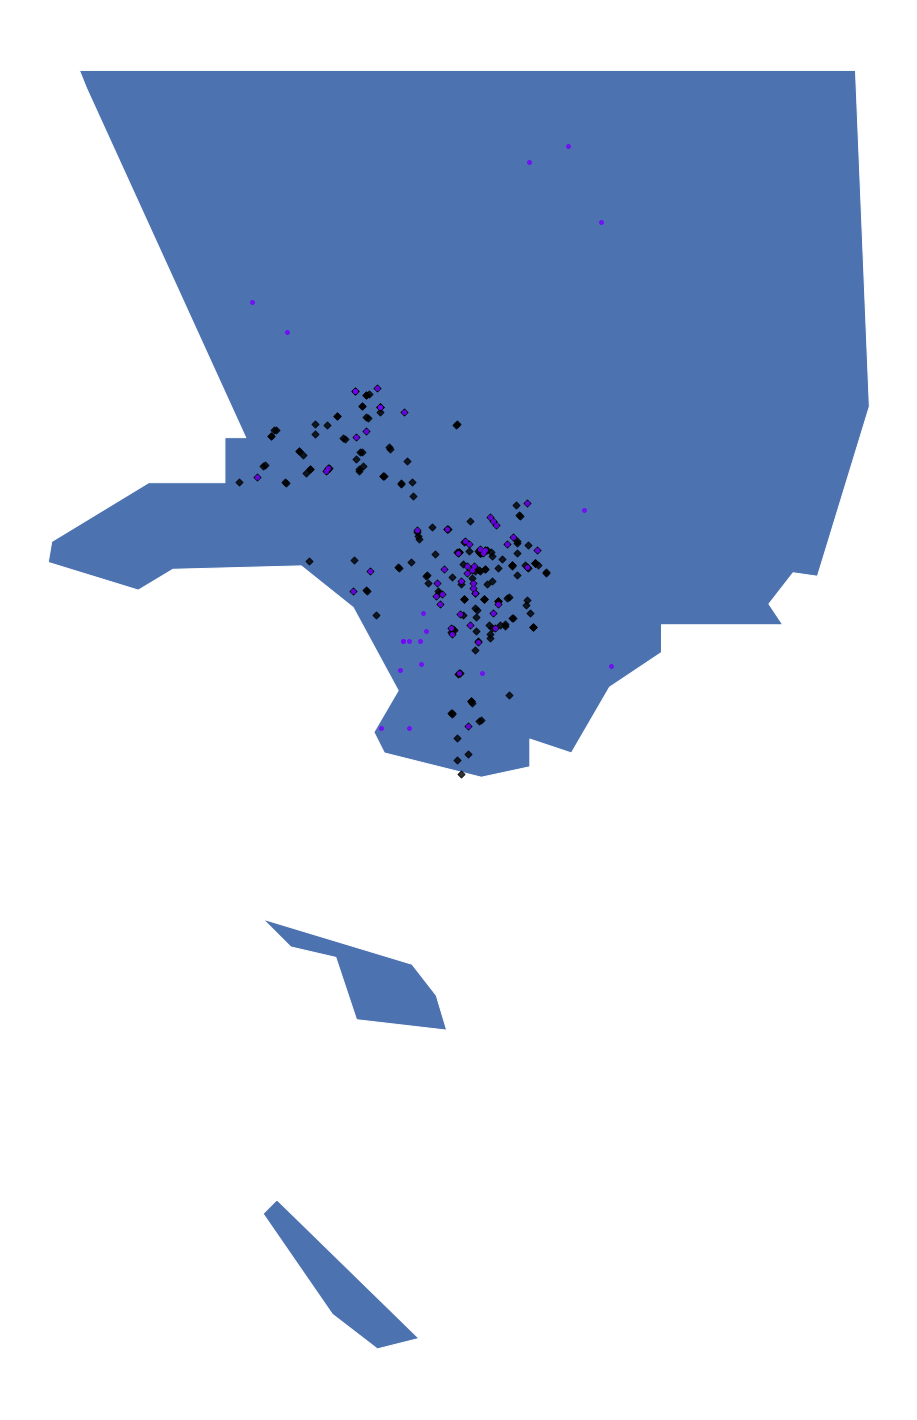

In [ ]:
#Map of only the highest performing/funded schools
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)

geocash100df.plot(ax=basemap, color='#000000', marker="D", markersize=25,alpha=0.8)
geouc100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')

In [ ]:
ultrageo = lageo[lageo['UC-EligiblePercent'].notna()]
ultrageo = lageo[lageo['CashPercent'].notna()]
ultrageo



,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
4023,19642120000000,No Data,POINT (-118.0725479125977 33.87898635864258),0-20%,16.666667,0-20%,4.080357
4024,19642121930056,Cerritos High,POINT (-118.0647888183594 33.86546325683594),61-80%,71.089109,0-20%,4.080357
4026,19642121930361,Artesia High,POINT (-118.0744018554688 33.84596252441406),41-60%,51.644737,0-20%,4.080357
4027,19642121931641,Tracy (Wilbur) High (Continuation),POINT (-118.0719909667969 33.87896728515625),0-20%,0.877193,0-20%,4.080357
4028,19642121931880,Whitney (Gretchen) High,POINT (-118.0551071166992 33.87899780273438),81-100%,99.378882,0-20%,4.080357
...,...,...,...,...,...,...,...
7245,19757131937697,San Gabriel High,POINT (-118.1080169677734 34.09192276000977),61-80%,63.940520,0-20%,3.381229
7246,19757131995430,Independence High (Alternative),POINT (-118.1419372558594 34.09123611450195),0-20%,5.555556,0-20%,3.381229
7272,19768690119016,Da Vinci Science,POINT (-118.3840789794922 33.91790771484375),81-100%,94.871795,0-20%,0.484725
7273,19768690119636,Da Vinci Design,POINT (-118.374382019043 33.91906356811523),81-100%,97.297297,0-20%,0.484725


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


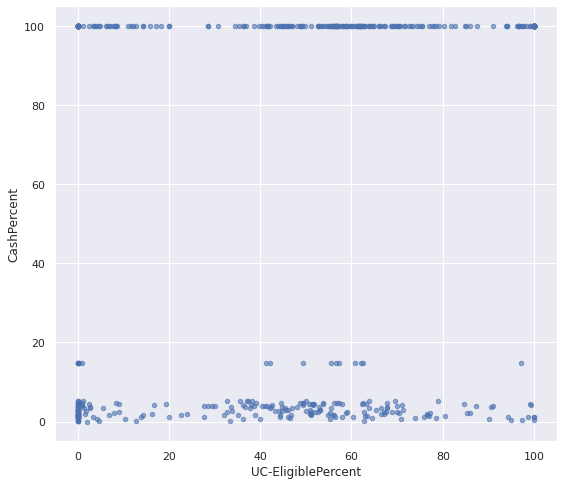

In [ ]:
ultrageo.plot.scatter(x='UC-EligiblePercent', y='CashPercent',  figsize=(9,8), alpha=0.6)

##Once more, without outliers

In [ ]:
#Remove outliers
lamoneydf2=lamoneydf.loc[lamoneydf['Current Expense ADA'] != temp[-1]]
lamoneydf2=lamoneydf2.loc[lamoneydf2['Current Expense ADA'] != temp[-2]]

In [ ]:
#Find new minimum and maximum
minmoney2=min(lamoneydf2['Current Expense ADA'])
maxmoney2=max(lamoneydf2['Current Expense ADA'])

In [ ]:
#Set min value to 0 and max value to 100
minmaxmoney2=[]
for value in lamoneydf2['Current Expense ADA']:
  mmm2=(value-minmoney2)/(maxmoney2-minmoney2)
  minmaxmoney2.append(mmm2*100)
print(minmaxmoney2)

[77.53211789705958, 76.91015535466627, 35.86354118510863, 32.142060751094554, 50.59255431974547, 13.279657823480736, 46.09888466304859, 14.710093974227986, 37.97568868463274, 56.68149379785634, 8.103266760161764, 23.081026063377248, 18.12474991356236, 26.0966703054648, 44.651937951369604, 25.221804817975922, 82.90605296587947, 12.436337219466147, 12.304602367420198, 32.677546802584196, 32.27193088096468, 32.779213009545046, 31.84362750620603, 12.676070564195005, 17.82398576595406, 97.30186355672447, 28.02743472501175, 0.0, 29.505421291242413, 4.828154196984589, 0.40643173757143247, 35.87706042088333, 9.504527778533165, 15.356259056528277, 51.557897681140275, 42.56531383662703, 20.254456880242106, 20.159006413867317, 16.296545213685505, 5.924222352580116, 11.546787044842684, 53.02675487838515, 20.506660554521762, 100.0, 25.865949784585744, 24.90635598323304, 67.82880296490825, 70.26684951303558, 42.6667469533159, 57.07996161780188, 62.78616686932571, 88.30034458511874, 9.288996973711303

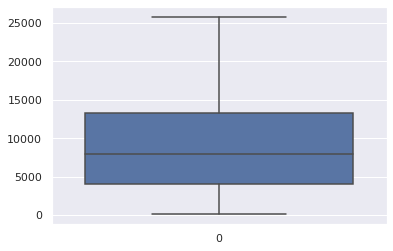

In [ ]:
#New Boxplot of Current Expense ADA in LA
temp2=[]
for i in lamoneydf2['Current Expense ADA']:
  temp2.append(i)
sns.boxplot(data=temp2)

In [ ]:
print("Mean: "+str(statistics.mean(temp2)))
print("Median: "+str(statistics.median(temp2)))
#print("Mode: "+str(statistics.mode(temp2))) still no mode
print("Min: "+str(min(temp2)))
print("Max: "+str(max(temp2)))

Mean: 9170.75282051282
Median: 7980.25
Min: 84.29
Max: 25825.39


In [ ]:
lamoneydf2['scaled_CurrentExpenseAda']=minmaxmoney2

In [ ]:
money_bins2=[]
for i in minmaxmoney2:
  if i<=20:
    money_bins2.append("0-20%")
  elif i<=40:
    money_bins2.append("21-40%")
  elif i<=60:
    money_bins2.append("41-60%")
  elif i<=80:
    money_bins2.append("61-80%")
  else:
    money_bins2.append("81-100%")
print(money_bins2)

['61-80%', '61-80%', '21-40%', '21-40%', '41-60%', '0-20%', '41-60%', '0-20%', '21-40%', '41-60%', '0-20%', '21-40%', '0-20%', '21-40%', '41-60%', '21-40%', '81-100%', '0-20%', '0-20%', '21-40%', '21-40%', '21-40%', '21-40%', '0-20%', '0-20%', '81-100%', '21-40%', '0-20%', '21-40%', '0-20%', '0-20%', '21-40%', '0-20%', '0-20%', '41-60%', '41-60%', '21-40%', '21-40%', '0-20%', '0-20%', '0-20%', '41-60%', '21-40%', '81-100%', '21-40%', '21-40%', '61-80%', '61-80%', '41-60%', '41-60%', '61-80%', '81-100%', '0-20%', '0-20%', '41-60%', '21-40%', '0-20%', '0-20%', '0-20%', '21-40%', '81-100%', '0-20%', '21-40%', '21-40%', '21-40%', '41-60%', '81-100%', '0-20%', '81-100%', '61-80%', '41-60%', '41-60%', '0-20%', '0-20%', '21-40%', '21-40%', '61-80%', '0-20%']


In [ ]:
lamoneydf2['scaled_bins_CurrentExpenseAda'] = money_bins2

In [ ]:
lamoneydf2.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,scaled_CurrentExpenseAda,scaled_bins_CurrentExpenseAda
245,19,64212,ABC Unified,2.086270e+08,20041.91,10409.536830,Unified,77.532118,61-80%
246,19,64246,Antelope Valley Union High,2.380238e+08,19881.81,11971.935759,High,76.910155,61-80%
247,19,64261,Arcadia Unified,9.599930e+07,9315.96,10304.820542,Unified,35.863541,21-40%
248,19,64279,Azusa Unified,1.081292e+08,8358.01,12937.189278,Unified,32.142061,21-40%
249,19,64287,Baldwin Park Unified,1.554206e+08,13107.37,11857.493834,Unified,50.592554,41-60%


In [ ]:
lamoneydf2.loc[lamoneydf2['CDS'] == 64519]

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,scaled_CurrentExpenseAda,scaled_bins_CurrentExpenseAda
266,19,64519,El Monte Union High,1.112083e+08,8522.02,13049.521714,High,32.779213,21-40%


In [ ]:
#Form a list that lines up the money rate with the correct CDS Code in the dataframe
cashbin2=[]
cashnobin2=[]
for k in lageo['CDSCode']:
  g=int(str(k)[2:7])
  t=0
  for h in lamoneydf2['CDS']:
    if g==h:
      i=lamoneydf2[lamoneydf2['CDS']==h].index.item()
      cashbin2.append(lamoneydf2['scaled_bins_CurrentExpenseAda'][i])
      cashnobin2.append(lamoneydf2['scaled_CurrentExpenseAda'][i])
      t=1
  if t==0:
    cashbin2.append(None)
    cashnobin2.append(None)
print(cashbin2)
print(cashnobin2)

[None, None, None, None, None, None, None, None, None, '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '41-60%', '41-60%', '41-60%', '41-60%', '0-20%', '0-20%', '41-60%', '41-60%', '41-60%', '0-20%', '0-20%', '21-40%', '21-40%', '21-40%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '0-20%', '0-20%', '0-20%', '21-40%', '21-40%', '41-60%', '41-60%', '41-60%', '41-60%', '21-40%', '21-40%', '21-40%', '81-100%', '81-100%', '81-100%', '0-20%', '0-20%', '0-20%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '0-20%', '0-20%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '21-40%', '21-40%', '0-20%', '21-40%', '21-40%', '21-40%',

In [ ]:
lageo2=lageo.drop(columns=['CashBin','CashPercent'])
lageo2.head(2)

,CDSCode,School,coordinates,binner,UC-EligiblePercent
3586,19101990112128,Aspire Ollin University Preparatory Academy,POINT (-118.2265319824219 33.99015426635742),81-100%,100.0
3591,19101990121822,"Nidorf, Barry J.",POINT (-118.4841232299805 34.31448364257812),0-20%,0.0


In [ ]:
#Add money rates as new columns in map dataframe
lageo2['CashBin']=cashbin2
lageo2['CashPercent']=cashnobin2
lageo2

,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
3586,19101990112128,Aspire Ollin University Preparatory Academy,POINT (-118.2265319824219 33.99015426635742),81-100%,100.000000,None,NaN
3591,19101990121822,"Nidorf, Barry J.",POINT (-118.4841232299805 34.31448364257812),0-20%,0.000000,None,NaN
3593,19101990121897,Central Juvenile Hall,POINT (-118.2058715820312 34.06349563598633),0-20%,0.000000,None,NaN
3594,19101990121905,"Kirby, Dorothy Camp",POINT (-118.1701889038086 34.01198196411133),0-20%,0.000000,None,NaN
3595,19101990121921,Afflerbaugh-Paige Camp,POINT (-117.742431640625 34.15207672119141),0-20%,0.000000,None,NaN
...,...,...,...,...,...,...,...
7246,19757131995430,Independence High (Alternative),POINT (-118.1419372558594 34.09123611450195),0-20%,5.555556,61-80%,64.247759
7272,19768690119016,Da Vinci Science,POINT (-118.3840789794922 33.91790771484375),81-100%,94.871795,0-20%,9.210407
7273,19768690119636,Da Vinci Design,POINT (-118.374382019043 33.91906356811523),81-100%,97.297297,0-20%,9.210407
7275,19768690131128,Da Vinci Communications,POINT (-118.3839797973633 33.91777420043945),81-100%,100.000000,0-20%,9.210407


In [ ]:
#remove null values
ultrageo2 = lageo2[lageo2['CashBin'].notna()]
ultrageo2

,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
4023,19642120000000,No Data,POINT (-118.0725479125977 33.87898635864258),0-20%,16.666667,61-80%,77.532118
4024,19642121930056,Cerritos High,POINT (-118.0647888183594 33.86546325683594),61-80%,71.089109,61-80%,77.532118
4026,19642121930361,Artesia High,POINT (-118.0744018554688 33.84596252441406),41-60%,51.644737,61-80%,77.532118
4027,19642121931641,Tracy (Wilbur) High (Continuation),POINT (-118.0719909667969 33.87896728515625),0-20%,0.877193,61-80%,77.532118
4028,19642121931880,Whitney (Gretchen) High,POINT (-118.0551071166992 33.87899780273438),81-100%,99.378882,61-80%,77.532118
...,...,...,...,...,...,...,...
7245,19757131937697,San Gabriel High,POINT (-118.1080169677734 34.09192276000977),61-80%,63.940520,61-80%,64.247759
7246,19757131995430,Independence High (Alternative),POINT (-118.1419372558594 34.09123611450195),0-20%,5.555556,61-80%,64.247759
7272,19768690119016,Da Vinci Science,POINT (-118.3840789794922 33.91790771484375),81-100%,94.871795,0-20%,9.210407
7273,19768690119636,Da Vinci Design,POINT (-118.374382019043 33.91906356811523),81-100%,97.297297,0-20%,9.210407


In [ ]:
#Set each category to its own dataframe by percentage of uc-eligible grads/funding
tgeouc20=ultrageo2.loc[ultrageo2['binner'] == '0-20%']
tgeouc40=ultrageo2.loc[ultrageo2['binner'] == '21-40%']
tgeouc60=ultrageo2.loc[ultrageo2['binner'] == '41-60%']
tgeouc80=ultrageo2.loc[ultrageo2['binner'] == '61-80%']
tgeouc100=ultrageo2.loc[ultrageo2['binner'] == '81-100%']
tgeocash20=ultrageo2.loc[ultrageo2['CashBin'] == '0-20%']
tgeocash40=ultrageo2.loc[ultrageo2['CashBin'] == '21-40%']
tgeocash60=ultrageo2.loc[ultrageo2['CashBin'] == '41-60%']
tgeocash80=ultrageo2.loc[ultrageo2['CashBin'] == '61-80%']
tgeocash100=ultrageo2.loc[ultrageo2['CashBin'] == '81-100%']

In [ ]:
#Make previous dataframes mapable
geouc20df2 = gpd.GeoDataFrame(tgeouc20, geometry='coordinates')
geouc40df2 = gpd.GeoDataFrame(tgeouc40, geometry='coordinates')
geouc60df2 = gpd.GeoDataFrame(tgeouc60, geometry='coordinates')
geouc80df2 = gpd.GeoDataFrame(tgeouc80, geometry='coordinates')
geouc100df2 = gpd.GeoDataFrame(tgeouc100, geometry='coordinates')
geocash20df2 = gpd.GeoDataFrame(tgeocash20, geometry='coordinates')
geocash40df2 = gpd.GeoDataFrame(tgeocash40, geometry='coordinates')
geocash60df2 = gpd.GeoDataFrame(tgeocash60, geometry='coordinates')
geocash80df2 = gpd.GeoDataFrame(tgeocash80, geometry='coordinates')
geocash100df2 = gpd.GeoDataFrame(tgeocash100, geometry='coordinates')

Text(0.5, 1.0, 'Los Angeles Schools by UC-Eligible Grads Over Funding')

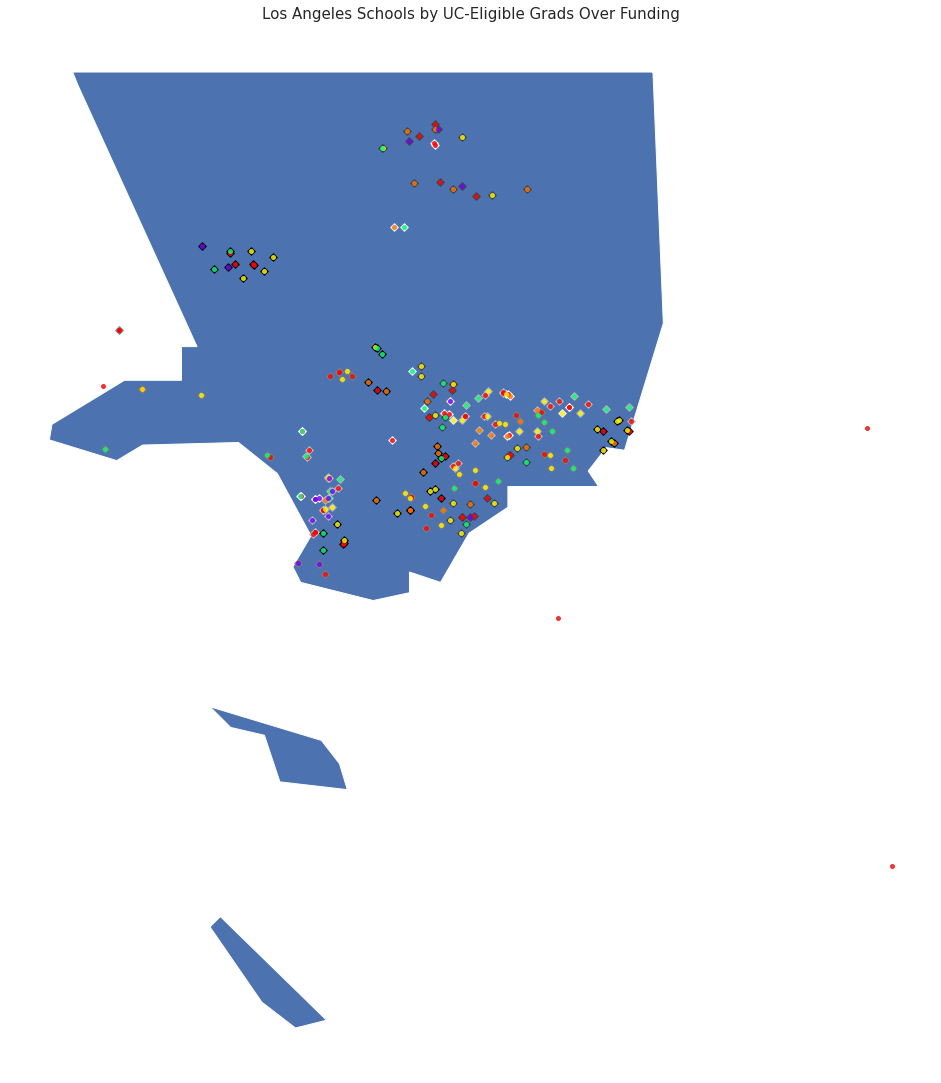

In [ ]:
#Map everything
#red-purple is lowest-highest performing schools
#white-black is lowest-highest funded schools
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geocash20df2.plot(ax=basemap, color='#FCFCFC', marker="D", markersize=30,alpha=0.8)
geocash40df2.plot(ax=basemap, color='#BDBDBD', marker="D", markersize=30,alpha=0.8)
geocash60df2.plot(ax=basemap, color='#7E7E7E', marker="D", markersize=30,alpha=0.8)
geocash80df2.plot(ax=basemap, color='#3F3F3F', marker="D", markersize=30,alpha=0.8)
geocash100df2.plot(ax=basemap, color='#000000', marker="D", markersize=30,alpha=0.8)
geouc20df2.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geouc40df2.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geouc60df2.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geouc80df2.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geouc100df2.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Los Angeles Schools by UC-Eligible Grads Over Funding", fontsize=15, fontweight=3)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


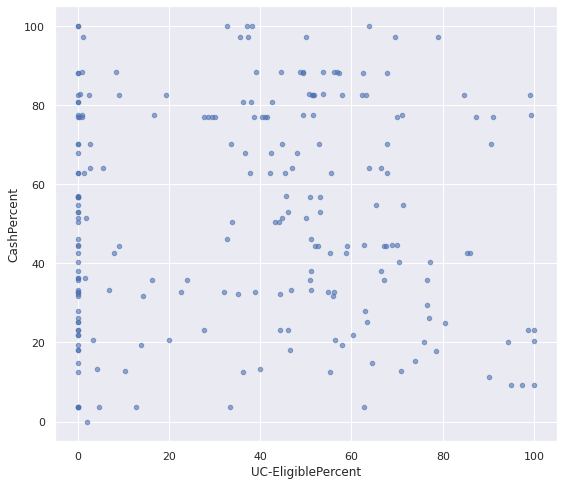

In [ ]:
ultrageo2.plot.scatter(x='UC-EligiblePercent', y='CashPercent',  figsize=(9,8), alpha=0.6)

#San Francisco

In [ ]:
#Make a dataframe with only San Fran County schools (San Fran county code is 38; the first two digits of the CDS Code)
df=ogdf.loc[ogdf['CDS_CODE'] >= 38000000000000]
df=df.loc[df['CDS_CODE'] < 39000000000000]

In [ ]:
print(df)

             CDS_CODE  ETHNIC GENDER  GRADS  UC_GRADS  YEAR
16270  38103893830361       6      M      4         0  1617
16271  38103893830361       0      M      1         0  1617
16272  38103893830361       2      M      1         0  1617
16273  38103893830361       7      M      1         0  1617
16274  38103893830361       5      M      2         0  1617
...               ...     ...    ...    ...       ...   ...
16598  38684783839081       5      F     20         5  1617
16599  38684783839081       5      M     31        10  1617
16600  38684783839081       0      M      7         5  1617
16601  38684783839081       4      M     12         9  1617
16602  38684783839081       1      F      2         1  1617

[333 rows x 6 columns]


In [ ]:
df.tail(3)

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
16600,38684783839081,0,M,7,5,1617
16601,38684783839081,4,M,12,9,1617
16602,38684783839081,1,F,2,1,1617


In [ ]:
#make a list of schools and lists of the percentage of students who graduated UC-eligible
sch=df['CDS_CODE'][16270]
code=[]
rate=[]
rate1=[]
grad=0
ucgrad=0
for i in range(16270,16602):
  if df['CDS_CODE'][i]==sch:
    grad+=df['GRADS'][i]
    ucgrad+=df['UC_GRADS'][i]
  else:
    code.append(sch)
    if grad==0:
      rate.append(0)
      rate1.append(0)
    else:
      rate.append(100*ucgrad/grad)
      rate1.append(100*ucgrad/grad)
    sch=df['CDS_CODE'][i]
    grad=df['GRADS'][i]
    ucgrad=df['UC_GRADS'][i]
  if i==3835:
    code.append(sch)
    rate.append(100*ucgrad/grad)
    rate1.append(100*ucgrad/grad)

In [ ]:
#cds codes for each high school in San Fran County
print(code)

[38103893830361, 38103893830395, 38103893830445, 38684780101774, 38684780102103, 38684780107300, 38684780118133, 38684780118141, 38684780119875, 38684780119958, 38684780127530, 38684783830031, 38684783830064, 38684783830197, 38684783830205, 38684783830254, 38684783830288, 38684783830387, 38684783830403, 38684783830411, 38684783830429, 38684783830437, 38684783831765, 38684783833241, 38684783833407, 38684783834082, 38684783834769]


In [ ]:
#percent of UC-eligible graduates
print(rate)

[0.0, 0.0, 0.0, 3.225806451612903, 64.1025641025641, 100.0, 0.0, 0.45454545454545453, 0.0, 37.17948717948718, 100.0, 0.0, 0.0, 17.441860465116278, 67.6470588235294, 59.38864628820961, 58.92857142857143, 65.69343065693431, 18.823529411764707, 100.0, 0.0, 84.0, 57.971014492753625, 60.08492569002123, 91.42857142857143, 46.18834080717489, 30.0]


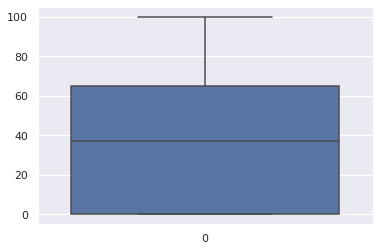

In [ ]:
#boxplot of the UC-eligible gradute rate
sns.boxplot(data=rate)

In [ ]:
#statistics
print("Mean: "+str(statistics.mean(rate)))
print("Median: "+str(statistics.median(rate)))
print("Mode: "+str(statistics.mode(rate)))
print("Min: "+str(min(rate)))
print("Max: "+str(max(rate)))

Mean: 39.35401306225395
Median: 37.17948717948718
Mode: 0.0
Min: 0.0
Max: 100.0


In [ ]:
binrate1=[]
rate1.sort()
for i in rate1:
  if i<=20:
    binrate1.append("0-20%")
  elif i<=40:
    binrate1.append("21-40%")
  elif i<=60:
    binrate1.append("41-60%")
  elif i<=80:
    binrate1.append("61-80%")
  else:
    binrate1.append("81-100%")
print(binrate1)

['0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '21-40%', '21-40%', '41-60%', '41-60%', '41-60%', '41-60%', '61-80%', '61-80%', '61-80%', '61-80%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%']


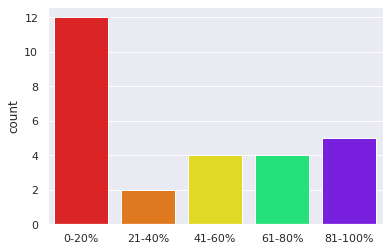

In [ ]:
#number of schools that fall into each percent range of UC-eligible graduates
import seaborn as sns

sns.set_theme(style="darkgrid")

gradecolor=['#F70707','#FF7700','#FFF707','#07FF77','#7700FF']

ax = sns.countplot(x=binrate1, palette=gradecolor)

In [ ]:
binrate=[]
for i in rate:
  if i<=20:
    binrate.append("0-20%")
  elif i<=40:
    binrate.append("21-40%")
  elif i<=60:
    binrate.append("41-60%")
  elif i<=80:
    binrate.append("61-80%")
  else:
    binrate.append("81-100%")
print(binrate)

['0-20%', '0-20%', '0-20%', '0-20%', '61-80%', '81-100%', '0-20%', '0-20%', '0-20%', '21-40%', '81-100%', '0-20%', '0-20%', '0-20%', '61-80%', '41-60%', '41-60%', '61-80%', '0-20%', '81-100%', '0-20%', '81-100%', '41-60%', '61-80%', '81-100%', '41-60%', '21-40%']


In [ ]:
#Make sure to only include schools that are active and have geographic coordinates
dfma=dfm[dfm.StatusType == 'Active']
dfma19=dfma[dfma.County=='San Francisco']
dfma19 = dfma19.loc[(dfma19['Latitude'].notnull()) & dfma19['Longitude'].notnull()]

dfma19.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate
13288,38103890000000,0691111,No Data,Active,San Francisco,San Francisco County Office of Education,No Data,555 Franklin Street,555 Franklin St.,San Francisco,94102-5207,CA,555 Franklin Street,555 Franklin St.,San Francisco,94102-5207,CA,(415) 241-6000,No Data,(415) 241-6012,matthewsv@sfusd.edu,www.sfusd.edu/,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,37.779519,-122.42190,Vincent,Matthews,matthewsv@sfusd.edu,08/20/2019
13295,38103893830361,0691111,09270,Active,San Francisco,San Francisco County Office of Education,S.F. County Court Woodside Learning Ctr,"375 Woodside Avenue, W1","375 Woodside Ave., W1",San Francisco,94127,CA,"375 Woodside Avenue, W1","375 Woodside Ave., W1",San Francisco,94127,CA,(415) 753-7792,No Data,(415) 753-7793,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,6-12,9-12,N,N,N,No Data,37.745756,-122.45235,Chris,Lanier,lanierc@sfusd.edu,08/13/2020
13297,38103893830395,0691111,09472,Active,San Francisco,San Francisco County Office of Education,S.F. County Opportunity (Hilltop),1325 Floororida Street,1325 Fl.orida St.,San Francisco,94110-4114,CA,555 Franklin Street,555 Franklin St.,San Francisco,94103,CA,(415) 695-5606,No Data,(415) 695-5367,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),13,Opportunity Schools,OPP,Opportunity School,HS,High School,6-12,10-12,N,N,N,No Data,37.750739,-122.40980,Elisa,Villafuerte,villafuertee@sfusd.edu,08/13/2020


In [ ]:
#Make sure the longitude and latitude are float types
dfma19=dfma19.loc[dfma19['Longitude']!="No Data"]
dfma19["Longitude"] = pd.to_numeric(dfma19["Longitude"], downcast="float")
dfma19["Latitude"] = pd.to_numeric(dfma19["Latitude"], downcast="float")

In [ ]:
#Create a new column combining longitude and latitude to make it geo-conversion friendly
dfma19['coordinates'] = list(dfma19[['Longitude', 'Latitude']].values)
dfma19.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates
13288,38103890000000,0691111,No Data,Active,San Francisco,San Francisco County Office of Education,No Data,555 Franklin Street,555 Franklin St.,San Francisco,94102-5207,CA,555 Franklin Street,555 Franklin St.,San Francisco,94102-5207,CA,(415) 241-6000,No Data,(415) 241-6012,matthewsv@sfusd.edu,www.sfusd.edu/,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,37.779518,-122.421898,Vincent,Matthews,matthewsv@sfusd.edu,08/20/2019,"[-122.4219, 37.77952]"
13295,38103893830361,0691111,09270,Active,San Francisco,San Francisco County Office of Education,S.F. County Court Woodside Learning Ctr,"375 Woodside Avenue, W1","375 Woodside Ave., W1",San Francisco,94127,CA,"375 Woodside Avenue, W1","375 Woodside Ave., W1",San Francisco,94127,CA,(415) 753-7792,No Data,(415) 753-7793,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,6-12,9-12,N,N,N,No Data,37.745754,-122.452347,Chris,Lanier,lanierc@sfusd.edu,08/13/2020,"[-122.45235, 37.745754]"
13297,38103893830395,0691111,09472,Active,San Francisco,San Francisco County Office of Education,S.F. County Opportunity (Hilltop),1325 Floororida Street,1325 Fl.orida St.,San Francisco,94110-4114,CA,555 Franklin Street,555 Franklin St.,San Francisco,94103,CA,(415) 695-5606,No Data,(415) 695-5367,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),13,Opportunity Schools,OPP,Opportunity School,HS,High School,6-12,10-12,N,N,N,No Data,37.750740,-122.409798,Elisa,Villafuerte,villafuertee@sfusd.edu,08/13/2020,"[-122.4098, 37.75074]"


In [ ]:
#Making coordinates into geo-readable points
dfma19['coordinates'] = dfma19['coordinates'].apply(Point)

In [ ]:
dfma19.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates
13288,38103890000000,0691111,No Data,Active,San Francisco,San Francisco County Office of Education,No Data,555 Franklin Street,555 Franklin St.,San Francisco,94102-5207,CA,555 Franklin Street,555 Franklin St.,San Francisco,94102-5207,CA,(415) 241-6000,No Data,(415) 241-6012,matthewsv@sfusd.edu,www.sfusd.edu/,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,37.779518,-122.421898,Vincent,Matthews,matthewsv@sfusd.edu,08/20/2019,POINT (-122.4218978881836 37.77951812744141)
13295,38103893830361,0691111,09270,Active,San Francisco,San Francisco County Office of Education,S.F. County Court Woodside Learning Ctr,"375 Woodside Avenue, W1","375 Woodside Ave., W1",San Francisco,94127,CA,"375 Woodside Avenue, W1","375 Woodside Ave., W1",San Francisco,94127,CA,(415) 753-7792,No Data,(415) 753-7793,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,6-12,9-12,N,N,N,No Data,37.745754,-122.452347,Chris,Lanier,lanierc@sfusd.edu,08/13/2020,POINT (-122.4523468017578 37.74575424194336)
13297,38103893830395,0691111,09472,Active,San Francisco,San Francisco County Office of Education,S.F. County Opportunity (Hilltop),1325 Floororida Street,1325 Fl.orida St.,San Francisco,94110-4114,CA,555 Franklin Street,555 Franklin St.,San Francisco,94103,CA,(415) 695-5606,No Data,(415) 695-5367,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),13,Opportunity Schools,OPP,Opportunity School,HS,High School,6-12,10-12,N,N,N,No Data,37.750740,-122.409798,Elisa,Villafuerte,villafuertee@sfusd.edu,08/13/2020,POINT (-122.409797668457 37.75074005126953)


In [ ]:
#Form a list that lines up the percentage of UC-eligible graduates with the correct CDS Code in the dataframe
pointer=[]
nonbin=[]
for k in dfma19['CDSCode']:
  if k in code:
    i=code.index(k)
    pointer.append(binrate[i])
    nonbin.append(rate[i])
  else:
    pointer.append(None)
    nonbin.append(None)
print(pointer)
print(nonbin)

[None, '0-20%', '0-20%', '0-20%', None, None, None, None, '0-20%', '61-80%', '81-100%', None, None, None, None, None, None, None, None, None, None, None, None, '0-20%', '0-20%', '0-20%', '21-40%', None, None, None, None, '81-100%', None, '0-20%', '0-20%', '0-20%', '61-80%', '41-60%', '41-60%', '61-80%', '0-20%', '81-100%', '0-20%', '81-100%', '41-60%', '61-80%', '81-100%', '41-60%', '21-40%', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
[None, 0.0, 0.0, 0.0, None, None, None, None, 3.225806451612903,

In [ ]:
#Create a new column with the list of lined up UC-eligible graduate percentages
dfma19['binner']=pointer
dfma19['UC-EligiblePercent']=nonbin
dfma19.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates,binner,UC-EligiblePercent
13288,38103890000000,0691111,No Data,Active,San Francisco,San Francisco County Office of Education,No Data,555 Franklin Street,555 Franklin St.,San Francisco,94102-5207,CA,555 Franklin Street,555 Franklin St.,San Francisco,94102-5207,CA,(415) 241-6000,No Data,(415) 241-6012,matthewsv@sfusd.edu,www.sfusd.edu/,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,37.779518,-122.421898,Vincent,Matthews,matthewsv@sfusd.edu,08/20/2019,POINT (-122.4218978881836 37.77951812744141),None,NaN
13295,38103893830361,0691111,09270,Active,San Francisco,San Francisco County Office of Education,S.F. County Court Woodside Learning Ctr,"375 Woodside Avenue, W1","375 Woodside Ave., W1",San Francisco,94127,CA,"375 Woodside Avenue, W1","375 Woodside Ave., W1",San Francisco,94127,CA,(415) 753-7792,No Data,(415) 753-7793,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,6-12,9-12,N,N,N,No Data,37.745754,-122.452347,Chris,Lanier,lanierc@sfusd.edu,08/13/2020,POINT (-122.4523468017578 37.74575424194336),0-20%,0.0
13297,38103893830395,0691111,09472,Active,San Francisco,San Francisco County Office of Education,S.F. County Opportunity (Hilltop),1325 Floororida Street,1325 Fl.orida St.,San Francisco,94110-4114,CA,555 Franklin Street,555 Franklin St.,San Francisco,94103,CA,(415) 695-5606,No Data,(415) 695-5367,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),13,Opportunity Schools,OPP,Opportunity School,HS,High School,6-12,10-12,N,N,N,No Data,37.750740,-122.409798,Elisa,Villafuerte,villafuertee@sfusd.edu,08/13/2020,POINT (-122.409797668457 37.75074005126953),0-20%,0.0
13298,38103893830445,0691111,10647,Active,San Francisco,San Francisco County Office of Education,S.F. County Civic Center Secondary,727 Golden Gate Avenue,727 Golden Gate Ave.,San Francisco,94102-3101,CA,727 Golden Gate Avenue,727 Golden Gate Ave.,San Francisco,94102-3101,CA,(415) 241-3000,No Data,(415) 241-6192,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),10,County Community,COMM,County Community School,HS,High School,6-12,8-12,N,N,N,No Data,37.780689,-122.423080,Maurice,Harper,harperjr.m@sfusd.edu,08/13/2020,POINT (-122.4230804443359 37.78068923950195),0-20%,0.0
13301,38103896069561,0691111,09473,Active,San Francisco,San Francisco County Office of Education,S.F. County Special Education,3045 Santiago Street,3045 Santiago St.,San Francisco,94116-1526,CA,3045 Santiago Street,3045 Santiago St.,San Francisco,94116-1526,CA,(415) 759-2222,No Data,(415) 242-2528,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),09,Special Education Schools (Public),SPEC,Special Education School,ELEMHIGH,Elementary-High Combination,K-12,3-12,N,N,N,No Data,37.743843,-122.499893,Jean,Robertson,robertsonj1@sfusd.edu,08/13/2020,POINT (-122.4998931884766 37.74384307861328),None,NaN


In [ ]:
#Remove rows with null values in the UC-eligible percentage column from dataframe (gets rid of elementary and middle schools)
dfma19 = dfma19[dfma19['binner'].notna()]
dfma19.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates,binner,UC-EligiblePercent
13295,38103893830361,0691111,09270,Active,San Francisco,San Francisco County Office of Education,S.F. County Court Woodside Learning Ctr,"375 Woodside Avenue, W1","375 Woodside Ave., W1",San Francisco,94127,CA,"375 Woodside Avenue, W1","375 Woodside Ave., W1",San Francisco,94127,CA,(415) 753-7792,No Data,(415) 753-7793,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,6-12,9-12,N,N,N,No Data,37.745754,-122.452347,Chris,Lanier,lanierc@sfusd.edu,08/13/2020,POINT (-122.4523468017578 37.74575424194336),0-20%,0.000000
13297,38103893830395,0691111,09472,Active,San Francisco,San Francisco County Office of Education,S.F. County Opportunity (Hilltop),1325 Floororida Street,1325 Fl.orida St.,San Francisco,94110-4114,CA,555 Franklin Street,555 Franklin St.,San Francisco,94103,CA,(415) 695-5606,No Data,(415) 695-5367,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),13,Opportunity Schools,OPP,Opportunity School,HS,High School,6-12,10-12,N,N,N,No Data,37.750740,-122.409798,Elisa,Villafuerte,villafuertee@sfusd.edu,08/13/2020,POINT (-122.409797668457 37.75074005126953),0-20%,0.000000
13298,38103893830445,0691111,10647,Active,San Francisco,San Francisco County Office of Education,S.F. County Civic Center Secondary,727 Golden Gate Avenue,727 Golden Gate Ave.,San Francisco,94102-3101,CA,727 Golden Gate Avenue,727 Golden Gate Ave.,San Francisco,94102-3101,CA,(415) 241-3000,No Data,(415) 241-6192,No Data,www.sfusd.edu/,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),10,County Community,COMM,County Community School,HS,High School,6-12,8-12,N,N,N,No Data,37.780689,-122.423080,Maurice,Harper,harperjr.m@sfusd.edu,08/13/2020,POINT (-122.4230804443359 37.78068923950195),0-20%,0.000000
13309,38684780101774,0634410,11407,Active,San Francisco,San Francisco Unified,Five Keys Charter (SF Sheriff's),1 Moreland Drive,1 Moreland Dr.,San Bruno,94066-1670,CA,70 Oak Grove Street,70 Oak Grove St.,San Francisco,94107-1019,CA,(415) 734-3310,No Data,(415) 734-3314,No Data,www.fivekeyscharter.org,09/29/2003,No Data,Y,0567,Directly funded,54,Unified School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,10-12,N,N,Y,0601998,37.627724,-122.455742,Steve,Good,steveg@5keyscharter.org,08/13/2020,POINT (-122.4557418823242 37.62772369384766),0-20%,3.225806
13311,38684780102103,0634410,11252,Active,San Francisco,San Francisco Unified,Jordan (June) School for Equity,325 La Grande Avenue,325 La Grande Ave.,San Francisco,94112-2866,CA,325 La Grande Avenue,325 La Grande Ave.,San Francisco,94112-2866,CA,(415) 452-4922,No Data,(415) 452-4927,sch757@sfusd.edu,www.sfusd.edu,08/25/2003,No Data,N,No Data,No Data,54,Unified School District,63,Alternative Schools of Choice,ALTSOC,Alternative School of Choice,HS,High School,9-12,9-12,N,N,N,No Data,37.719997,-122.425499,Jessica,Huang,huangj5@sfusd.edu,08/13/2020,POINT (-122.4254989624023 37.71999740600586),61-80%,64.102564


In [ ]:
#Taken from https://github.com/johan/world.geo.json/blob/master/countries/USA/CA/Lake.geo.json
map_df = gpd.read_file("https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/CA/San%20Francisco.geo.json")
map_df.head()

,kind,name,state,geometry
0,county,San Francisco,CA,"MULTIPOLYGON (((-122.42810 37.70680, -122.5048..."


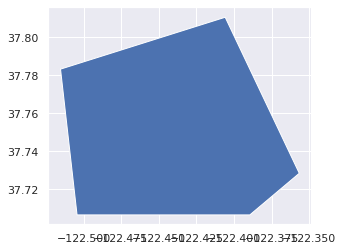

In [ ]:
map_df.plot()

In [ ]:
#Form smaller dataframe with more relevant information
lageo=dfma19[['CDSCode','School', 'coordinates', 'binner','UC-EligiblePercent']]
lageo.head()

,CDSCode,School,coordinates,binner,UC-EligiblePercent
13295,38103893830361,S.F. County Court Woodside Learning Ctr,POINT (-122.4523468017578 37.74575424194336),0-20%,0.000000
13297,38103893830395,S.F. County Opportunity (Hilltop),POINT (-122.409797668457 37.75074005126953),0-20%,0.000000
13298,38103893830445,S.F. County Civic Center Secondary,POINT (-122.4230804443359 37.78068923950195),0-20%,0.000000
13309,38684780101774,Five Keys Charter (SF Sheriff's),POINT (-122.4557418823242 37.62772369384766),0-20%,3.225806
13311,38684780102103,Jordan (June) School for Equity,POINT (-122.4254989624023 37.71999740600586),61-80%,64.102564


In [ ]:
type(lageo['coordinates'])

pandas.core.series.Series

In [ ]:
#Split dataframe into smaller dataframes according to percentages
lageo20=lageo.loc[lageo['binner'] == '0-20%']
lageo40=lageo.loc[lageo['binner'] == '21-40%']
lageo60=lageo.loc[lageo['binner'] == '41-60%']
lageo80=lageo.loc[lageo['binner'] == '61-80%']
lageo100=lageo.loc[lageo['binner'] == '81-100%']

In [ ]:
#Make mapable
geola20df = gpd.GeoDataFrame(lageo20, geometry='coordinates')
geola40df = gpd.GeoDataFrame(lageo40, geometry='coordinates')
geola60df = gpd.GeoDataFrame(lageo60, geometry='coordinates')
geola80df = gpd.GeoDataFrame(lageo80, geometry='coordinates')
geola100df = gpd.GeoDataFrame(lageo100, geometry='coordinates')

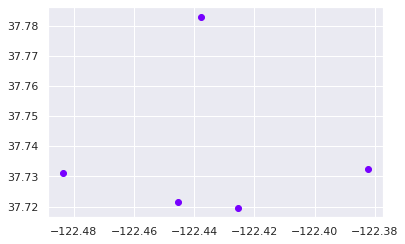

In [ ]:
#Rank 1 schools
geola100df.plot(color='#7700FF')

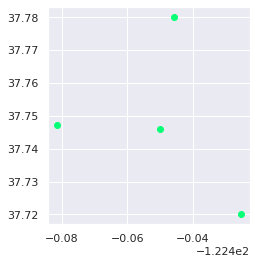

In [ ]:
#Rank 2 schools
geola80df.plot(color='#07FF77')

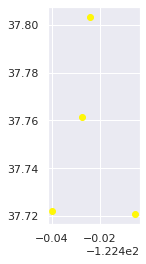

In [ ]:
#Rank 3 schools
geola60df.plot(color='#FFF707')

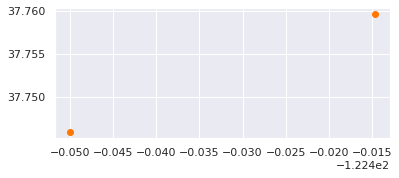

In [ ]:
#Rank 4 schools
geola40df.plot(color='#FF7700')

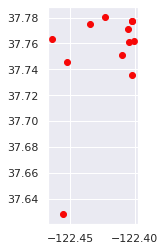

In [ ]:
#Rank 5 schools
geola20df.plot(color='#F70707')

Text(0.5, 1.0, 'San Francisco County Schools by UC-Eligible Grads')

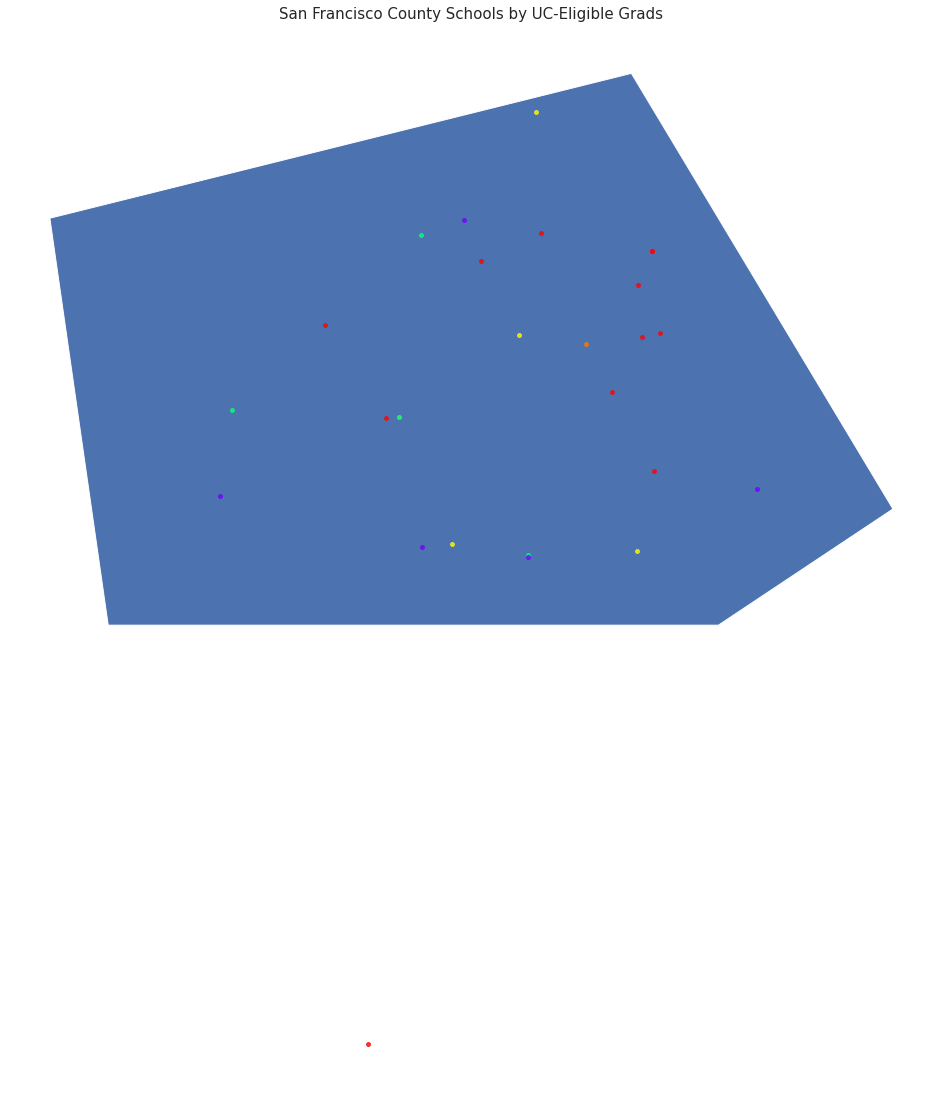

In [ ]:
#Plot schools over map of Lake County color-coded by percentage of UC-eligible students
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geola20df.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geola40df.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geola60df.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geola80df.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geola100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("San Francisco County Schools by UC-Eligible Grads", fontsize=15, fontweight=3)

#Lake County

In [ ]:
#Make a dataframe with only Lake County schools (Lake county code is 17; the first two digits of the CDS Code)
df=ogdf.loc[ogdf['CDS_CODE'] >= 17000000000000]
df=df.loc[df['CDS_CODE'] < 18000000000000]

In [ ]:
print(df)

            CDS_CODE  ETHNIC GENDER  GRADS  UC_GRADS  YEAR
3746  17101731730167       0      M      1         0  1617
3747  17101731730167       9      M      1         0  1617
3748  17640141730043       7      F      1         0  1617
3749  17640141730043       7      M      1         0  1617
3750  17640141730159       7      F      1         0  1617
...              ...     ...    ...    ...       ...   ...
3831  17769761737006       5      M      7         4  1617
3832  17769761737006       1      F      2         1  1617
3833  17769761737006       9      F      5         2  1617
3834  17769761737006       9      M      1         0  1617
3835  17769761737006       7      M      8         1  1617

[90 rows x 6 columns]


In [ ]:
df.tail(3)

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
3833,17769761737006,9,F,5,2,1617
3834,17769761737006,9,M,1,0,1617
3835,17769761737006,7,M,8,1,1617


In [ ]:
#make a list of schools and lists of the percentage of students who graduated UC-eligible
sch=df['CDS_CODE'][3746]
code=[]
rate=[]
rate1=[]
grad=0
ucgrad=0
for i in range(3746,3835):
  if df['CDS_CODE'][i]==sch:
    grad+=df['GRADS'][i]
    ucgrad+=df['UC_GRADS'][i]
  else:
    code.append(sch)
    if grad==0:
      rate.append(0)
      rate1.append(0)
    else:
      rate.append(100*ucgrad/grad)
      rate1.append(100*ucgrad/grad)
    sch=df['CDS_CODE'][i]
    grad=df['GRADS'][i]
    ucgrad=df['UC_GRADS'][i]
  if i==3835:
    code.append(sch)
    rate.append(100*ucgrad/grad)
    rate1.append(100*ucgrad/grad)

In [ ]:
#cds codes for each high school in Lake County
print(code)

[17101731730167, 17640141730043, 17640141730159, 17640141734359, 17640220000001, 17640220132571, 17640221730027, 17640221730118, 17640221735000, 17640301730019, 17640301730142, 17640301732304, 17640550129601, 17640551730035, 17640551736008, 17769761730050]


In [ ]:
#percent of UC-eligible graduates
print(rate)

[0.0, 0.0, 0.0, 21.73913043478261, 0.0, 23.076923076923077, 0.0, 0.0, 25.471698113207548, 0.0, 0.0, 45.348837209302324, 46.666666666666664, 0.0, 34.65346534653465, 0.0]


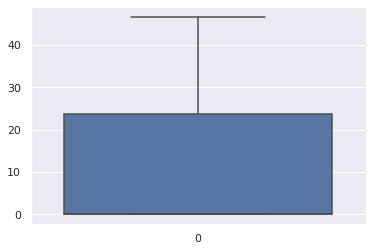

In [ ]:
#boxplot of the UC-eligible gradute rate
sns.boxplot(data=rate)

In [ ]:
#statistics
print("Mean: "+str(statistics.mean(rate)))
print("Median: "+str(statistics.median(rate)))
print("Mode: "+str(statistics.mode(rate)))
print("Min: "+str(min(rate)))
print("Max: "+str(max(rate)))

Mean: 12.309795052963555
Median: 0.0
Mode: 0.0
Min: 0.0
Max: 46.666666666666664


In [ ]:
binrate1=[]
rate1.sort()
for i in rate1:
  if i<=20:
    binrate1.append("0-20%")
  elif i<=40:
    binrate1.append("21-40%")
  elif i<=60:
    binrate1.append("41-60%")
  elif i<=80:
    binrate1.append("61-80%")
  else:
    binrate1.append("81-100%")
print(binrate1)

['0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '21-40%', '21-40%', '21-40%', '21-40%', '41-60%', '41-60%']


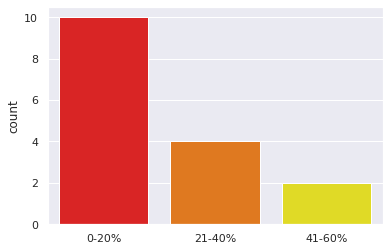

In [ ]:
#number of schools that fall into each percent range of UC-eligible graduates
import seaborn as sns

sns.set_theme(style="darkgrid")

gradecolor=['#F70707','#FF7700','#FFF707','#07FF77','#7700FF']

ax = sns.countplot(x=binrate1, palette=gradecolor)

In [ ]:
binrate=[]
for i in rate:
  if i<=20:
    binrate.append("0-20%")
  elif i<=40:
    binrate.append("21-40%")
  elif i<=60:
    binrate.append("41-60%")
  elif i<=80:
    binrate.append("61-80%")
  else:
    binrate.append("81-100%")
print(binrate)

['0-20%', '0-20%', '0-20%', '21-40%', '0-20%', '21-40%', '0-20%', '0-20%', '21-40%', '0-20%', '0-20%', '41-60%', '41-60%', '0-20%', '21-40%', '0-20%']


In [ ]:
#Make sure to only include schools that are active and have geographic coordinates
dfma=dfm[dfm.StatusType == 'Active']
dfma19=dfma[dfma.County=='Lake']
dfma19 = dfma19.loc[(dfma19['Latitude'].notnull()) & dfma19['Longitude'].notnull()]

dfma19.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate
3426,17101730000000,0691014,No Data,Active,Lake,Lake County Office of Education,No Data,1152 South Main Street,1152 South Main St.,Lakeport,95453-5517,CA,1152 South Main Street,1152 South Main St.,Lakeport,95453-5517,CA,(707) 262-4100,No Data,(707) 263-0197,tnewell@lakecoe.org,www.lakecoe.org,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,39.028703,-122.91600,Brock,Falkenberg,bfalkenberg@lakecoe.org,01/09/2019
3430,17101730128231,0691014,13724,Active,Lake,Lake County Office of Education,Clearlake Creativity,6945 Old Highway 53,6945 Old Highway 53,Clearlake,95422-9381,CA,6945 Old Highway 53,6945 Old Highway 53,Clearlake,95422-9381,CA,(707) 995-9523,No Data,(707) 995-9059,broderick@lakecoe.org,www.lakecoe.org,07/01/2013,No Data,N,No Data,No Data,0,County Office of Education (COE),09,Special Education Schools (Public),SPEC,Special Education School,ELEMHIGH,Elementary-High Combination,K-12,3-11,N,N,N,No Data,38.932891,-122.62444,Shelley,Tan,stan@lakecoe.org,08/18/2020
3431,17101731730068,0691014,07934,Active,Lake,Lake County Office of Education,Renaissance Court,1111 Whalen Way,1111 Whalen Way,Lakeport,95453-5517,CA,1152 South Main Street,1152 South Main St.,Lakeport,95453-5517,CA,(707) 262-4152,No Data,(707) 263-0197,clenners@lakecoe.org,www.lakecoe.org,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,K-12,9-11,N,N,Y,No Data,39.111728,-122.90840,Cynthia,Lenners,clenners@lakecoe.org,03/21/2019


In [ ]:
#Make sure the longitude and latitude are float types
dfma19=dfma19.loc[dfma19['Longitude']!="No Data"]
dfma19["Longitude"] = pd.to_numeric(dfma19["Longitude"], downcast="float")
dfma19["Latitude"] = pd.to_numeric(dfma19["Latitude"], downcast="float")

In [ ]:
#Create a new column combining longitude and latitude to make it geo-conversion friendly
dfma19['coordinates'] = list(dfma19[['Longitude', 'Latitude']].values)
dfma19.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates
3426,17101730000000,0691014,No Data,Active,Lake,Lake County Office of Education,No Data,1152 South Main Street,1152 South Main St.,Lakeport,95453-5517,CA,1152 South Main Street,1152 South Main St.,Lakeport,95453-5517,CA,(707) 262-4100,No Data,(707) 263-0197,tnewell@lakecoe.org,www.lakecoe.org,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,39.028702,-122.916000,Brock,Falkenberg,bfalkenberg@lakecoe.org,01/09/2019,"[-122.916, 39.0287]"
3430,17101730128231,0691014,13724,Active,Lake,Lake County Office of Education,Clearlake Creativity,6945 Old Highway 53,6945 Old Highway 53,Clearlake,95422-9381,CA,6945 Old Highway 53,6945 Old Highway 53,Clearlake,95422-9381,CA,(707) 995-9523,No Data,(707) 995-9059,broderick@lakecoe.org,www.lakecoe.org,07/01/2013,No Data,N,No Data,No Data,0,County Office of Education (COE),09,Special Education Schools (Public),SPEC,Special Education School,ELEMHIGH,Elementary-High Combination,K-12,3-11,N,N,N,No Data,38.932892,-122.624443,Shelley,Tan,stan@lakecoe.org,08/18/2020,"[-122.62444, 38.93289]"
3431,17101731730068,0691014,07934,Active,Lake,Lake County Office of Education,Renaissance Court,1111 Whalen Way,1111 Whalen Way,Lakeport,95453-5517,CA,1152 South Main Street,1152 South Main St.,Lakeport,95453-5517,CA,(707) 262-4152,No Data,(707) 263-0197,clenners@lakecoe.org,www.lakecoe.org,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,K-12,9-11,N,N,Y,No Data,39.111729,-122.908401,Cynthia,Lenners,clenners@lakecoe.org,03/21/2019,"[-122.9084, 39.11173]"


In [ ]:
#Making coordinates into geo-readable points
dfma19['coordinates'] = dfma19['coordinates'].apply(Point)

In [ ]:
dfma19.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates
3426,17101730000000,0691014,No Data,Active,Lake,Lake County Office of Education,No Data,1152 South Main Street,1152 South Main St.,Lakeport,95453-5517,CA,1152 South Main Street,1152 South Main St.,Lakeport,95453-5517,CA,(707) 262-4100,No Data,(707) 263-0197,tnewell@lakecoe.org,www.lakecoe.org,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,39.028702,-122.916000,Brock,Falkenberg,bfalkenberg@lakecoe.org,01/09/2019,POINT (-122.9160003662109 39.02870178222656)
3430,17101730128231,0691014,13724,Active,Lake,Lake County Office of Education,Clearlake Creativity,6945 Old Highway 53,6945 Old Highway 53,Clearlake,95422-9381,CA,6945 Old Highway 53,6945 Old Highway 53,Clearlake,95422-9381,CA,(707) 995-9523,No Data,(707) 995-9059,broderick@lakecoe.org,www.lakecoe.org,07/01/2013,No Data,N,No Data,No Data,0,County Office of Education (COE),09,Special Education Schools (Public),SPEC,Special Education School,ELEMHIGH,Elementary-High Combination,K-12,3-11,N,N,N,No Data,38.932892,-122.624443,Shelley,Tan,stan@lakecoe.org,08/18/2020,POINT (-122.6244430541992 38.93289184570312)
3431,17101731730068,0691014,07934,Active,Lake,Lake County Office of Education,Renaissance Court,1111 Whalen Way,1111 Whalen Way,Lakeport,95453-5517,CA,1152 South Main Street,1152 South Main St.,Lakeport,95453-5517,CA,(707) 262-4152,No Data,(707) 263-0197,clenners@lakecoe.org,www.lakecoe.org,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,K-12,9-11,N,N,Y,No Data,39.111729,-122.908401,Cynthia,Lenners,clenners@lakecoe.org,03/21/2019,POINT (-122.9084014892578 39.11172866821289)


In [ ]:
#Form a list that lines up the percentage of UC-eligible graduates with the correct CDS Code in the dataframe
pointer=[]
nonbin=[]
for k in dfma19['CDSCode']:
  if k in code:
    i=code.index(k)
    pointer.append(binrate[i])
    nonbin.append(rate[i])
  else:
    pointer.append(None)
    nonbin.append(None)
print(pointer)
print(nonbin)

[None, None, None, '0-20%', None, None, None, '0-20%', '0-20%', '21-40%', None, None, None, None, None, None, '21-40%', '0-20%', None, '0-20%', '21-40%', None, None, None, None, None, None, None, '0-20%', '0-20%', '41-60%', None, None, None, None, None, None, '41-60%', '0-20%', None, '21-40%', None, None, None, None, None, None, None, None, '0-20%', None, None, None, None]
[None, None, None, 0.0, None, None, None, 0.0, 0.0, 21.73913043478261, None, None, None, None, None, None, 23.076923076923077, 0.0, None, 0.0, 25.471698113207548, None, None, None, None, None, None, None, 0.0, 0.0, 45.348837209302324, None, None, None, None, None, None, 46.666666666666664, 0.0, None, 34.65346534653465, None, None, None, None, None, None, None, None, 0.0, None, None, None, None]


In [ ]:
#Create a new column with the list of lined up UC-eligible graduate percentages
dfma19['binner']=pointer
dfma19['UC-EligiblePercent']=nonbin
dfma19.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates,binner,UC-EligiblePercent
3426,17101730000000,0691014,No Data,Active,Lake,Lake County Office of Education,No Data,1152 South Main Street,1152 South Main St.,Lakeport,95453-5517,CA,1152 South Main Street,1152 South Main St.,Lakeport,95453-5517,CA,(707) 262-4100,No Data,(707) 263-0197,tnewell@lakecoe.org,www.lakecoe.org,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,39.028702,-122.916000,Brock,Falkenberg,bfalkenberg@lakecoe.org,01/09/2019,POINT (-122.9160003662109 39.02870178222656),None,NaN
3430,17101730128231,0691014,13724,Active,Lake,Lake County Office of Education,Clearlake Creativity,6945 Old Highway 53,6945 Old Highway 53,Clearlake,95422-9381,CA,6945 Old Highway 53,6945 Old Highway 53,Clearlake,95422-9381,CA,(707) 995-9523,No Data,(707) 995-9059,broderick@lakecoe.org,www.lakecoe.org,07/01/2013,No Data,N,No Data,No Data,0,County Office of Education (COE),09,Special Education Schools (Public),SPEC,Special Education School,ELEMHIGH,Elementary-High Combination,K-12,3-11,N,N,N,No Data,38.932892,-122.624443,Shelley,Tan,stan@lakecoe.org,08/18/2020,POINT (-122.6244430541992 38.93289184570312),None,NaN
3431,17101731730068,0691014,07934,Active,Lake,Lake County Office of Education,Renaissance Court,1111 Whalen Way,1111 Whalen Way,Lakeport,95453-5517,CA,1152 South Main Street,1152 South Main St.,Lakeport,95453-5517,CA,(707) 262-4152,No Data,(707) 263-0197,clenners@lakecoe.org,www.lakecoe.org,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,K-12,9-11,N,N,Y,No Data,39.111729,-122.908401,Cynthia,Lenners,clenners@lakecoe.org,03/21/2019,POINT (-122.9084014892578 39.11172866821289),None,NaN
3432,17101731730167,0691014,10510,Active,Lake,Lake County Office of Education,Lloyd Hance Community,1510 Argonaut Road,1510 Argonaut Rd.,Lakeport,95453-9361,CA,1510 Argonaut Road,1510 Argonaut Rd.,Lakeport,95453-9361,CA,(707) 262-4167,No Data,(707) 263-6039,broderick@lakecoe.org,www.lakecoe.org,09/04/2001,No Data,N,No Data,No Data,0,County Office of Education (COE),10,County Community,COMM,County Community School,HS,High School,7-12,7-12,N,N,N,No Data,38.995014,-122.884048,Lori,LaBrie,llabrie@lakecoe.org,08/18/2020,POINT (-122.8840484619141 38.99501419067383),0-20%,0.0
3436,17640140000000,0619320,No Data,Active,Lake,Kelseyville Unified,No Data,4410 Konocti Road,4410 Konocti Rd.,Kelseyville,95451-8953,CA,4410 Konocti Road,4410 Konocti Rd.,Kelseyville,95451-8953,CA,(707) 279-1511,No Data,(707) 279-9221,No Data,www.kvusd.org,No Data,No Data,No Data,No Data,No Data,54,Unified School District,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,38.975601,-122.831169,David,McQueen,davem@kvusd.org,08/05/2020,POINT (-122.831169128418 38.97560119628906),None,NaN


In [ ]:
#Remove rows with null values in the UC-eligible percentage column from dataframe (gets rid of elementary and middle schools)
dfma19 = dfma19[dfma19['binner'].notna()]
dfma19.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates,binner,UC-EligiblePercent
3432,17101731730167,0691014,10510,Active,Lake,Lake County Office of Education,Lloyd Hance Community,1510 Argonaut Road,1510 Argonaut Rd.,Lakeport,95453-9361,CA,1510 Argonaut Road,1510 Argonaut Rd.,Lakeport,95453-9361,CA,(707) 262-4167,No Data,(707) 263-6039,broderick@lakecoe.org,www.lakecoe.org,09/04/2001,No Data,N,No Data,No Data,0,County Office of Education (COE),10,County Community,COMM,County Community School,HS,High School,7-12,7-12,N,N,N,No Data,38.995014,-122.884048,Lori,LaBrie,llabrie@lakecoe.org,08/18/2020,POINT (-122.8840484619141 38.99501419067383),0-20%,0.000000
3442,17640141730043,0619320,02323,Active,Lake,Kelseyville Unified,Ed Donaldson Education Center,4500 Konocti Road,4500 Konocti Rd.,Kelseyville,95451-9320,CA,4410 Konocti Road,4410 Konocti Rd.,Kelseyville,95451,CA,(707) 279-8414,No Data,(707) 279-4404,No Data,www.kvusd.org,09/07/2004,No Data,N,No Data,No Data,54,Unified School District,68,Continuation High Schools,CON,Continuation School,HS,High School,9-12,11-12,N,N,N,No Data,38.977962,-122.827812,Tim,Gill,tgill@kvusd.org,08/13/2020,POINT (-122.8278121948242 38.97796249389648),0-20%,0.000000
3444,17640141730159,0619320,10511,Active,Lake,Kelseyville Unified,Kelseyville Community Day,3980 Gard Street,3980 Gard St.,Kelseyville,95451-9299,CA,4410 Konocti Road,4410 Konocti Rd.,Kelseyville,95451,CA,(707) 279-2410,No Data,(707) 279-2416,mclaren@kvusd.org,www.kvusd.org,02/04/2002,No Data,N,No Data,No Data,54,Unified School District,69,District Community Day Schools,COMMDAY,Community Day School,HS,High School,6-12,7-10,N,N,N,No Data,38.979809,-122.839058,Tim,Gill,tgill@kvusd.org,09/03/2020,POINT (-122.8390579223633 38.97980880737305),0-20%,0.000000
3445,17640141734359,0619320,02325,Active,Lake,Kelseyville Unified,Kelseyville High,5480 Main Street,5480 Main St.,Kelseyville,95451-8943,CA,5480 Main Street,5480 Main St.,Kelseyville,95451-8943,CA,(707) 279-4923,No Data,(707) 279-9173,No Data,www.kvusd.org,07/01/1980,No Data,N,No Data,No Data,54,Unified School District,66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,N,N,N,No Data,38.972481,-122.830177,Mike,Jones,mikej@kvusd.org,08/13/2020,POINT (-122.8301773071289 38.97248077392578),21-40%,21.739130
3456,17640220132571,0620070,13894,Active,Lake,Konocti Unified,Konocti Education Center,15850-A Dam Road Extention,15850-A Dam Road Extention,Clearlake,95422,CA,15850-A Dam Road Extention,15850-A Dam Road Extention,Clearlake,95422,CA,(707) 994-6447,2914,(707) 995-1396,info.kec@konoctiusd.org,http://konoctiusd.org/,08/12/2015,No Data,N,No Data,No Data,54,Unified School District,63,Alternative Schools of Choice,ALTSOC,Alternative School of Choice,ELEMHIGH,Elementary-High Combination,4-12,4-12,N,Y,N,No Data,38.933830,-122.615471,Ami,Barker,ami.barker@konoctiusd.org,08/13/2020,POINT (-122.6154708862305 38.93383026123047),21-40%,23.076923


In [ ]:
#Taken from https://github.com/johan/world.geo.json/blob/master/countries/USA/CA/Lake.geo.json
map_df = gpd.read_file("https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/CA/Lake.geo.json")
map_df.head()

,kind,name,state,geometry
0,county,Lake,CA,"MULTIPOLYGON (((-122.88270 39.57990, -122.7349..."


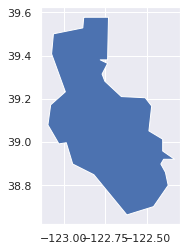

In [ ]:
map_df.plot()

In [ ]:
#Form smaller dataframe with more relevant information
lageo=dfma19[['CDSCode','School', 'coordinates', 'binner','UC-EligiblePercent']]
lageo.head()

,CDSCode,School,coordinates,binner,UC-EligiblePercent
3432,17101731730167,Lloyd Hance Community,POINT (-122.8840484619141 38.99501419067383),0-20%,0.000000
3442,17640141730043,Ed Donaldson Education Center,POINT (-122.8278121948242 38.97796249389648),0-20%,0.000000
3444,17640141730159,Kelseyville Community Day,POINT (-122.8390579223633 38.97980880737305),0-20%,0.000000
3445,17640141734359,Kelseyville High,POINT (-122.8301773071289 38.97248077392578),21-40%,21.739130
3456,17640220132571,Konocti Education Center,POINT (-122.6154708862305 38.93383026123047),21-40%,23.076923


In [ ]:
type(lageo['coordinates'])

pandas.core.series.Series

In [ ]:
#Split dataframe into smaller dataframes according to percentages
lageo20=lageo.loc[lageo['binner'] == '0-20%']
lageo40=lageo.loc[lageo['binner'] == '21-40%']
lageo60=lageo.loc[lageo['binner'] == '41-60%']
lageo80=lageo.loc[lageo['binner'] == '61-80%']
lageo100=lageo.loc[lageo['binner'] == '81-100%']

In [ ]:
#Make mapable
geola20df = gpd.GeoDataFrame(lageo20, geometry='coordinates')
geola40df = gpd.GeoDataFrame(lageo40, geometry='coordinates')
geola60df = gpd.GeoDataFrame(lageo60, geometry='coordinates')
geola80df = gpd.GeoDataFrame(lageo80, geometry='coordinates')
geola100df = gpd.GeoDataFrame(lageo100, geometry='coordinates')

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


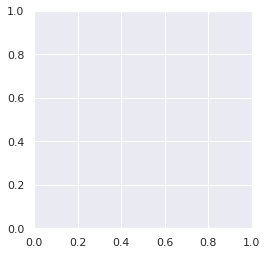

In [ ]:
#Rank 1 schools
geola100df.plot(color='#7700FF')

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


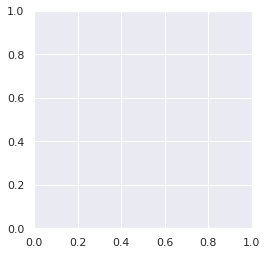

In [ ]:
#Rank 2 schools
geola80df.plot(color='#07FF77')

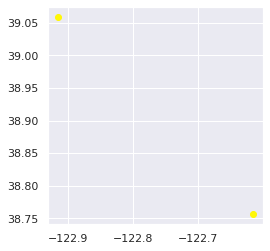

In [ ]:
#Rank 3 schools
geola60df.plot(color='#FFF707')

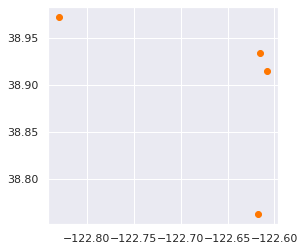

In [ ]:
#Rank 4 schools
geola40df.plot(color='#FF7700')

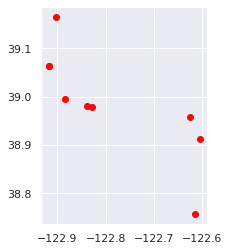

In [ ]:
#Rank 5 schools
geola20df.plot(color='#F70707')

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


Text(0.5, 1.0, 'Lake County Schools by UC-Eligible Grads')

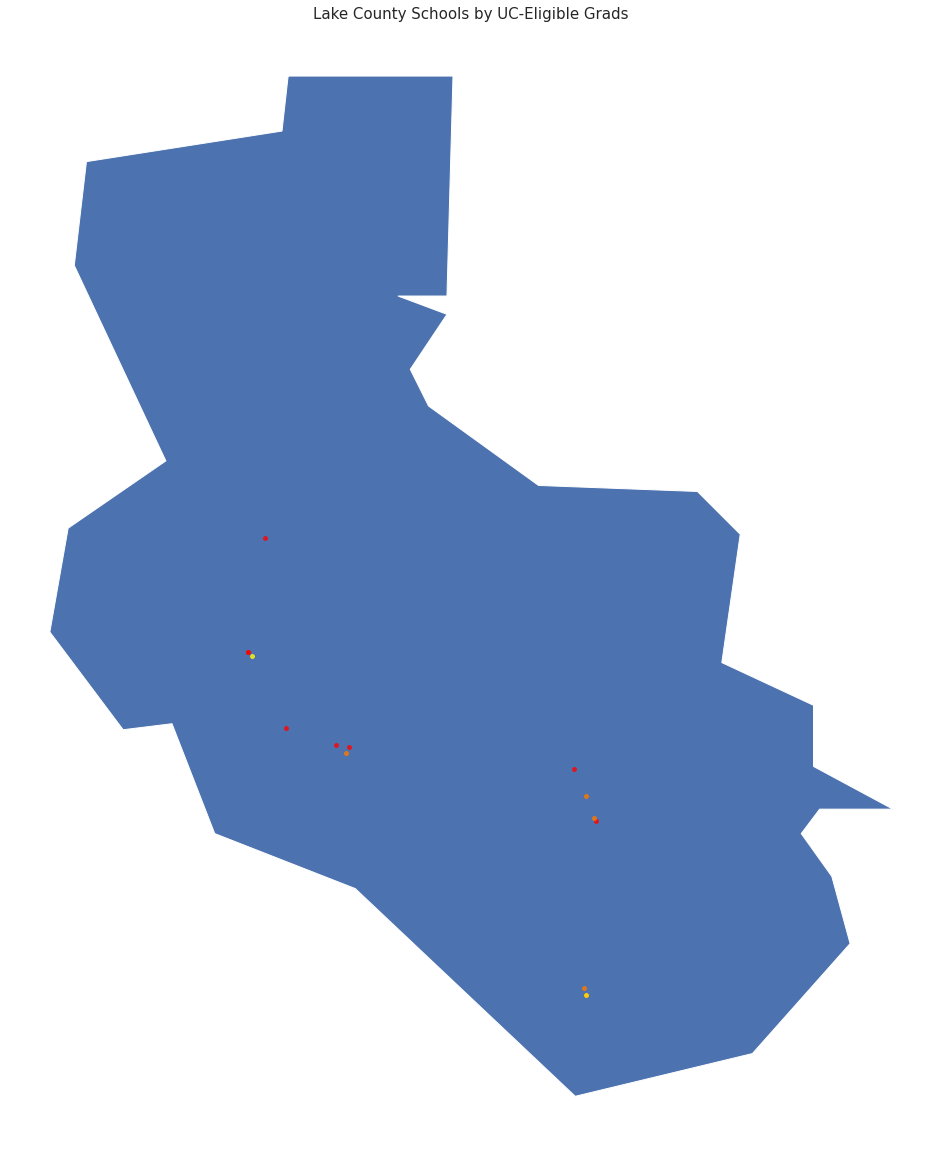

In [ ]:
#Plot schools over map of Lake County color-coded by percentage of UC-eligible students
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geola20df.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geola40df.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geola60df.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geola80df.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geola100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Lake County Schools by UC-Eligible Grads", fontsize=15, fontweight=3)

Money Data Analysis

In [ ]:
#from https://www.cde.ca.gov/ds/fd/ec/currentexpense.asp Current Expense per Average Daily Attendance

mURL="https://www.cde.ca.gov/ds/fd/ec/documents/currentexpense1617.xlsx"
moneydf = pd.read_excel(mURL,skiprows=[0,1,2,3,4,5,6,7]) #first few rows contained description of data, not data itself
moneydf.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type
0,1,61119,Alameda Unified,1.048464e+08,9061.77,11570.193309,Unified
1,1,61127,Albany City Unified,4.381278e+07,3601.47,12165.247807,Unified
2,1,61143,Berkeley Unified,1.421931e+08,9171.43,15503.921472,Unified
3,1,61150,Castro Valley Unified,9.131184e+07,9022.97,10119.931991,Unified
4,1,61168,Emery Unified,1.102028e+07,644.25,17105.601024,Unified


In [ ]:
#Make dataframe of only Lake County school districts
lakemoneydf=moneydf.loc[moneydf['CO'] == 17]
lakemoneydf.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type
229,17,64014,Kelseyville Unified,18888787.12,1568.96,12039.049511,Unified
230,17,64022,Konocti Unified,38964701.53,3026.70,12873.658285,Unified
231,17,64030,Lakeport Unified,15694759.10,1452.48,10805.490678,Unified
232,17,64048,Lucerne Elementary,2869421.17,242.21,11846.831964,Elementary
233,17,64055,Middletown Unified,16690978.75,1376.34,12127.075250,Unified


Text(0.5, 1.0, 'Current Expenses for Lake County')

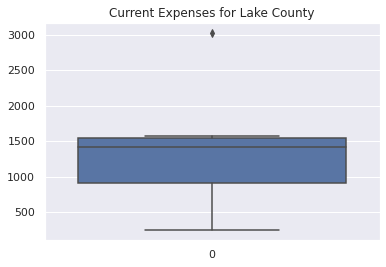

In [ ]:
#Boxplot of Current Expense ADA in LA
temp=[]
for i in lakemoneydf['Current Expense ADA']:
  temp.append(i)
sns.boxplot(data=temp).set_title("Current Expenses for Lake County")

In [ ]:
#Statistics
print("Mean: "+str(statistics.mean(temp)))
print("Median: "+str(statistics.median(temp)))
#print("Mode: "+str(statistics.mode(temp))) No mode
print("Min: "+str(min(temp)))
print("Max: "+str(max(temp)))

Mean: 1402.7183333333332
Median: 1414.4099999999999
Min: 242.21
Max: 3026.7


In [ ]:
#Identify outlier
temp.sort()
print(temp[-1])

3026.7


Scaling (Min-Max)

In [ ]:
minmoney=min(lakemoneydf['Current Expense ADA'])
maxmoney=max(lakemoneydf['Current Expense ADA'])

In [ ]:
minmaxmoney=[]
for value in lakemoneydf['Current Expense ADA']:
  mmm=(value-minmoney)/(maxmoney-minmoney)
  minmaxmoney.append(mmm*100)
print(minmaxmoney)

[47.647863702150126, 100.0, 43.46469191844826, 0.0, 40.73025940118298, 18.22272660343546]


In [ ]:
lakemoneydf['scaled_CAEDA']=minmaxmoney

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
moneybins=[]
for i in minmaxmoney:
  if i<=20:
    moneybins.append("0-20%")
  elif i<=40:
    moneybins.append("21-40%")
  elif i<=60:
    moneybins.append("41-60%")
  elif i<=80:
    moneybins.append("61-80%")
  else:
    moneybins.append("81-100%")
print(moneybins)

['41-60%', '81-100%', '41-60%', '0-20%', '41-60%', '0-20%']


In [ ]:
lakemoneydf['scaled_bins_CAEDA'] = moneybins

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
lakemoneydf.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,scaled_CAEDA,scaled_bins_CAEDA
229,17,64014,Kelseyville Unified,18888787.12,1568.96,12039.049511,Unified,47.647864,41-60%
230,17,64022,Konocti Unified,38964701.53,3026.70,12873.658285,Unified,100.000000,81-100%
231,17,64030,Lakeport Unified,15694759.10,1452.48,10805.490678,Unified,43.464692,41-60%
232,17,64048,Lucerne Elementary,2869421.17,242.21,11846.831964,Elementary,0.000000,0-20%
233,17,64055,Middletown Unified,16690978.75,1376.34,12127.075250,Unified,40.730259,41-60%


In [ ]:
#Form a list that lines up the money rate with the correct CDS Code in the dataframe
cashbin=[]
cashnobin=[]
for k in lageo['CDSCode']:
  g=int(str(k)[2:7])
  t=0
  for h in lakemoneydf['CDS']:
    if g==h:
      i=lakemoneydf[lakemoneydf['CDS']==h].index.item()
      cashbin.append(lakemoneydf['scaled_bins_CAEDA'][i])
      cashnobin.append(lakemoneydf['scaled_CAEDA'][i])
      t=1
  if t==0:
    cashbin.append(None)
    cashnobin.append(None)
print(cashbin)
print(cashnobin)

[None, '41-60%', '41-60%', '41-60%', '81-100%', '81-100%', '81-100%', '81-100%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '0-20%']
[None, 47.647863702150126, 47.647863702150126, 47.647863702150126, 100.0, 100.0, 100.0, 100.0, 43.46469191844826, 43.46469191844826, 43.46469191844826, 40.73025940118298, 40.73025940118298, 40.73025940118298, 18.22272660343546]


In [ ]:
#Add money rates as new columns in map dataframe
lageo['CashBin']=cashbin
lageo['CashPercent']=cashnobin
lageo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
3432,17101731730167,Lloyd Hance Community,POINT (-122.8840484619141 38.99501419067383),0-20%,0.000000,None,NaN
3442,17640141730043,Ed Donaldson Education Center,POINT (-122.8278121948242 38.97796249389648),0-20%,0.000000,41-60%,47.647864
3444,17640141730159,Kelseyville Community Day,POINT (-122.8390579223633 38.97980880737305),0-20%,0.000000,41-60%,47.647864
3445,17640141734359,Kelseyville High,POINT (-122.8301773071289 38.97248077392578),21-40%,21.739130,41-60%,47.647864
3456,17640220132571,Konocti Education Center,POINT (-122.6154708862305 38.93383026123047),21-40%,23.076923,81-100%,100.000000
3457,17640221730027,Carle (William C.) High (Continuation),POINT (-122.6058120727539 38.91189575195312),0-20%,0.000000,81-100%,100.000000
3459,17640221730118,Richard H. Lewis Alternative,POINT (-122.6263732910156 38.95823287963867),0-20%,0.000000,81-100%,100.000000
3461,17640221735000,Lower Lake High,POINT (-122.607780456543 38.91476821899414),21-40%,25.471698,81-100%,100.000000
3472,17640301730019,Natural High (Continuation),POINT (-122.9182662963867 39.06283187866211),0-20%,0.000000,41-60%,43.464692
3473,17640301730142,Lakeport Alternative (Home School),POINT (-122.9182662963867 39.06283187866211),0-20%,0.000000,41-60%,43.464692


In [ ]:
#remove null values
ultrageo = lageo[lageo['CashBin'].notna()]
ultrageo

,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
3442,17640141730043,Ed Donaldson Education Center,POINT (-122.8278121948242 38.97796249389648),0-20%,0.000000,41-60%,47.647864
3444,17640141730159,Kelseyville Community Day,POINT (-122.8390579223633 38.97980880737305),0-20%,0.000000,41-60%,47.647864
3445,17640141734359,Kelseyville High,POINT (-122.8301773071289 38.97248077392578),21-40%,21.739130,41-60%,47.647864
3456,17640220132571,Konocti Education Center,POINT (-122.6154708862305 38.93383026123047),21-40%,23.076923,81-100%,100.000000
3457,17640221730027,Carle (William C.) High (Continuation),POINT (-122.6058120727539 38.91189575195312),0-20%,0.000000,81-100%,100.000000
3459,17640221730118,Richard H. Lewis Alternative,POINT (-122.6263732910156 38.95823287963867),0-20%,0.000000,81-100%,100.000000
3461,17640221735000,Lower Lake High,POINT (-122.607780456543 38.91476821899414),21-40%,25.471698,81-100%,100.000000
3472,17640301730019,Natural High (Continuation),POINT (-122.9182662963867 39.06283187866211),0-20%,0.000000,41-60%,43.464692
3473,17640301730142,Lakeport Alternative (Home School),POINT (-122.9182662963867 39.06283187866211),0-20%,0.000000,41-60%,43.464692
3474,17640301732304,Clear Lake High,POINT (-122.9150314331055 39.05926132202148),41-60%,45.348837,41-60%,43.464692


In [ ]:
#Set each category to its own dataframe by percentage of uc-eligible grads/funding
geouc20=ultrageo.loc[ultrageo['binner'] == '0-20%']
geouc40=ultrageo.loc[ultrageo['binner'] == '21-40%']
geouc60=ultrageo.loc[ultrageo['binner'] == '41-60%']
geouc80=ultrageo.loc[ultrageo['binner'] == '61-80%']
geouc100=ultrageo.loc[ultrageo['binner'] == '81-100%']
geocash20=ultrageo.loc[ultrageo['CashBin'] == '0-20%']
geocash40=ultrageo.loc[ultrageo['CashBin'] == '21-40%']
geocash60=ultrageo.loc[ultrageo['CashBin'] == '41-60%']
geocash80=ultrageo.loc[ultrageo['CashBin'] == '61-80%']
geocash100=ultrageo.loc[ultrageo['CashBin'] == '81-100%']

In [ ]:
#Make previous dataframes mapable
geouc20df = gpd.GeoDataFrame(geouc20, geometry='coordinates')
geouc40df = gpd.GeoDataFrame(geouc40, geometry='coordinates')
geouc60df = gpd.GeoDataFrame(geouc60, geometry='coordinates')
geouc80df = gpd.GeoDataFrame(geouc80, geometry='coordinates')
geouc100df = gpd.GeoDataFrame(geouc100, geometry='coordinates')
geocash20df = gpd.GeoDataFrame(geocash20, geometry='coordinates')
geocash40df = gpd.GeoDataFrame(geocash40, geometry='coordinates')
geocash60df = gpd.GeoDataFrame(geocash60, geometry='coordinates')
geocash80df = gpd.GeoDataFrame(geocash80, geometry='coordinates')
geocash100df = gpd.GeoDataFrame(geocash100, geometry='coordinates')

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


Text(0.5, 1.0, 'Lake County Schools by UC-Eligible Grads Over Funding')

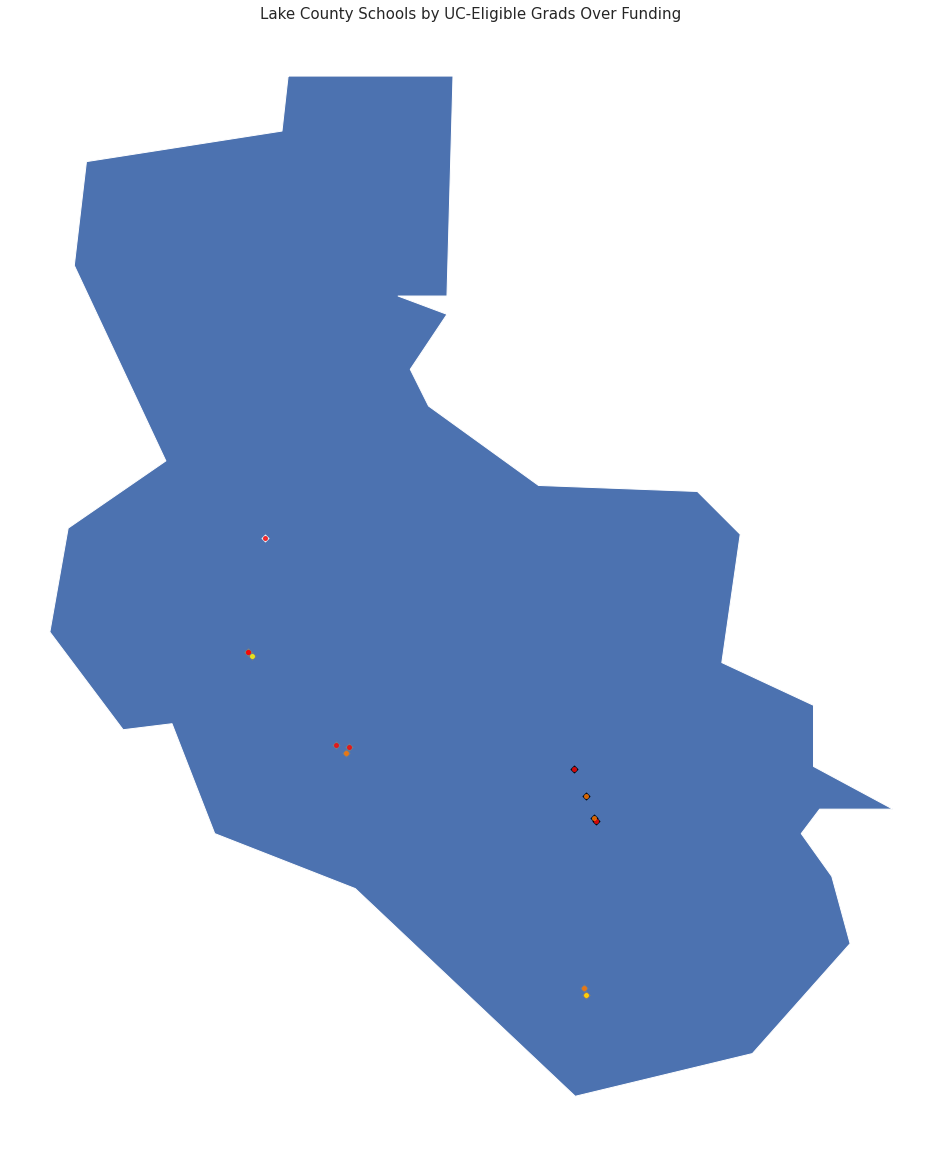

In [ ]:
#Map everything
#red-purple is lowest-highest performing schools
#white-black is lowest-highest funded schools
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geocash20df.plot(ax=basemap, color='#FCFCFC', marker="D", markersize=25,alpha=0.8)
geocash40df.plot(ax=basemap, color='#BDBDBD', marker="D", markersize=25,alpha=0.8)
geocash60df.plot(ax=basemap, color='#7E7E7E', marker="D", markersize=25,alpha=0.8)
geocash80df.plot(ax=basemap, color='#3F3F3F', marker="D", markersize=25,alpha=0.8)
geocash100df.plot(ax=basemap, color='#000000', marker="D", markersize=25,alpha=0.8)
geouc20df.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geouc40df.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geouc60df.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geouc80df.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geouc100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Lake County Schools by UC-Eligible Grads Over Funding", fontsize=15, fontweight=3)

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


(-123.13409, -122.30271, 38.61957, 39.62563)

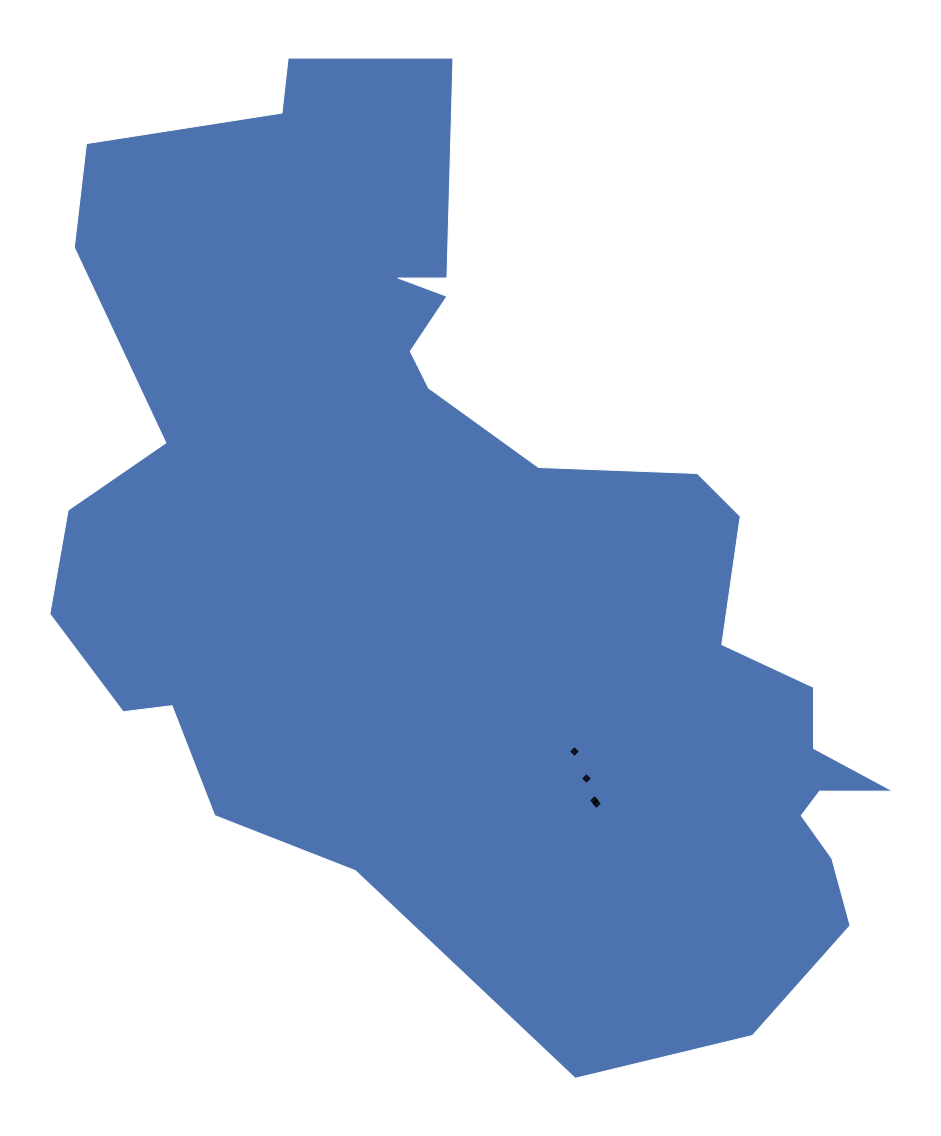

In [ ]:
#Map of only the highest performing/funded schools
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)

geocash100df.plot(ax=basemap, color='#000000', marker="D", markersize=25,alpha=0.8)
geouc100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')

In [ ]:
ultrageo = lageo[lageo['UC-EligiblePercent'].notna()]
ultrageo = lageo[lageo['CashPercent'].notna()]
ultrageo

,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
3442,17640141730043,Ed Donaldson Education Center,POINT (-122.8278121948242 38.97796249389648),0-20%,0.000000,41-60%,47.647864
3444,17640141730159,Kelseyville Community Day,POINT (-122.8390579223633 38.97980880737305),0-20%,0.000000,41-60%,47.647864
3445,17640141734359,Kelseyville High,POINT (-122.8301773071289 38.97248077392578),21-40%,21.739130,41-60%,47.647864
3456,17640220132571,Konocti Education Center,POINT (-122.6154708862305 38.93383026123047),21-40%,23.076923,81-100%,100.000000
3457,17640221730027,Carle (William C.) High (Continuation),POINT (-122.6058120727539 38.91189575195312),0-20%,0.000000,81-100%,100.000000
3459,17640221730118,Richard H. Lewis Alternative,POINT (-122.6263732910156 38.95823287963867),0-20%,0.000000,81-100%,100.000000
3461,17640221735000,Lower Lake High,POINT (-122.607780456543 38.91476821899414),21-40%,25.471698,81-100%,100.000000
3472,17640301730019,Natural High (Continuation),POINT (-122.9182662963867 39.06283187866211),0-20%,0.000000,41-60%,43.464692
3473,17640301730142,Lakeport Alternative (Home School),POINT (-122.9182662963867 39.06283187866211),0-20%,0.000000,41-60%,43.464692
3474,17640301732304,Clear Lake High,POINT (-122.9150314331055 39.05926132202148),41-60%,45.348837,41-60%,43.464692


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


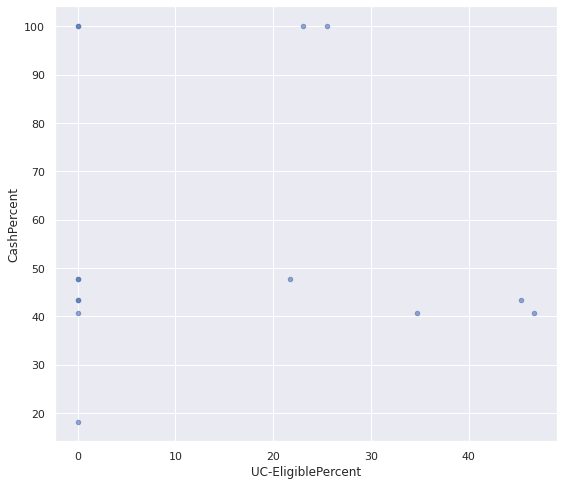

In [ ]:
ultrageo.plot.scatter(x='UC-EligiblePercent', y='CashPercent',  figsize=(9,8), alpha=0.6)

#Santa Clara

In [ ]:
#Make a dataframe with only Santa Clara County schools (Santa Clara county code is 43; the first two digits of the CDS Code)
df=ogdf.loc[ogdf['CDS_CODE'] >= 43000000000000]
df=df.loc[df['CDS_CODE'] < 44000000000000]

In [ ]:
print(df)

             CDS_CODE  ETHNIC GENDER  GRADS  UC_GRADS  YEAR
18022  43104390000001       6      M      1         0  1617
18023  43104390000001       7      M      1         0  1617
18024  43104390113431       6      F      5         5  1617
18025  43104390113431       7      M     11        11  1617
18026  43104390113431       6      M      4         4  1617
...               ...     ...    ...    ...       ...   ...
18814  43733874334470       4      F     75        46  1617
18815  43733874334470       1      M      1         0  1617
18816  43733874334470       7      M     21        10  1617
18817  43733874334470       4      M     79        35  1617
18818  43733874334470       3      F      3         1  1617

[797 rows x 6 columns]


In [ ]:
#print the last 3 records
df.tail(3)

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
18816,43733874334470,7,M,21,10,1617
18817,43733874334470,4,M,79,35,1617
18818,43733874334470,3,F,3,1,1617


In [ ]:
#make a list of schools and lists of the percentage of students who graduated UC-eligible
sch=df['CDS_CODE'][18022]
code=[]
rate=[]
rate1=[]
grad=0
ucgrad=0
for i in range(18022,18818):
  if df['CDS_CODE'][i]==sch:
    grad+=df['GRADS'][i]
    ucgrad+=df['UC_GRADS'][i]
  else:
    code.append(sch)
    if grad==0:
      rate.append(0)
      rate1.append(0)
    else:
      rate.append(100*ucgrad/grad)
      rate1.append(100*ucgrad/grad)
    sch=df['CDS_CODE'][i]
    grad=df['GRADS'][i]
    ucgrad=df['UC_GRADS'][i]
  if i==18818:
    code.append(sch)
    rate.append(100*ucgrad/grad)
    rate1.append(100*ucgrad/grad)

In [ ]:
#cds codes for each high school in Santa Clara County
print(code)

[43104390000001, 43104390113431, 43104390123257, 43104390123794, 43104390135087, 43104394330254, 43104394330320, 43694014330239, 43694014330759, 43694014330866, 43694014331955, 43694014336137, 43694014338505, 43694270000001, 43694270107151, 43694270116889, 43694270123745, 43694270125427, 43694270125617, 43694274330015, 43694274330023, 43694274330031, 43694274330312, 43694274330353, 43694274330361, 43694274330668, 43694274330676, 43694274330692, 43694274330726, 43694274332318, 43694274332995, 43694274333639, 43694274334900, 43694274335204, 43694274335428, 43694274335907, 43694274337903, 43694684331799, 43694684332474, 43694684333316, 43694684334421, 43694684334462, 43694840114496, 43694840118380, 43694844332839, 43694844334850, 43695340000001, 43695344334371, 43695344337762, 43695830000001, 43695830102368, 43695834333951, 43695834334488, 43696090000001, 43696094334116, 43696094334728, 43696094334736, 43696410000001, 43696414332904, 43696414335782, 43696660000001, 43696664330080, 4369666

In [ ]:
#percent of UC-eligible graduates
print(rate)

[0.0, 100.0, 75.0, 96.15384615384616, 0.0, 0.0, 0.0, 70.57220708446866, 21.93548387096774, 60.19417475728155, 48.29059829059829, 56.115107913669064, 51.24223602484472, 0.0, 0.0, 100.0, 94.25287356321839, 30.0, 100.0, 37.05722070844686, 53.441295546558706, 44.79495268138801, 0.0, 0.0, 0.0, 57.57575757575758, 0.0, 63.608562691131496, 0.0, 0.0, 32.590529247910865, 30.434782608695652, 40.0, 35.714285714285715, 36.29893238434164, 57.61316872427984, 52.45283018867924, 78.38345864661655, 51.84331797235023, 76.73992673992674, 90.78651685393258, 92.12007504690432, 84.0, 50.812064965197216, 32.10702341137124, 0.0, 0.0, 76.80851063829788, 94.3620178041543, 0.0, 50.64102564102564, 52.888888888888886, 0.0, 0.0, 73.4375, 72.96037296037296, 0.0, 0.0, 89.1832229580574, 89.08685968819599, 0.0, 45.2991452991453, 0.0, 71.64179104477611, 8.333333333333334, 0.0, 75.29691211401425, 51.95402298850575, 64.04199475065617, 48.333333333333336, 48.0719794344473, 41.78743961352657, 0.0, 0.0, 52.94117647058823, 0.0

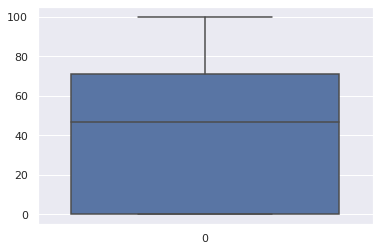

In [ ]:
#boxplot of the UC-eligible gradute rate
sns.boxplot(data=rate)

In [ ]:
#statistics
import statistics
print("Mean: "+str(statistics.mean(rate)))
print("Median: "+str(statistics.median(rate)))
print("Mode: "+str(statistics.mode(rate)))
print("Min: "+str(min(rate)))
print("Max: "+str(max(rate)))

Mean: 40.91053626747353
Median: 46.685562366796304
Mode: 0.0
Min: 0.0
Max: 100.0


In [ ]:
binrate1=[]
rate1.sort()
for i in rate1:
  if i<=20:
    binrate1.append("0-20%")
  elif i<=40:
    binrate1.append("21-40%")
  elif i<=60:
    binrate1.append("41-60%")
  elif i<=80:
    binrate1.append("61-80%")
  else:
    binrate1.append("81-100%")
print(binrate1)

['0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%']


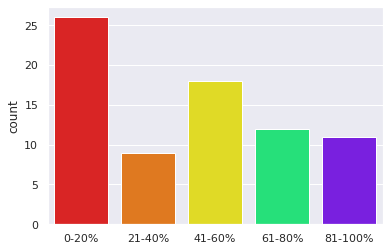

In [ ]:
#number of schools that fall into each percent range of UC-eligible graduates
import seaborn as sns

sns.set_theme(style="darkgrid")

gradecolor=['#F70707','#FF7700','#FFF707','#07FF77','#7700FF']

ax = sns.countplot(x=binrate1, palette=gradecolor)

In [ ]:
binrate=[]
for i in rate:
  if i<=20:
    binrate.append("0-20%")
  elif i<=40:
    binrate.append("21-40%")
  elif i<=60:
    binrate.append("41-60%")
  elif i<=80:
    binrate.append("61-80%")
  else:
    binrate.append("81-100%")
print(binrate)

['0-20%', '81-100%', '61-80%', '81-100%', '0-20%', '0-20%', '0-20%', '61-80%', '21-40%', '61-80%', '41-60%', '41-60%', '41-60%', '0-20%', '0-20%', '81-100%', '81-100%', '21-40%', '81-100%', '21-40%', '41-60%', '41-60%', '0-20%', '0-20%', '0-20%', '41-60%', '0-20%', '61-80%', '0-20%', '0-20%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '41-60%', '41-60%', '61-80%', '41-60%', '61-80%', '81-100%', '81-100%', '81-100%', '41-60%', '21-40%', '0-20%', '0-20%', '61-80%', '81-100%', '0-20%', '41-60%', '41-60%', '0-20%', '0-20%', '61-80%', '61-80%', '0-20%', '0-20%', '81-100%', '81-100%', '0-20%', '41-60%', '0-20%', '61-80%', '0-20%', '0-20%', '61-80%', '41-60%', '61-80%', '41-60%', '41-60%', '41-60%', '0-20%', '0-20%', '41-60%', '0-20%']


In [ ]:
#Make sure to only include schools that are active and have geographic coordinates
dfma=dfm[dfm.StatusType == 'Active']
dfma19=dfma[dfma.County=='Santa Clara']
dfma19 = dfma19.loc[(dfma19['Latitude'].notnull()) & dfma19['Longitude'].notnull()]

dfma19.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate
14770,43104390000000,0691035,No Data,Active,Santa Clara,Santa Clara County Office of Education,No Data,1290 Ridder Park Drive,1290 Ridder Park Dr.,San Jose,95131-2304,CA,1290 Ridder Park Drive,1290 Ridder Park Dr.,San Jose,95131-2304,CA,(408) 453-6500,No Data,No Data,maryann_dewan@sccoe.org,www.sccoe.org,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,37.383703,-121.90134,Mary Ann,Dewan Ph.D.,maryann_dewan@sccoe.org,08/20/2019
14773,43104390106534,0691035,11442,Active,Santa Clara,Santa Clara County Office of Education,Bullis Charter,102 West Portola Avenue,102 West Portola Ave.,Los Altos,94022-1210,CA,102 West Portola Avenue,102 West Portola Ave.,Los Altos,94022-1210,CA,(650) 947-4100,No Data,(650) 947-4989,misrael@bullischarterschool.com,www.bullischarterschool.com,08/25/2004,No Data,Y,0615,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-8,K-8,N,N,N,0602415,37.396836,-122.11646,Maureen,Israel,misrael@bullischarterschool.com,08/28/2020
14777,43104390111880,0691035,11792,Active,Santa Clara,Santa Clara County Office of Education,Discovery Charter,4021 Teale Avenue,4021 Teale Ave.,San Jose,95117-3433,CA,4021 Teale Avenue,4021 Teale Ave.,San Jose,95117-3433,CA,(408) 243-9800,No Data,(408) 243-9812,ksalle@discoveryk8.org,www.discoveryk8.org,09/05/2006,No Data,Y,0767,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-8,K-8,N,N,Y,0601591,37.302745,-121.97364,Debby,Perry,dperry@discoveryk8.org,08/13/2020


In [ ]:
#Make sure the longitude and latitude are float types
dfma19=dfma19.loc[dfma19['Longitude']!="No Data"]
dfma19["Longitude"] = pd.to_numeric(dfma19["Longitude"], downcast="float")
dfma19["Latitude"] = pd.to_numeric(dfma19["Latitude"], downcast="float")

In [ ]:
#Create a new column combining longitude and latitude to make it geo-conversion friendly
dfma19['coordinates'] = list(dfma19[['Longitude', 'Latitude']].values)
dfma19.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates
14770,43104390000000,0691035,No Data,Active,Santa Clara,Santa Clara County Office of Education,No Data,1290 Ridder Park Drive,1290 Ridder Park Dr.,San Jose,95131-2304,CA,1290 Ridder Park Drive,1290 Ridder Park Dr.,San Jose,95131-2304,CA,(408) 453-6500,No Data,No Data,maryann_dewan@sccoe.org,www.sccoe.org,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,37.383701,-121.901337,Mary Ann,Dewan Ph.D.,maryann_dewan@sccoe.org,08/20/2019,"[-121.90134, 37.3837]"
14773,43104390106534,0691035,11442,Active,Santa Clara,Santa Clara County Office of Education,Bullis Charter,102 West Portola Avenue,102 West Portola Ave.,Los Altos,94022-1210,CA,102 West Portola Avenue,102 West Portola Ave.,Los Altos,94022-1210,CA,(650) 947-4100,No Data,(650) 947-4989,misrael@bullischarterschool.com,www.bullischarterschool.com,08/25/2004,No Data,Y,0615,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-8,K-8,N,N,N,0602415,37.396835,-122.116463,Maureen,Israel,misrael@bullischarterschool.com,08/28/2020,"[-122.11646, 37.396835]"
14777,43104390111880,0691035,11792,Active,Santa Clara,Santa Clara County Office of Education,Discovery Charter,4021 Teale Avenue,4021 Teale Ave.,San Jose,95117-3433,CA,4021 Teale Avenue,4021 Teale Ave.,San Jose,95117-3433,CA,(408) 243-9800,No Data,(408) 243-9812,ksalle@discoveryk8.org,www.discoveryk8.org,09/05/2006,No Data,Y,0767,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-8,K-8,N,N,Y,0601591,37.302746,-121.973640,Debby,Perry,dperry@discoveryk8.org,08/13/2020,"[-121.97364, 37.302746]"


In [ ]:
#Making coordinates into geo-readable points
dfma19['coordinates'] = dfma19['coordinates'].apply(Point)

In [ ]:
dfma19.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates
14770,43104390000000,0691035,No Data,Active,Santa Clara,Santa Clara County Office of Education,No Data,1290 Ridder Park Drive,1290 Ridder Park Dr.,San Jose,95131-2304,CA,1290 Ridder Park Drive,1290 Ridder Park Dr.,San Jose,95131-2304,CA,(408) 453-6500,No Data,No Data,maryann_dewan@sccoe.org,www.sccoe.org,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,37.383701,-121.901337,Mary Ann,Dewan Ph.D.,maryann_dewan@sccoe.org,08/20/2019,POINT (-121.9013366699219 37.38370132446289)
14773,43104390106534,0691035,11442,Active,Santa Clara,Santa Clara County Office of Education,Bullis Charter,102 West Portola Avenue,102 West Portola Ave.,Los Altos,94022-1210,CA,102 West Portola Avenue,102 West Portola Ave.,Los Altos,94022-1210,CA,(650) 947-4100,No Data,(650) 947-4989,misrael@bullischarterschool.com,www.bullischarterschool.com,08/25/2004,No Data,Y,0615,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-8,K-8,N,N,N,0602415,37.396835,-122.116463,Maureen,Israel,misrael@bullischarterschool.com,08/28/2020,POINT (-122.1164627075195 37.39683532714844)
14777,43104390111880,0691035,11792,Active,Santa Clara,Santa Clara County Office of Education,Discovery Charter,4021 Teale Avenue,4021 Teale Ave.,San Jose,95117-3433,CA,4021 Teale Avenue,4021 Teale Ave.,San Jose,95117-3433,CA,(408) 243-9800,No Data,(408) 243-9812,ksalle@discoveryk8.org,www.discoveryk8.org,09/05/2006,No Data,Y,0767,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-8,K-8,N,N,Y,0601591,37.302746,-121.973640,Debby,Perry,dperry@discoveryk8.org,08/13/2020,POINT (-121.9736404418945 37.3027458190918)


In [ ]:
#Form a list that lines up the percentage of UC-eligible graduates with the correct CDS Code in the dataframe
pointer=[]
nonbin=[]
for k in dfma19['CDSCode']:
  if k in code:
    i=code.index(k)
    pointer.append(binrate[i])
    nonbin.append(rate[i])
  else:
    pointer.append(None)
    nonbin.append(None)
print(pointer)
print(nonbin)

[None, None, None, '81-100%', None, None, None, None, None, '61-80%', None, '81-100%', None, None, None, None, None, None, None, None, None, None, '0-20%', '0-20%', '0-20%', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, '61-80%', None, '21-40%', '61-80%', '41-60%', '41-60%', '41-60%', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, '0-20%', '81-100%', '21-40%', '81-100%', None, None, None, '21-40%', '41-60%', '41-60%', None, '0-20%', '0-20%', '0-20%', None, '41-60%', '0-20%', '61-80%', '0-20%', '0-20%', '21-40%', '21-40%', '21-40%

In [ ]:
#Create a new column with the list of lined up UC-eligible graduate percentages
dfma19['binner']=pointer
dfma19['UC-EligiblePercent']=nonbin
dfma19.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates,binner,UC-EligiblePercent
14770,43104390000000,0691035,No Data,Active,Santa Clara,Santa Clara County Office of Education,No Data,1290 Ridder Park Drive,1290 Ridder Park Dr.,San Jose,95131-2304,CA,1290 Ridder Park Drive,1290 Ridder Park Dr.,San Jose,95131-2304,CA,(408) 453-6500,No Data,No Data,maryann_dewan@sccoe.org,www.sccoe.org,No Data,No Data,No Data,No Data,No Data,0,County Office of Education (COE),No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,37.383701,-121.901337,Mary Ann,Dewan Ph.D.,maryann_dewan@sccoe.org,08/20/2019,POINT (-121.9013366699219 37.38370132446289),None,NaN
14773,43104390106534,0691035,11442,Active,Santa Clara,Santa Clara County Office of Education,Bullis Charter,102 West Portola Avenue,102 West Portola Ave.,Los Altos,94022-1210,CA,102 West Portola Avenue,102 West Portola Ave.,Los Altos,94022-1210,CA,(650) 947-4100,No Data,(650) 947-4989,misrael@bullischarterschool.com,www.bullischarterschool.com,08/25/2004,No Data,Y,0615,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-8,K-8,N,N,N,0602415,37.396835,-122.116463,Maureen,Israel,misrael@bullischarterschool.com,08/28/2020,POINT (-122.1164627075195 37.39683532714844),None,NaN
14777,43104390111880,0691035,11792,Active,Santa Clara,Santa Clara County Office of Education,Discovery Charter,4021 Teale Avenue,4021 Teale Ave.,San Jose,95117-3433,CA,4021 Teale Avenue,4021 Teale Ave.,San Jose,95117-3433,CA,(408) 243-9800,No Data,(408) 243-9812,ksalle@discoveryk8.org,www.discoveryk8.org,09/05/2006,No Data,Y,0767,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-8,K-8,N,N,Y,0601591,37.302746,-121.973640,Debby,Perry,dperry@discoveryk8.org,08/13/2020,POINT (-121.9736404418945 37.3027458190918),None,NaN
14778,43104390113431,0691035,12016,Active,Santa Clara,Santa Clara County Office of Education,University Preparatory Academy Charter,2315 Canoas Garden Avenue,2315 Canoas Garden Ave.,San Jose,95125-2005,CA,2315 Canoas Garden Avenue,2315 Canoas Garden Ave.,San Jose,95125-2005,CA,(408) 723-1839,No Data,(408) 440-3284,ordazdan@gmail.com,www.upasv.org,08/20/2007,No Data,Y,0844,Directly funded,0,County Office of Education (COE),66,High Schools (Public),TRAD,Traditional,HS,High School,7-12,7-12,N,N,N,0602233,37.292255,-121.873917,David,Porter,dporter@upatoday.com,08/13/2020,POINT (-121.8739166259766 37.29225540161133),81-100%,100.0
14779,43104390113704,0691035,11864,Active,Santa Clara,Santa Clara County Office of Education,Rocketship Mateo Sheedy Elementary,788 Locust Street,788 Locust St.,San Jose,95110-2954,CA,"350 Twin Dolphin Drive, Suite 109","350 Twin Dolphin Dr., Ste. 109",Redwood City,94065,CA,(877) 806-0920,No Data,(408) 286-3331,info_rms@rsed.org,https://www.rocketshipschools.org/schools/mate...,08/01/2007,No Data,Y,0850,Directly funded,0,County Office of Education (COE),60,Elementary Schools (Public),TRAD,Traditional,ELEM,Elementary,K-5,K-5,N,N,N,0601782,37.321396,-121.886673,Cheye,Calvo,superintendent@rsed.org,11/01/2019,POINT (-121.8866729736328 37.32139587402344),None,NaN


In [ ]:
#Remove rows with null values in the UC-eligible percentage column from dataframe (gets rid of elementary and middle schools)
dfma19 = dfma19[dfma19['binner'].notna()]
dfma19.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,State,MailStreet,MailStrAbr,MailCity,MailZip,MailState,Phone,Ext,FaxNumber,Email,WebSite,OpenDate,ClosedDate,Charter,CharterNum,FundingType,DOC,DOCType,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,GSoffered,GSserved,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates,binner,UC-EligiblePercent
14778,43104390113431,0691035,12016,Active,Santa Clara,Santa Clara County Office of Education,University Preparatory Academy Charter,2315 Canoas Garden Avenue,2315 Canoas Garden Ave.,San Jose,95125-2005,CA,2315 Canoas Garden Avenue,2315 Canoas Garden Ave.,San Jose,95125-2005,CA,(408) 723-1839,No Data,(408) 440-3284,ordazdan@gmail.com,www.upasv.org,08/20/2007,No Data,Y,0844,Directly funded,0,County Office of Education (COE),66,High Schools (Public),TRAD,Traditional,HS,High School,7-12,7-12,N,N,N,0602233,37.292255,-121.873917,David,Porter,dporter@upatoday.com,08/13/2020,POINT (-121.8739166259766 37.29225540161133),81-100%,100.000000
14787,43104390123257,0691035,12827,Active,Santa Clara,Santa Clara County Office of Education,Downtown College Prep - Alum Rock,1776 Educational Park Drive,1776 Educational Park Dr.,San Jose,95122-1703,CA,1400 Parkmoor Avenue Suite 206,1400 Parkmoor Ave. Ste. 206,San Jose,95126,CA,(408) 271-1730,No Data,(408) 271-1734,rschriver@dcp.org,www.dcp.org,08/24/2011,No Data,Y,1268,Directly funded,0,County Office of Education (COE),65,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,6-12,6-12,N,N,N,0601656,37.366749,-121.857910,Leticia,Villa,lvilla@dcp.org,08/13/2020,POINT (-121.85791015625 37.36674880981445),61-80%,75.000000
14789,43104390123794,0691035,12625,Active,Santa Clara,Santa Clara County Office of Education,Summit Public School: Tahoma,285 Blossom Hill Road,285 Blossom Hill Rd.,San Jose,95123-2048,CA,285 Blossom Hill Road,285 Blossom Hill Rd.,San Jose,95123-2048,CA,(408) 729-1981,No Data,(408) 729-3853,tahoma@summitps.org,www.summitps.org,08/22/2011,No Data,Y,1282,Directly funded,0,County Office of Education (COE),66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,N,N,N,0602222,37.252796,-121.819572,Jonathan,Stewart,jstewart@summitps.org,08/28/2020,POINT (-121.8195724487305 37.2527961730957),81-100%,96.153846
14805,43104390135087,0691035,14054,Active,Santa Clara,Santa Clara County Office of Education,Opportunity Youth Academy,1290 Ridder Park Drive,1290 Ridder Park Dr.,San Jose,95131-2304,CA,1290 Ridder Park Drive,1290 Ridder Park Dr.,San Jose,95131-2304,CA,(844) 692-4888,No Data,(408) 573-3234,oya@sccoe.org,www.sccoe.org/depts/students/oya/pages/default...,09/01/2016,No Data,Y,1840,Locally funded,0,County Office of Education (COE),66,High Schools (Public),TRAD,Traditional,HS,High School,9-12,9-12,C,N,Y,No Data,37.383907,-121.900230,Phil,Morales,phil_morales@sccoe.org,08/13/2020,POINT (-121.9002304077148 37.38390731811523),0-20%,0.000000
14814,43104394330254,0691035,09045,Active,Santa Clara,Santa Clara County Office of Education,Santa Clara County Court,"1290 Ridder Park Drive, MC213","1290 Ridder Park Dr., MC213",San Jose,95131-2304,CA,"1290 Ridder Park Drive, MC213","1290 Ridder Park Dr., MC213",San Jose,95131-2304,CA,(408) 573-3070,No Data,(408) 971-1762,No Data,www.sccoe.org,07/01/1980,No Data,N,No Data,No Data,0,County Office of Education (COE),14,Juvenile Court Schools,JUV,Juvenile Court School,HS,High School,K-12,8-12,C,N,Y,No Data,37.383701,-121.901337,David,Putney,david_putney@sccoe.org,08/13/2020,POINT (-121.9013366699219 37.38370132446289),0-20%,0.000000


In [ ]:
#Taken from https://github.com/johan/world.geo.json/blob/master/countries/USA/CA/Lake.geo.json
map_df = gpd.read_file("https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/CA/Santa%20Clara.geo.json")
map_df.head()

,kind,name,state,geometry
0,county,Santa Clara,CA,"MULTIPOLYGON (((-121.85310 37.48220, -121.4752..."


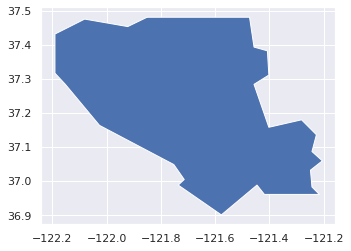

In [ ]:
map_df.plot()

In [ ]:
#Form smaller dataframe with more relevant information
lageo=dfma19[['CDSCode','School', 'coordinates', 'binner','UC-EligiblePercent']]
lageo.head()

,CDSCode,School,coordinates,binner,UC-EligiblePercent
14778,43104390113431,University Preparatory Academy Charter,POINT (-121.8739166259766 37.29225540161133),81-100%,100.000000
14787,43104390123257,Downtown College Prep - Alum Rock,POINT (-121.85791015625 37.36674880981445),61-80%,75.000000
14789,43104390123794,Summit Public School: Tahoma,POINT (-121.8195724487305 37.2527961730957),81-100%,96.153846
14805,43104390135087,Opportunity Youth Academy,POINT (-121.9002304077148 37.38390731811523),0-20%,0.000000
14814,43104394330254,Santa Clara County Court,POINT (-121.9013366699219 37.38370132446289),0-20%,0.000000


In [ ]:
type(lageo['coordinates'])

pandas.core.series.Series

In [ ]:
#Split dataframe into smaller dataframes according to percentages
lageo20=lageo.loc[lageo['binner'] == '0-20%']
lageo40=lageo.loc[lageo['binner'] == '21-40%']
lageo60=lageo.loc[lageo['binner'] == '41-60%']
lageo80=lageo.loc[lageo['binner'] == '61-80%']
lageo100=lageo.loc[lageo['binner'] == '81-100%']

In [ ]:
#Make mapable
geola20df = gpd.GeoDataFrame(lageo20, geometry='coordinates')
geola40df = gpd.GeoDataFrame(lageo40, geometry='coordinates')
geola60df = gpd.GeoDataFrame(lageo60, geometry='coordinates')
geola80df = gpd.GeoDataFrame(lageo80, geometry='coordinates')
geola100df = gpd.GeoDataFrame(lageo100, geometry='coordinates')

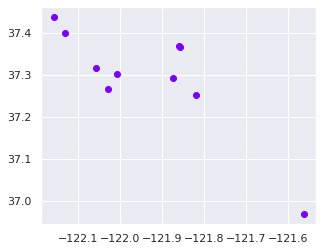

In [ ]:
#Rank 1 schools
geola100df.plot(color='#7700FF')

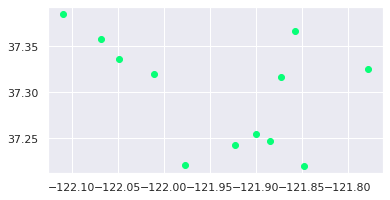

In [ ]:
#Rank 2 schools
geola80df.plot(color='#07FF77')

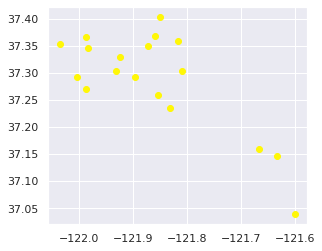

In [ ]:
#Rank 3 schools
geola60df.plot(color='#FFF707')

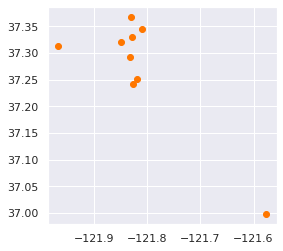

In [ ]:
#Rank 4 schools
geola40df.plot(color='#FF7700')

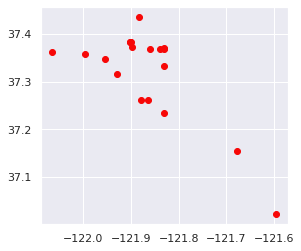

In [ ]:
#Rank 5 schools
geola20df.plot(color='#F70707')

Text(0.5, 1.0, 'Santa Clara Schools by UC-Eligible Grads')

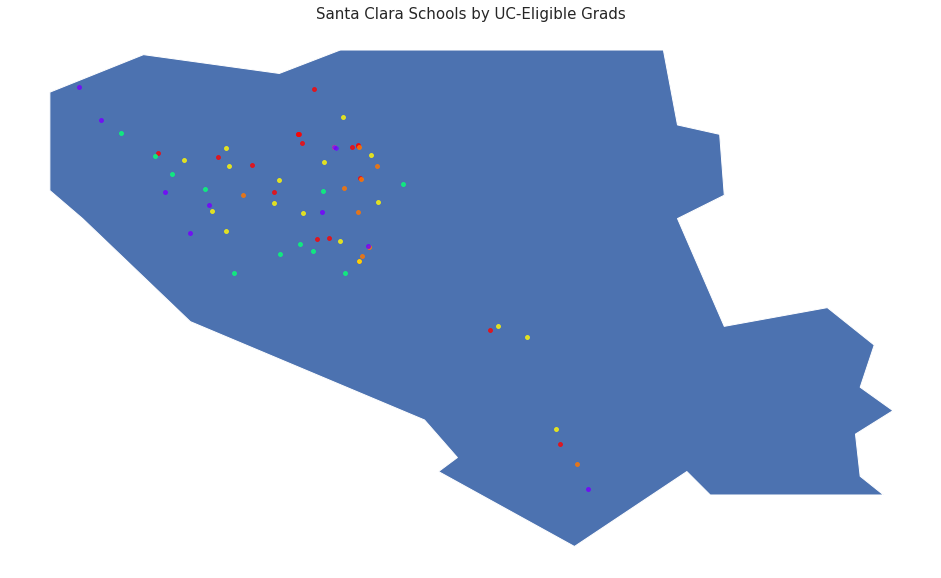

In [ ]:
#Plot schools over map of Santa Clara color-coded by percentage of UC-eligible students
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geola20df.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geola40df.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geola60df.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geola80df.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geola100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Santa Clara Schools by UC-Eligible Grads", fontsize=15, fontweight=3)

Money Data Analysis

In [ ]:
#Make dataframe of only SC County school districts
SCmoneydf=moneydf.loc[moneydf['CO'] == 43]
SCmoneydf.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type
662,43,69369,Alum Rock Union Elementary,1.347013e+08,10115.59,13316.204237,Elementary
663,43,69377,Berryessa Union Elementary,6.971195e+07,7096.95,9822.804214,Elementary
664,43,69385,Cambrian,3.472331e+07,3428.85,10126.809919,Elementary
665,43,69393,Campbell Union,8.327326e+07,7188.21,11584.700537,Elementary
666,43,69401,Campbell Union High,9.288198e+07,7337.48,12658.566143,High


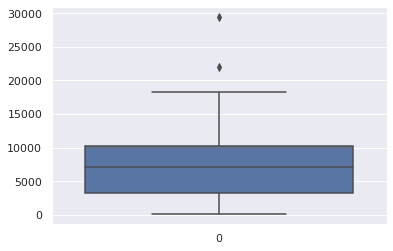

In [ ]:
#Boxplot of Current Expense ADA in Santa Clara
temp=[]
for i in SCmoneydf['Current Expense ADA']:
  temp.append(i)
sns.boxplot(data=temp)

In [ ]:
#Statistics
print("Mean: "+str(statistics.mean(temp)))
print("Median: "+str(statistics.median(temp)))
#print("Mode: "+str(statistics.mode(temp))) No mode
print("Min: "+str(min(temp)))
print("Max: "+str(max(temp)))

Mean: 7806.40064516129
Median: 7096.95
Min: 82.45
Max: 29471.27


In [ ]:
#Identify outliers
temp.sort()
print(temp[-1])
print(temp[-2])

29471.27
21942.58


Scaling (Min-Max)

In [ ]:
minmoney=min(SCmoneydf['Current Expense ADA'])
maxmoney=max(SCmoneydf['Current Expense ADA'])

In [ ]:
minmaxmoney=[]
for value in SCmoneydf['Current Expense ADA']:
  mmm=(value-minmoney)/(maxmoney-minmoney)
  minmaxmoney.append(mmm*100)
print(minmaxmoney)

[34.13930875754794, 23.86791984162685, 11.386642947896513, 24.178446089363234, 24.686360323415503, 61.81667042092877, 74.38246925191281, 38.67790540756655, 25.90815146712253, 35.322479772920445, 36.61827865154164, 0.0, 1.3757612588732722, 14.630223329824062, 10.453294824358379, 10.504811013167593, 1.436600720954431, 15.463193146237241, 26.987065149264243, 16.533974484174596, 13.127338899622373, 7.5126527706794635, 33.73868021921261, 2.6800667736914923, 39.88948858783714, 100.0, 49.56480049215994, 6.084490632832485, 20.97767110077914, 18.803408915363054, 33.99183771243622]


In [ ]:
SCmoneydf['scaled_CAEDA']=minmaxmoney

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
moneybins=[]
for i in minmaxmoney:
  if i<=20:
    moneybins.append("0-20%")
  elif i<=40:
    moneybins.append("21-40%")
  elif i<=60:
    moneybins.append("41-60%")
  elif i<=80:
    moneybins.append("61-80%")
  else:
    moneybins.append("81-100%")
print(moneybins)

['21-40%', '21-40%', '0-20%', '21-40%', '21-40%', '61-80%', '61-80%', '21-40%', '21-40%', '21-40%', '21-40%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '21-40%', '0-20%', '0-20%', '0-20%', '21-40%', '0-20%', '21-40%', '81-100%', '41-60%', '0-20%', '21-40%', '0-20%', '21-40%']


In [ ]:
SCmoneydf['scaled_bins_CAEDA'] = moneybins

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
SCmoneydf.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,scaled_CAEDA,scaled_bins_CAEDA
662,43,69369,Alum Rock Union Elementary,1.347013e+08,10115.59,13316.204237,Elementary,34.139309,21-40%
663,43,69377,Berryessa Union Elementary,6.971195e+07,7096.95,9822.804214,Elementary,23.867920,21-40%
664,43,69385,Cambrian,3.472331e+07,3428.85,10126.809919,Elementary,11.386643,0-20%
665,43,69393,Campbell Union,8.327326e+07,7188.21,11584.700537,Elementary,24.178446,21-40%
666,43,69401,Campbell Union High,9.288198e+07,7337.48,12658.566143,High,24.686360,21-40%


In [ ]:
#Form a list that lines up the money rate with the correct CDS Code in the dataframe
cashbin=[]
cashnobin=[]
for k in lageo['CDSCode']:
  g=int(str(k)[2:7])
  t=0
  for h in SCmoneydf['CDS']:
    if g==h:
      i=SCmoneydf[SCmoneydf['CDS']==h].index.item()
      cashbin.append(SCmoneydf['scaled_bins_CAEDA'][i])
      cashnobin.append(SCmoneydf['scaled_CAEDA'][i])
      t=1
  if t==0:
    cashbin.append(None)
    cashnobin.append(None)
print(cashbin)
print(cashnobin)

[None, None, None, None, None, None, '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '0-20%', '0-20%', '21-40%', '21-40%', '21-40%', '0-20%', '0-20%', '0-20%', '21-40%', '21-40%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '41-60%', '41-60%', '41-60%', '41-60%', '21-40%']
[None, None, None, None, None, None, 24.686360323415503, 24.686360323415503, 24.686360323415503, 24.686360323415503, 24.686360323415503, 24.686360323415503, 74.38246925191281, 74.38246925191281, 74.38246925191281, 74.38246925191281, 74.38246925191281, 74.38246925191281, 74.38246925191281, 74.38246925191281, 74.38246925191281, 74.3824692

In [ ]:
#Add money rates as new columns in map dataframe
lageo['CashBin']=cashbin
lageo['CashPercent']=cashnobin
lageo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
14778,43104390113431,University Preparatory Academy Charter,POINT (-121.8739166259766 37.29225540161133),81-100%,100.000000,None,NaN
14787,43104390123257,Downtown College Prep - Alum Rock,POINT (-121.85791015625 37.36674880981445),61-80%,75.000000,None,NaN
14789,43104390123794,Summit Public School: Tahoma,POINT (-121.8195724487305 37.2527961730957),81-100%,96.153846,None,NaN
14805,43104390135087,Opportunity Youth Academy,POINT (-121.9002304077148 37.38390731811523),0-20%,0.000000,None,NaN
14814,43104394330254,Santa Clara County Court,POINT (-121.9013366699219 37.38370132446289),0-20%,0.000000,None,NaN
...,...,...,...,...,...,...,...
15425,43696744330122,Santa Clara High,POINT (-121.9830627441406 37.34650039672852),41-60%,41.787440,41-60%,49.564800
15428,43696744330247,Wilson Alternative,POINT (-121.9552688598633 37.3470344543457),0-20%,0.000000,41-60%,49.564800
15433,43696744338406,New Valley Continuation High,POINT (-121.9957275390625 37.35689163208008),0-20%,0.000000,41-60%,49.564800
15434,43696744338802,Adrian Wilcox High,POINT (-121.9857788085938 37.36687469482422),41-60%,52.941176,41-60%,49.564800


In [ ]:
#remove null values
ultrageo = lageo[lageo['CashBin'].notna()]
ultrageo

,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
14964,43694014330239,Leigh High,POINT (-121.9225769042969 37.24330902099609),61-80%,70.572207,21-40%,24.686360
14967,43694014330759,Boynton High,POINT (-121.9660110473633 37.31229782104492),21-40%,21.935484,21-40%,24.686360
14968,43694014330866,Branham High,POINT (-121.8995666503906 37.25457763671875),61-80%,60.194175,21-40%,24.686360
14971,43694014331955,Del Mar High,POINT (-121.9302978515625 37.30326080322266),41-60%,48.290598,21-40%,24.686360
14973,43694014336137,Prospect High,POINT (-122.0023803710938 37.29286956787109),41-60%,56.115108,21-40%,24.686360
...,...,...,...,...,...,...,...
15425,43696744330122,Santa Clara High,POINT (-121.9830627441406 37.34650039672852),41-60%,41.787440,41-60%,49.564800
15428,43696744330247,Wilson Alternative,POINT (-121.9552688598633 37.3470344543457),0-20%,0.000000,41-60%,49.564800
15433,43696744338406,New Valley Continuation High,POINT (-121.9957275390625 37.35689163208008),0-20%,0.000000,41-60%,49.564800
15434,43696744338802,Adrian Wilcox High,POINT (-121.9857788085938 37.36687469482422),41-60%,52.941176,41-60%,49.564800


In [ ]:
#Set each category to its own dataframe by percentage of uc-eligible grads/funding
geouc20=ultrageo.loc[ultrageo['binner'] == '0-20%']
geouc40=ultrageo.loc[ultrageo['binner'] == '21-40%']
geouc60=ultrageo.loc[ultrageo['binner'] == '41-60%']
geouc80=ultrageo.loc[ultrageo['binner'] == '61-80%']
geouc100=ultrageo.loc[ultrageo['binner'] == '81-100%']
geocash20=ultrageo.loc[ultrageo['CashBin'] == '0-20%']
geocash40=ultrageo.loc[ultrageo['CashBin'] == '21-40%']
geocash60=ultrageo.loc[ultrageo['CashBin'] == '41-60%']
geocash80=ultrageo.loc[ultrageo['CashBin'] == '61-80%']
geocash100=ultrageo.loc[ultrageo['CashBin'] == '81-100%']

In [ ]:
#Make previous dataframes mapable
geouc20df = gpd.GeoDataFrame(geouc20, geometry='coordinates')
geouc40df = gpd.GeoDataFrame(geouc40, geometry='coordinates')
geouc60df = gpd.GeoDataFrame(geouc60, geometry='coordinates')
geouc80df = gpd.GeoDataFrame(geouc80, geometry='coordinates')
geouc100df = gpd.GeoDataFrame(geouc100, geometry='coordinates')
geocash20df = gpd.GeoDataFrame(geocash20, geometry='coordinates')
geocash40df = gpd.GeoDataFrame(geocash40, geometry='coordinates')
geocash60df = gpd.GeoDataFrame(geocash60, geometry='coordinates')
geocash80df = gpd.GeoDataFrame(geocash80, geometry='coordinates')
geocash100df = gpd.GeoDataFrame(geocash100, geometry='coordinates')

Text(0.5, 1.0, 'Santa Clara County Schools by UC-Eligible Grads Over Funding')

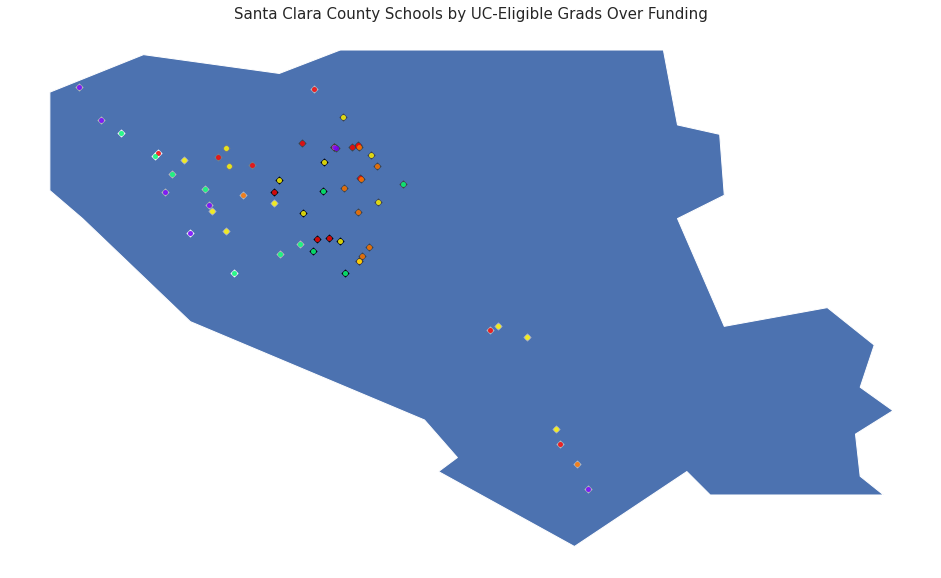

In [ ]:
#Map everything
#red-purple is lowest-highest performing schools
#white-black is lowest-highest funded schools
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geocash20df.plot(ax=basemap, color='#FCFCFC', marker="D", markersize=25,alpha=0.8)
geocash40df.plot(ax=basemap, color='#BDBDBD', marker="D", markersize=25,alpha=0.8)
geocash60df.plot(ax=basemap, color='#7E7E7E', marker="D", markersize=25,alpha=0.8)
geocash80df.plot(ax=basemap, color='#3F3F3F', marker="D", markersize=25,alpha=0.8)
geocash100df.plot(ax=basemap, color='#000000', marker="D", markersize=25,alpha=0.8)
geouc20df.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geouc40df.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geouc60df.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geouc80df.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geouc100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Santa Clara County Schools by UC-Eligible Grads Over Funding", fontsize=15, fontweight=3)

(-122.24189, -121.15751, 36.872675, 37.511224999999996)

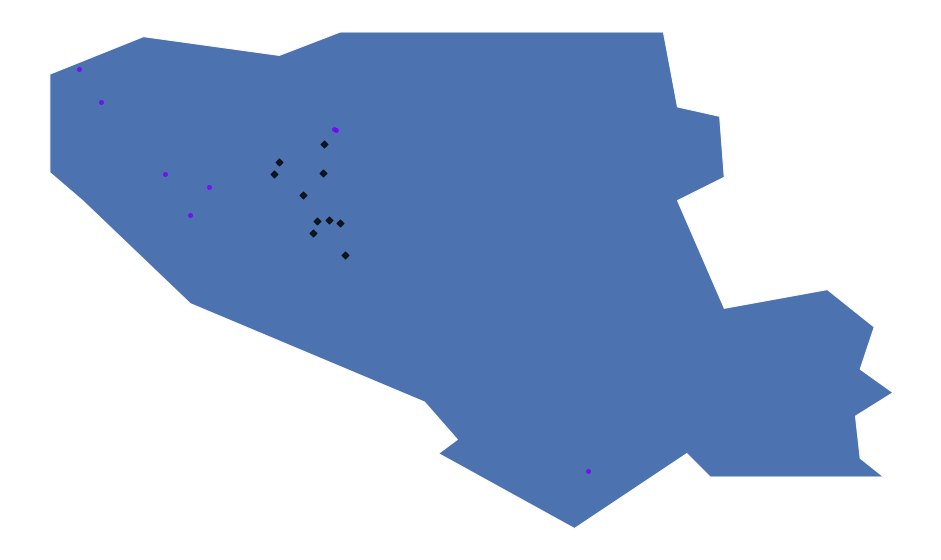

In [ ]:
#Map of only the highest performing/funded schools
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)

geocash100df.plot(ax=basemap, color='#000000', marker="D", markersize=25,alpha=0.8)
geouc100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')

In [ ]:
ultrageo = lageo[lageo['UC-EligiblePercent'].notna()]
ultrageo = lageo[lageo['CashPercent'].notna()]
ultrageo

,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
14964,43694014330239,Leigh High,POINT (-121.9225769042969 37.24330902099609),61-80%,70.572207,21-40%,24.686360
14967,43694014330759,Boynton High,POINT (-121.9660110473633 37.31229782104492),21-40%,21.935484,21-40%,24.686360
14968,43694014330866,Branham High,POINT (-121.8995666503906 37.25457763671875),61-80%,60.194175,21-40%,24.686360
14971,43694014331955,Del Mar High,POINT (-121.9302978515625 37.30326080322266),41-60%,48.290598,21-40%,24.686360
14973,43694014336137,Prospect High,POINT (-122.0023803710938 37.29286956787109),41-60%,56.115108,21-40%,24.686360
...,...,...,...,...,...,...,...
15425,43696744330122,Santa Clara High,POINT (-121.9830627441406 37.34650039672852),41-60%,41.787440,41-60%,49.564800
15428,43696744330247,Wilson Alternative,POINT (-121.9552688598633 37.3470344543457),0-20%,0.000000,41-60%,49.564800
15433,43696744338406,New Valley Continuation High,POINT (-121.9957275390625 37.35689163208008),0-20%,0.000000,41-60%,49.564800
15434,43696744338802,Adrian Wilcox High,POINT (-121.9857788085938 37.36687469482422),41-60%,52.941176,41-60%,49.564800


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


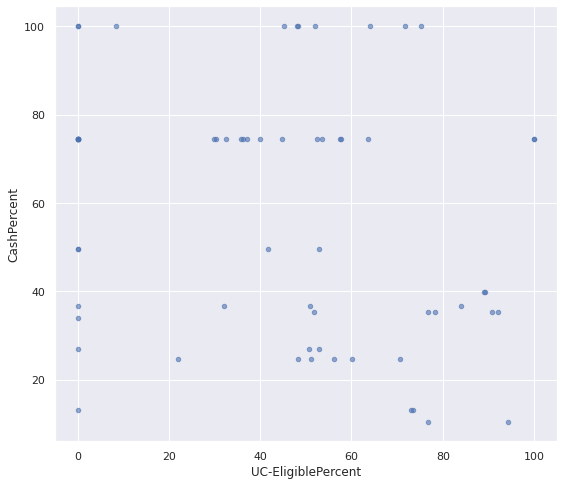

In [ ]:
ultrageo.plot.scatter(x='UC-EligiblePercent', y='CashPercent',  figsize=(9,8), alpha=0.6)

Part II of Money Data Analysis Removing Outliers

In [ ]:
#Remove outliers
SCmoneydf2=SCmoneydf.loc[SCmoneydf['Current Expense ADA'] != temp[-1]]
SCmoneydf2=SCmoneydf2.loc[SCmoneydf2['Current Expense ADA'] != temp[-2]]

In [ ]:
#Find new minimum and maximum
minmoney2=min(SCmoneydf2['Current Expense ADA'])
maxmoney2=max(SCmoneydf2['Current Expense ADA'])

In [ ]:
#Set min value to 0 and max value to 100
minmaxmoney2=[]
for value in SCmoneydf2['Current Expense ADA']:
  mmm2=(value-minmoney2)/(maxmoney2-minmoney2)
  minmaxmoney2.append(mmm2*100)
print(minmaxmoney2)

[55.226702643611915, 38.61081433066974, 18.420019826951776, 39.11314848361249, 39.93479453894631, 100.0, 62.56872967145717, 41.91126971204683, 57.140702552238395, 59.23689904712837, 0.0, 2.2255505667084456, 23.667116378482312, 16.910155065257758, 16.993492114080386, 2.323969749862252, 25.014600496829726, 43.65661392873637, 26.7467891291939, 21.23592035972542, 12.153117790918685, 54.57861122165839, 4.33550813306846, 64.52869155879362, 80.18031407168638, 9.842799023954722, 33.93529764371926, 30.418022820260042, 54.98814070860711]


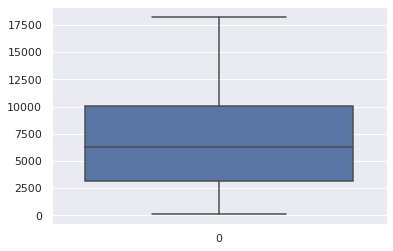

In [ ]:
#New Boxplot of Current Expense ADA in SC
temp2=[]
for i in SCmoneydf2['Current Expense ADA']:
  temp2.append(i)
sns.boxplot(data=temp2)

In [ ]:
print("Mean: "+str(statistics.mean(temp2)))
print("Median: "+str(statistics.median(temp2)))
#print("Mode: "+str(statistics.mode(temp2))) still no mode
print("Min: "+str(min(temp2)))
print("Max: "+str(max(temp2)))

Mean: 6571.881724137931
Median: 6247.54
Min: 82.45
Max: 18249.64


In [ ]:
SCmoneydf2['scaled_CAEDA']=minmaxmoney2

In [ ]:
moneybins2=[]
for i in minmaxmoney2:
  if i<=20:
    moneybins2.append("0-20%")
  elif i<=40:
    moneybins2.append("21-40%")
  elif i<=60:
    moneybins2.append("41-60%")
  elif i<=80:
    moneybins2.append("61-80%")
  else:
    moneybins2.append("81-100%")
print(moneybins2)

['41-60%', '21-40%', '0-20%', '21-40%', '21-40%', '81-100%', '61-80%', '41-60%', '41-60%', '41-60%', '0-20%', '0-20%', '21-40%', '0-20%', '0-20%', '0-20%', '21-40%', '41-60%', '21-40%', '21-40%', '0-20%', '41-60%', '0-20%', '61-80%', '81-100%', '0-20%', '21-40%', '21-40%', '41-60%']


In [ ]:
SCmoneydf2['scaled_bins_CAEDA'] = moneybins2

In [ ]:
SCmoneydf2.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,scaled_CAEDA,scaled_bins_CAEDA
662,43,69369,Alum Rock Union Elementary,1.347013e+08,10115.59,13316.204237,Elementary,55.226703,41-60%
663,43,69377,Berryessa Union Elementary,6.971195e+07,7096.95,9822.804214,Elementary,38.610814,21-40%
664,43,69385,Cambrian,3.472331e+07,3428.85,10126.809919,Elementary,18.420020,0-20%
665,43,69393,Campbell Union,8.327326e+07,7188.21,11584.700537,Elementary,39.113148,21-40%
666,43,69401,Campbell Union High,9.288198e+07,7337.48,12658.566143,High,39.934795,21-40%


In [ ]:
#Form a list that lines up the money rate with the correct CDS Code in the dataframe
cashbin2=[]
cashnobin2=[]
for k in lageo['CDSCode']:
  g=int(str(k)[2:7])
  t=0
  for h in SCmoneydf2['CDS']:
    if g==h:
      i=SCmoneydf2[SCmoneydf2['CDS']==h].index.item()
      cashbin2.append(SCmoneydf2['scaled_bins_CAEDA'][i])
      cashnobin2.append(SCmoneydf2['scaled_CAEDA'][i])
      t=1
  if t==0:
    cashbin2.append(None)
    cashnobin2.append(None)
print(cashbin2)
print(cashnobin2)

[None, None, None, None, None, None, '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '0-20%', '0-20%', '41-60%', '41-60%', '41-60%', '21-40%', '21-40%', '21-40%', '61-80%', '61-80%', None, None, None, None, None, None, None, None, None, None, '81-100%', '81-100%', '81-100%', '81-100%', '41-60%']
[None, None, None, None, None, None, 39.93479453894631, 39.93479453894631, 39.93479453894631, 39.93479453894631, 39.93479453894631, 39.93479453894631, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 57.140702552238395, 57.140702552238395, 57.140702552238395, 57.140702552238395, 57.140702552238395, 59.23689904712837, 59.23689904712837, 59.23689904712837, 59.23689904712837, 16.9934921

In [ ]:
lageo2=lageo.drop(columns=['CashBin','CashPercent'])
lageo2.head(2)

,CDSCode,School,coordinates,binner,UC-EligiblePercent
14778,43104390113431,University Preparatory Academy Charter,POINT (-121.8739166259766 37.29225540161133),81-100%,100.0
14787,43104390123257,Downtown College Prep - Alum Rock,POINT (-121.85791015625 37.36674880981445),61-80%,75.0


In [ ]:
#Add money rates as new columns in map dataframe
lageo2['CashBin']=cashbin2
lageo2['CashPercent']=cashnobin2
lageo2

,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
14778,43104390113431,University Preparatory Academy Charter,POINT (-121.8739166259766 37.29225540161133),81-100%,100.000000,None,NaN
14787,43104390123257,Downtown College Prep - Alum Rock,POINT (-121.85791015625 37.36674880981445),61-80%,75.000000,None,NaN
14789,43104390123794,Summit Public School: Tahoma,POINT (-121.8195724487305 37.2527961730957),81-100%,96.153846,None,NaN
14805,43104390135087,Opportunity Youth Academy,POINT (-121.9002304077148 37.38390731811523),0-20%,0.000000,None,NaN
14814,43104394330254,Santa Clara County Court,POINT (-121.9013366699219 37.38370132446289),0-20%,0.000000,None,NaN
...,...,...,...,...,...,...,...
15425,43696744330122,Santa Clara High,POINT (-121.9830627441406 37.34650039672852),41-60%,41.787440,81-100%,80.180314
15428,43696744330247,Wilson Alternative,POINT (-121.9552688598633 37.3470344543457),0-20%,0.000000,81-100%,80.180314
15433,43696744338406,New Valley Continuation High,POINT (-121.9957275390625 37.35689163208008),0-20%,0.000000,81-100%,80.180314
15434,43696744338802,Adrian Wilcox High,POINT (-121.9857788085938 37.36687469482422),41-60%,52.941176,81-100%,80.180314


In [ ]:
#remove null values
ultrageo2 = lageo2[lageo2['CashBin'].notna()]
ultrageo2

,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
14964,43694014330239,Leigh High,POINT (-121.9225769042969 37.24330902099609),61-80%,70.572207,21-40%,39.934795
14967,43694014330759,Boynton High,POINT (-121.9660110473633 37.31229782104492),21-40%,21.935484,21-40%,39.934795
14968,43694014330866,Branham High,POINT (-121.8995666503906 37.25457763671875),61-80%,60.194175,21-40%,39.934795
14971,43694014331955,Del Mar High,POINT (-121.9302978515625 37.30326080322266),41-60%,48.290598,21-40%,39.934795
14973,43694014336137,Prospect High,POINT (-122.0023803710938 37.29286956787109),41-60%,56.115108,21-40%,39.934795
14974,43694014338505,Westmont High,POINT (-121.9859466552734 37.27012634277344),41-60%,51.242236,21-40%,39.934795
15107,43694684331799,Cupertino High,POINT (-122.0104064941406 37.31966400146484),61-80%,78.383459,41-60%,57.140703
15109,43694684332474,Fremont High,POINT (-122.0350036621094 37.35261535644531),41-60%,51.843318,41-60%,57.140703
15110,43694684333316,Homestead High,POINT (-122.0488662719727 37.33660125732422),61-80%,76.739927,41-60%,57.140703
15111,43694684334421,Lynbrook High,POINT (-122.0064697265625 37.30071258544922),81-100%,90.786517,41-60%,57.140703


In [ ]:
#Set each category to its own dataframe by percentage of uc-eligible grads/funding
tgeouc20=ultrageo2.loc[ultrageo2['binner'] == '0-20%']
tgeouc40=ultrageo2.loc[ultrageo2['binner'] == '21-40%']
tgeouc60=ultrageo2.loc[ultrageo2['binner'] == '41-60%']
tgeouc80=ultrageo2.loc[ultrageo2['binner'] == '61-80%']
tgeouc100=ultrageo2.loc[ultrageo2['binner'] == '81-100%']
tgeocash20=ultrageo2.loc[ultrageo2['CashBin'] == '0-20%']
tgeocash40=ultrageo2.loc[ultrageo2['CashBin'] == '21-40%']
tgeocash60=ultrageo2.loc[ultrageo2['CashBin'] == '41-60%']
tgeocash80=ultrageo2.loc[ultrageo2['CashBin'] == '61-80%']
tgeocash100=ultrageo2.loc[ultrageo2['CashBin'] == '81-100%']

In [ ]:
#Make previous dataframes mapable
geouc20df2 = gpd.GeoDataFrame(tgeouc20, geometry='coordinates')
geouc40df2 = gpd.GeoDataFrame(tgeouc40, geometry='coordinates')
geouc60df2 = gpd.GeoDataFrame(tgeouc60, geometry='coordinates')
geouc80df2 = gpd.GeoDataFrame(tgeouc80, geometry='coordinates')
geouc100df2 = gpd.GeoDataFrame(tgeouc100, geometry='coordinates')
geocash20df2 = gpd.GeoDataFrame(tgeocash20, geometry='coordinates')
geocash40df2 = gpd.GeoDataFrame(tgeocash40, geometry='coordinates')
geocash60df2 = gpd.GeoDataFrame(tgeocash60, geometry='coordinates')
geocash80df2 = gpd.GeoDataFrame(tgeocash80, geometry='coordinates')
geocash100df2 = gpd.GeoDataFrame(tgeocash100, geometry='coordinates')

Text(0.5, 1.0, 'Santa Clara County Schools by UC-Eligible Grads Over Funding')

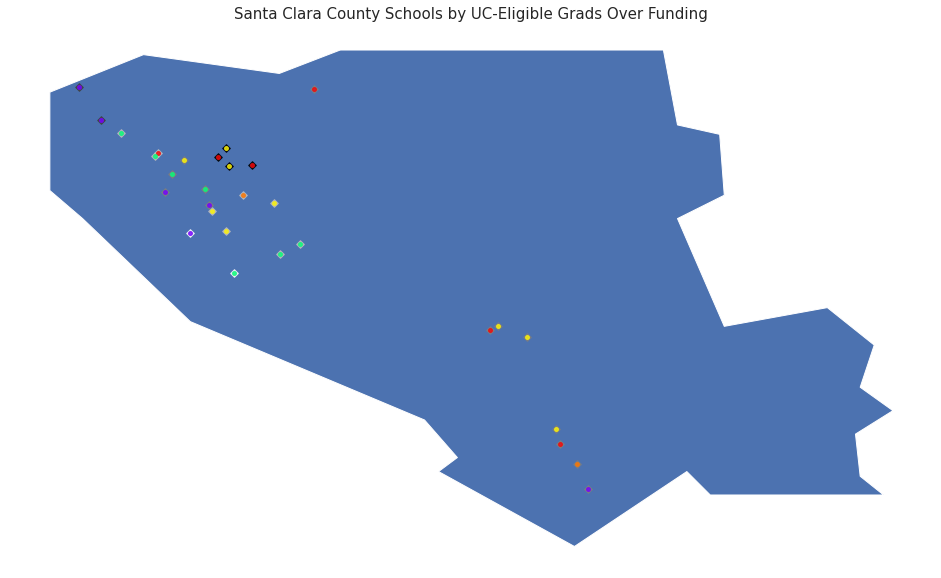

In [ ]:
#Map everything
#red-purple is lowest-highest performing schools
#white-black is lowest-highest funded schools
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geocash20df2.plot(ax=basemap, color='#FCFCFC', marker="D", markersize=30,alpha=0.8)
geocash40df2.plot(ax=basemap, color='#BDBDBD', marker="D", markersize=30,alpha=0.8)
geocash60df2.plot(ax=basemap, color='#7E7E7E', marker="D", markersize=30,alpha=0.8)
geocash80df2.plot(ax=basemap, color='#3F3F3F', marker="D", markersize=30,alpha=0.8)
geocash100df2.plot(ax=basemap, color='#000000', marker="D", markersize=30,alpha=0.8)
geouc20df2.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geouc40df2.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geouc60df2.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geouc80df2.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geouc100df2.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Santa Clara County Schools by UC-Eligible Grads Over Funding", fontsize=15, fontweight=3)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


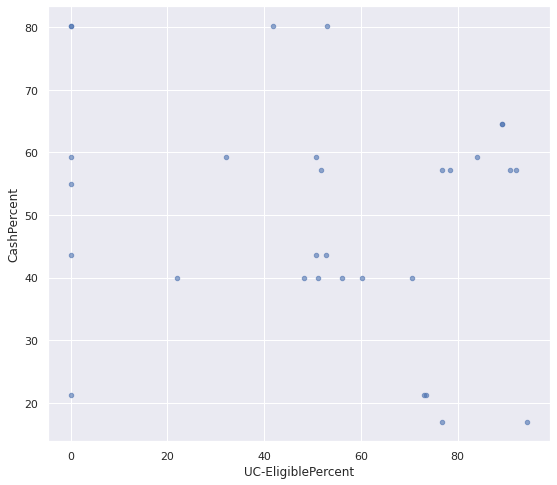

In [ ]:
ultrageo2.plot.scatter(x='UC-EligiblePercent', y='CashPercent',  figsize=(9,8), alpha=0.6)